<h1 style = color:brown> Credit EDA Case Study

<h3 style = color:blue>Submission Harish Dave & Ganesh Nagappa Shetty

### TABLE OF CONTENTS
<br>**1. Importing Libraries**
<br>**2. Importing Data**
<br>**3. Data Handling - Application Data**
    <br> 3.1 Handling of Missing Data
    <br> 3.2 Handling DataTypes
    <br> 3.3 Handling of Outliers
<br> **4. Data Handling - Previous Applications Data**
<br> 4.1 Handling of Missing Data
<br> 4.2 Handling DataTypes
<br> 4.3 Handling of Outliers
<br>**5. Data Leakage Analysis**
<br>**6. Selection of Columns for Data Analysis**
<br>**7. Data Analysis for Credit EDA Case Study**
<br>**8. Data Analysis for Applications Dataframe**
<br> 8.1 Data Imbalance Study
<br> 8.2 Split Dataframe based on Target Variable
<br> 8.3 Univariate Analysis - Categorical Unordered Columns
<br> 8.4 Univariate Analysis - Categorical Ordered Columns
<br> 8.5 Univariate Analysis - Numerical Data
<br> 8.6 Bivariate & Multivariate Analysis
<br>**9. Data Analysis for Previous Dataframe**
<br> 9.1 Data Imbalance Study
<br> 9.2 Univariate Analysis
<br> 9.3 Bivariate & Multivariate Analysis
<br>**10. Merging of Application Data with Previous Application Data**
<br> 10.1 Data Imbalance Study
<br> 10.2 Univariate Analysis
<br> 10.3 Multivariate Analysis
<br>**11. Insights from the EDA for Credit Case Study**

# 1. Importing Libraries

In [1]:
# Import Required Libraries

import warnings
warnings.filterwarnings('ignore')

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, scipy.stats as ss, plotly.express as px

%matplotlib inline

# 2. Importing Data

In [2]:
# Read CSV files and store them in dataframes

file1 ='application_data.csv'
file2 = 'previous_application.csv'
# app = dataframe with all the info of the client (whether a client has payment difficulties etc)
app = pd.read_csv(file1,header=0)
# prev = dataframe with info about the client’s previous loan data (whether loan was Approved, Cancelled, Refused or Unused)
prev = pd.read_csv(file2,header=0)

# 3. Data Handling - Application Data

#### Check Head of the applData DataFrame

In [3]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

#### Summary Information of applData

In [4]:
app.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [5]:
# Shape of the DataFrame
app.shape

(307511, 122)

#### Percentage of missing values in Application Data

In [6]:
missappData=pd.DataFrame(app.isnull().sum()/app.shape[0])
missappData.rename(columns={0 :'% Missing Values'}, inplace=True)
missappData.sort_values(by='% Missing Values',ascending=False, inplace=True)
missappData=missappData[missappData['% Missing Values']>0]

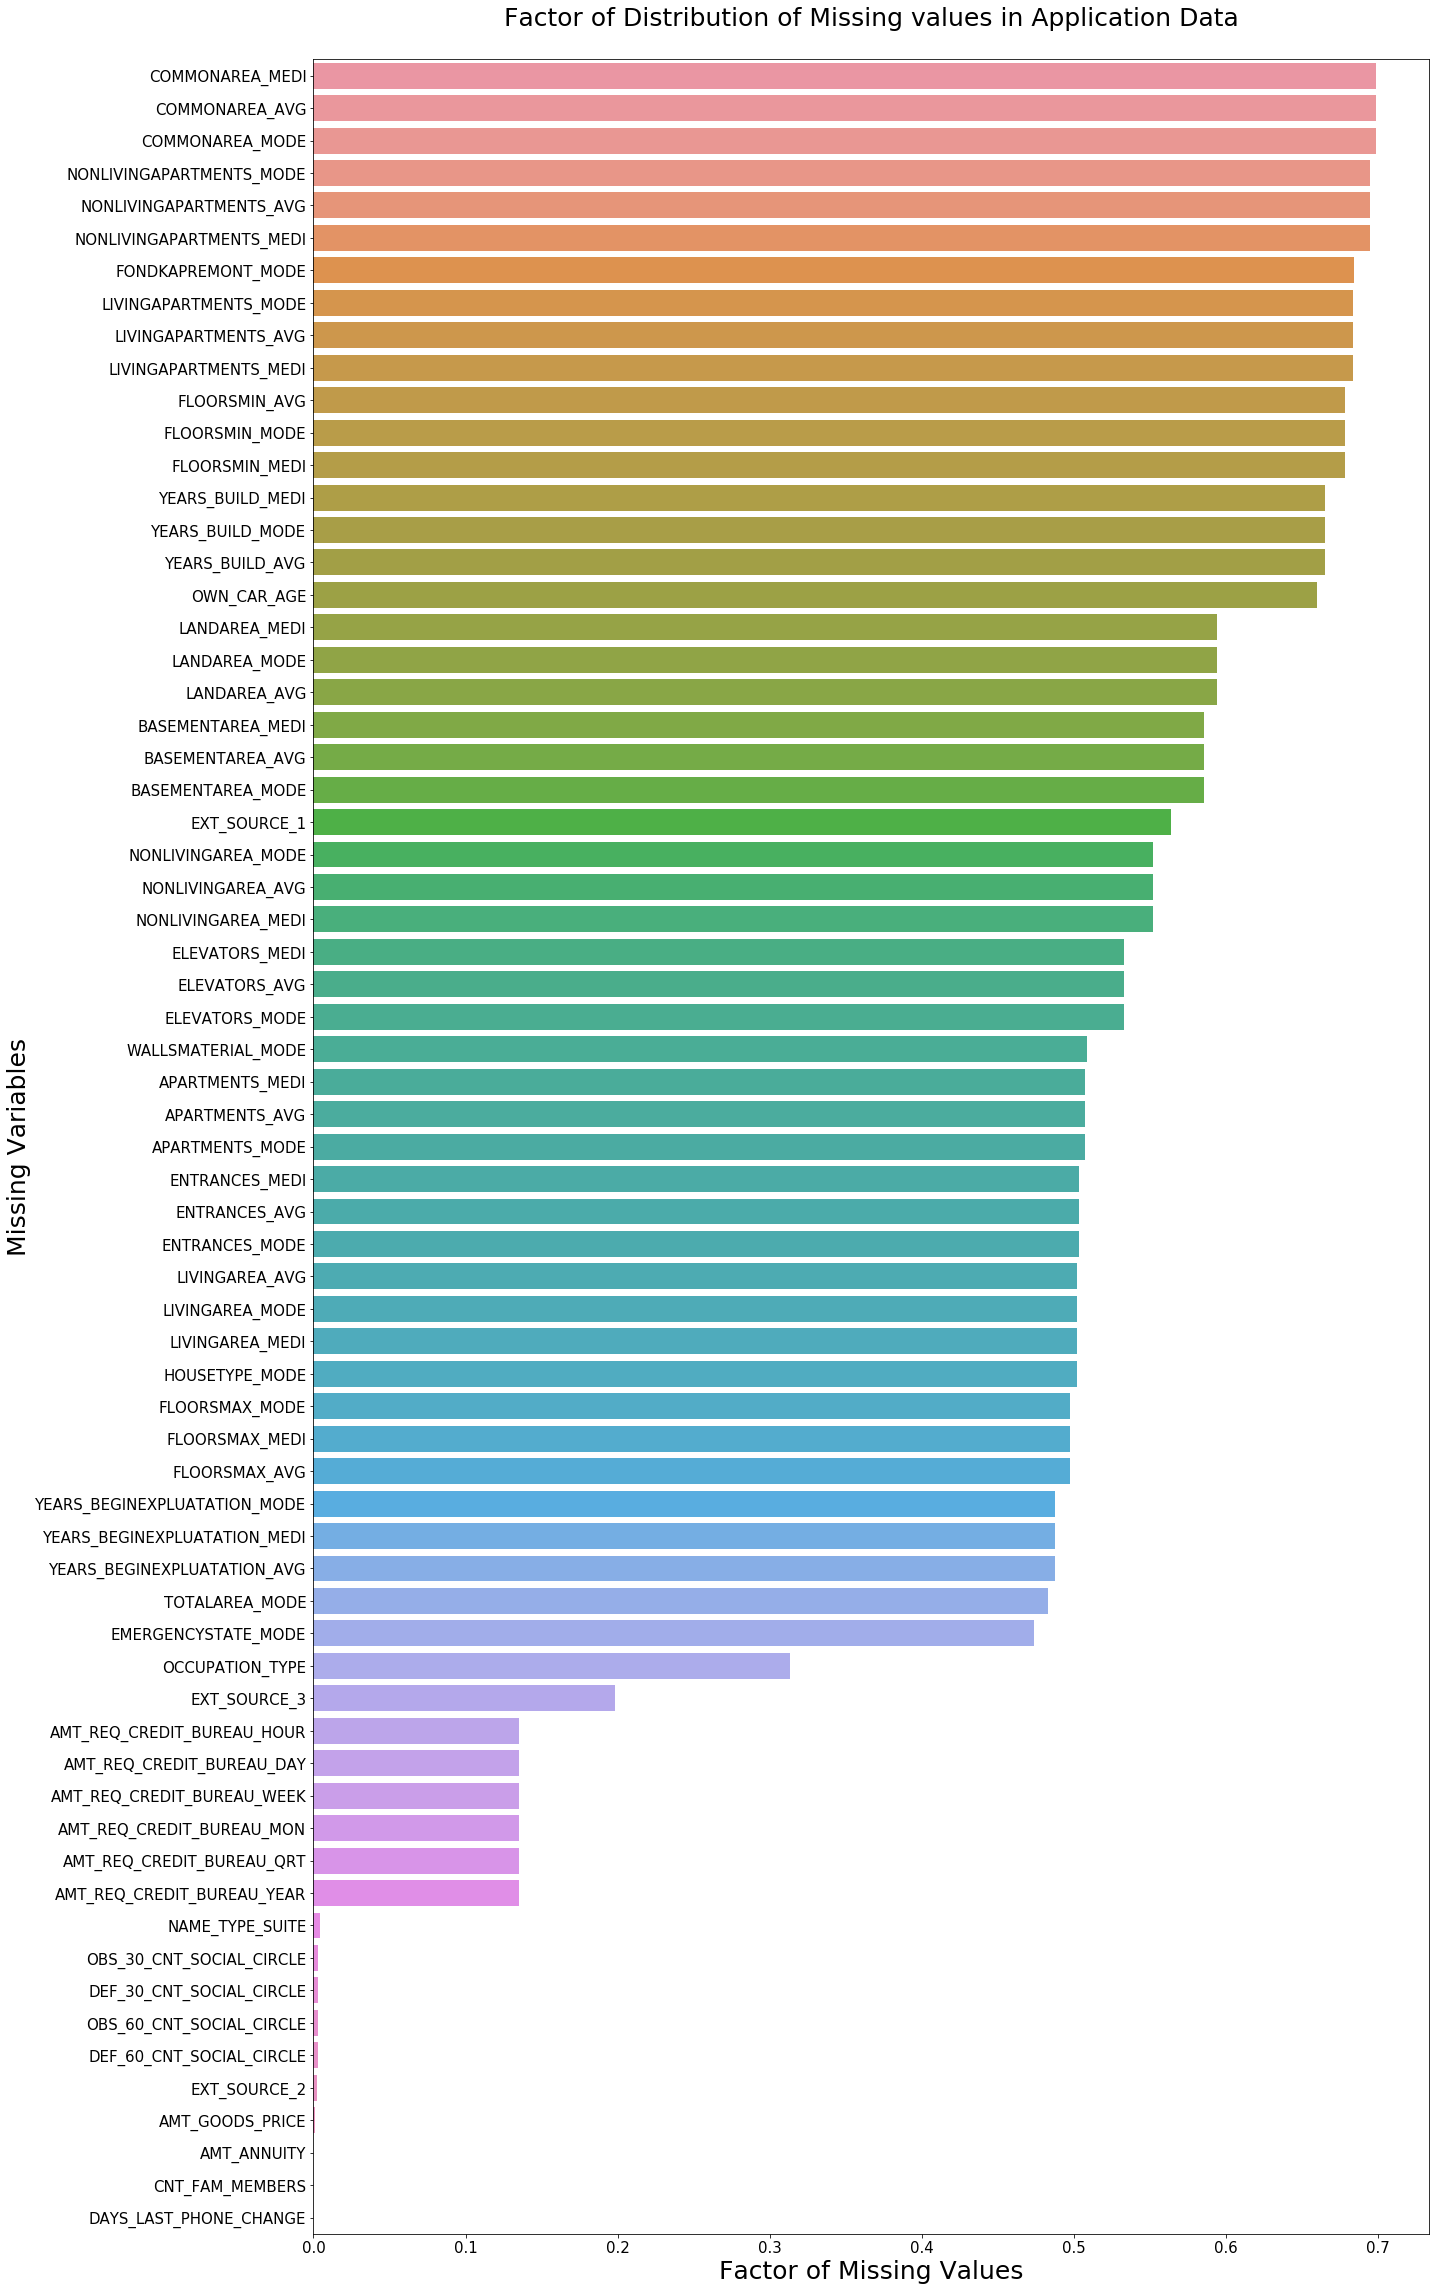

In [7]:
plt.figure(figsize=[20,40])
sns.barplot(x='% Missing Values',y=missappData.index,data=missappData)
plt.title('Factor of Distribution of Missing values in Application Data\n',fontdict={'fontsize': 25,'fontweight' : 20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Factor of Missing Values', fontdict = {'fontsize': 25, 'fontweight': 15})
plt.ylabel('Missing Variables', fontdict = {'fontsize': 25, 'fontweight': 15})
plt.show()

In [8]:
# Columns where more than 50% of Data are missing
missingcols=list(missappData[missappData['% Missing Values']>0.5].index)
missingcols

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE']

In [9]:
len(missingcols)

41

***OBSERVATION: 41 columns have more than 50% of missing data.It doesn't make sense retaining them as they may convey biased information*** 

### 3.1 Handling of Missing Data

In [10]:
# Lets extract data from app Data Frame excluding these columns.
app_new=app.drop(missingcols, axis = 1)

In [11]:
# Shape of app_new Data Frame
app_new.shape

(307511, 81)

In [12]:
# Summary of app_new dataFrame
app_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [13]:
# Checking the % of Missing Values in the app_new DataFrame
missingData=pd.DataFrame(app_new.isnull().sum()/app.shape[0]*100)
missingData.rename(columns={0 :'% Missing Values'}, inplace=True)
missingData.sort_values(by='% Missing Values',ascending=False, inplace=True)
missingData=missingData[missingData['% Missing Values']>0]

In [14]:
missingData

% Missing Values
FLOORSMAX_AVG                        49.760822
FLOORSMAX_MODE                       49.760822
FLOORSMAX_MEDI                       49.760822
YEARS_BEGINEXPLUATATION_AVG          48.781019
YEARS_BEGINEXPLUATATION_MODE         48.781019
YEARS_BEGINEXPLUATATION_MEDI         48.781019
TOTALAREA_MODE                       48.268517
EMERGENCYSTATE_MODE                  47.398304
OCCUPATION_TYPE                      31.345545
EXT_SOURCE_3                         19.825307
AMT_REQ_CREDIT_BUREAU_YEAR           13.501631
AMT_REQ_CREDIT_BUREAU_HOUR           13.501631
AMT_REQ_CREDIT_BUREAU_DAY            13.501631
AMT_REQ_CREDIT_BUREAU_WEEK           13.501631
AMT_REQ_CREDIT_BUREAU_MON            13.501631
AMT_REQ_CREDIT_BUREAU_QRT            13.501631
NAME_TYPE_SUITE                       0.420148
DEF_30_CNT_SOCIAL_CIRCLE              0.332021
OBS_60_CNT_SOCIAL_CIRCLE              0.332021
DEF_60_CNT_SOCIAL_CIRCLE              0.332021
OBS_30_CNT_SOCIAL_CIRCLE              0.332021
EXT_SOURCE_2                          0.214626
AMT_GOODS_PRICE                       0.090403
AMT_ANNUITY                           0.003902
CNT_FAM_MEMBERS                       0.000650
DAYS_LAST_PHONE_CHANGE                0.000325

Lets Handle the Missing Data One at a time

#### Handling of Missing Values in FLOORSMAX_AVG, FLOORSMAX_MODE , FLOORSMAX_MEDI, YEARS_BEGINEXPLUATATION_AVG, YEARS_BEGINEXPLUATATION_MODE & YEARS_BEGINEXPLUATATION_MEDI

In [15]:
# Lets check the Statistical summary of these columns
app_new[['FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMAX_MEDI','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI']].describe()

FLOORSMAX_AVG  FLOORSMAX_MODE  FLOORSMAX_MEDI  \
count  154491.000000   154491.000000   154491.000000   
mean        0.226282        0.222315        0.225897   
std         0.144641        0.143709        0.145067   
min         0.000000        0.000000        0.000000   
25%         0.166700        0.166700        0.166700   
50%         0.166700        0.166700        0.166700   
75%         0.333300        0.333300        0.333300   
max         1.000000        1.000000        1.000000   

       YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE  \
count                157504.000000                 157504.000000   
mean                      0.977735                      0.977065   
std                       0.059223                      0.064575   
min                       0.000000                      0.000000   
25%                       0.976700                      0.976700   
50%                       0.981600                      0.981600   
75%                       0.986600                      0.986600   
max                       1.000000                      1.000000   

       YEARS_BEGINEXPLUATATION_MEDI  
count                 157504.000000  
mean                       0.977752  
std                        0.059897  
min                        0.000000  
25%                        0.976700  
50%                        0.981600  
75%                        0.986600  
max                        1.000000

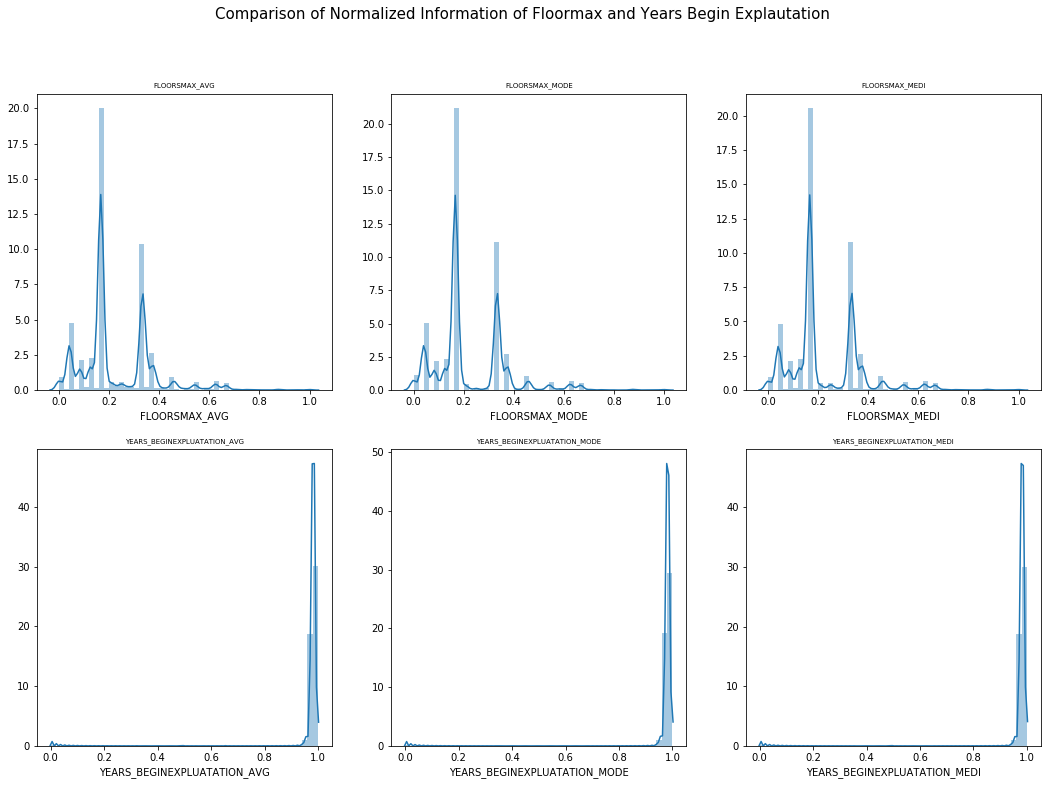

In [16]:
fig = plt.figure(figsize = (18,12))
fig.suptitle('Comparison of Normalized Information of Floormax and Years Begin Explautation', fontsize=15)
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

plt.subplot(ax1)
sns.distplot(app_new['FLOORSMAX_AVG'])
plt.title('FLOORSMAX_AVG', fontsize=7)

plt.subplot(ax2)
sns.distplot(app_new['FLOORSMAX_MODE'])
plt.title('FLOORSMAX_MODE', fontsize=7)

plt.subplot(ax3)
sns.distplot(app_new['FLOORSMAX_MEDI'])
plt.title('FLOORSMAX_MEDI', fontsize=7)

plt.subplot(ax4)
sns.distplot(app_new['YEARS_BEGINEXPLUATATION_AVG'])
plt.title('YEARS_BEGINEXPLUATATION_AVG', fontsize=7)

plt.subplot(ax5)
sns.distplot(app_new['YEARS_BEGINEXPLUATATION_MODE'])
plt.title('YEARS_BEGINEXPLUATATION_MODE', fontsize=7)

plt.subplot(ax6)
sns.distplot(app_new['YEARS_BEGINEXPLUATATION_MEDI'])
plt.title('YEARS_BEGINEXPLUATATION_MEDI', fontsize=7)
plt.show()

By looking at above distribution we can observe that all three variables have fairly similar distribution. Therefore we will consider only one of the 3 variables for both Floor Max as well as Years begin Expluatation which is 'FLOORSMAX_AVG' & 'YEARS_BEGINEXPLUATATION_AVG'and drop other 2 variables from our analysis. Though mean and median are not very close, we shall impute the missing values with mean of this normalized data.

In [17]:
# Dropping of non required columns
app_new.drop(['FLOORSMAX_MODE', 'FLOORSMAX_MEDI','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI'], axis = 1,inplace=True)

In [18]:
# Imputation of missing values with mean for required columns
app_new['FLOORSMAX_AVG'].fillna(app_new['FLOORSMAX_AVG'].mean(), inplace = True)
app_new['YEARS_BEGINEXPLUATATION_AVG'].fillna(app_new['YEARS_BEGINEXPLUATATION_AVG'].mean(), inplace = True)

#### Handling of Missing Values in TOTALAREA_MODE

In [19]:
# Lets check the Statistical Data
app_new['TOTALAREA_MODE'].describe()

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

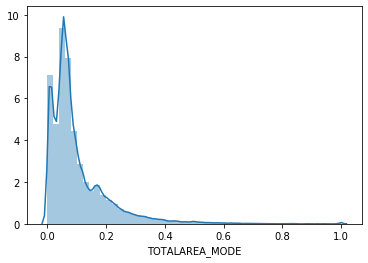

In [20]:
sns.distplot(app_new['TOTALAREA_MODE'])
plt.show()

Lets Impute the missing values with median of the distribution

In [21]:
app_new['TOTALAREA_MODE'].fillna(app_new['TOTALAREA_MODE'].mean(), inplace = True)

#### Handling of Missing Values in EMERGENCYSTATE_MODE

In [22]:
# Lets check the unique Values in EMERGENCYSTATE_MODE column
round(app_new['EMERGENCYSTATE_MODE'].value_counts(normalize = True)*100,2)

No     98.56
Yes     1.44
Name: EMERGENCYSTATE_MODE, dtype: float64

Its straightforward decision to impute the missing values with mode of the variable which is 'No'

In [23]:
app_new['EMERGENCYSTATE_MODE'].fillna('No', inplace = True)

In [24]:
app_new['EMERGENCYSTATE_MODE'].unique()

array(['No', 'Yes'], dtype=object)

#### Handling of Missing Values in OCCUPATION_TYPE Column

Column OCCUPATION_TYPE has more than 31% missing values and this should be investigated further

In [25]:
# Lets check the unique Values in OCCUPATION_TYPE column
round(app_new['OCCUPATION_TYPE'].value_counts(normalize = True)*100,2)

Laborers                 26.14
Sales staff              15.21
Core staff               13.06
Managers                 10.12
Drivers                   8.81
High skill tech staff     5.39
Accountants               4.65
Medicine staff            4.04
Security staff            3.18
Cooking staff             2.82
Cleaning staff            2.20
Private service staff     1.26
Low-skill Laborers        0.99
Waiters/barmen staff      0.64
Secretaries               0.62
Realty agents             0.36
HR staff                  0.27
IT staff                  0.25
Name: OCCUPATION_TYPE, dtype: float64

Though Laborers is the highest (26%) occupation among several we can not safely impute this onto the missing 31% of Values. Therefore we can for now treat it as Unavailable information

In [26]:
# Replacing the missing values in OCCUPATION_TYPE column with 'Unavailable'

app_new['OCCUPATION_TYPE'].fillna('Unavailable', inplace = True)

#### Handling of missing data in EXT_SOURCE_2 & EXT_SOURCE_3

In [27]:
# Lets check the Statistical summary of these columns
app_new[['EXT_SOURCE_2','EXT_SOURCE_3']].describe()

EXT_SOURCE_2   EXT_SOURCE_3
count  3.068510e+05  246546.000000
mean   5.143927e-01       0.510853
std    1.910602e-01       0.194844
min    8.173617e-08       0.000527
25%    3.924574e-01       0.370650
50%    5.659614e-01       0.535276
75%    6.636171e-01       0.669057
max    8.549997e-01       0.896010

In [28]:
# Lets Check the mode of these columns
print('Mode of EXT_SOURCE_2:',app_new['EXT_SOURCE_2'].mode()[0])
print('Mode of EXT_SOURCE_3:',app_new['EXT_SOURCE_3'].mode()[0])

Mode of EXT_SOURCE_2: 0.2858978721410488
Mode of EXT_SOURCE_3: 0.746300213050371


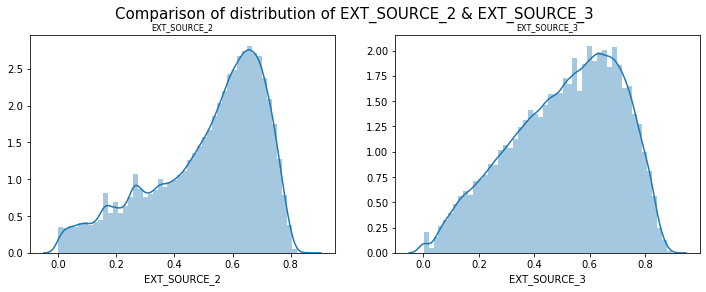

In [29]:
# Lets Check the distribution of these Variables
fig = plt.figure(figsize = (12,4))
fig.suptitle('Comparison of distribution of EXT_SOURCE_2 & EXT_SOURCE_3', fontsize=15)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plt.subplot(ax1)
sns.distplot(app_new['EXT_SOURCE_2'])
plt.title('EXT_SOURCE_2', fontsize=8)

plt.subplot(ax2)
sns.distplot(app_new['EXT_SOURCE_3'])
plt.title('EXT_SOURCE_3', fontsize=8)

plt.show()

We can conclude that these distributions are Skewed Normal distribution which should be converted to log10 scale and then we can impute missing values in these columns with mean of the distribution

In [30]:
# Conversion to log10 scale
import math
app_new['EXT_SOURCE_2']=app_new['EXT_SOURCE_2'].apply(lambda x: math.log10(x))
app_new['EXT_SOURCE_3']=app_new['EXT_SOURCE_3'].apply(lambda x: math.log10(x))

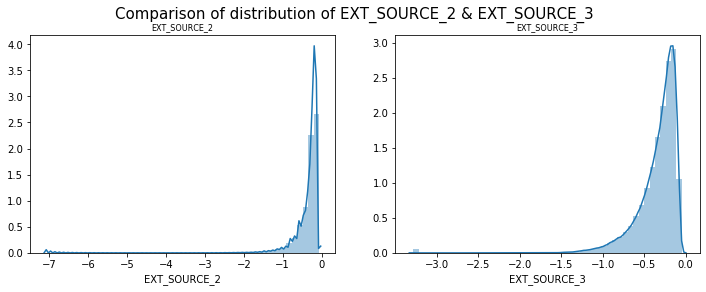

In [31]:
# Lets Check the distribution of these Variables
fig = plt.figure(figsize = (12,4))
fig.suptitle('Comparison of distribution of EXT_SOURCE_2 & EXT_SOURCE_3', fontsize=15)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plt.subplot(ax1)
sns.distplot(app_new['EXT_SOURCE_2'])
plt.title('EXT_SOURCE_2', fontsize=8)

plt.subplot(ax2)
sns.distplot(app_new['EXT_SOURCE_3'])
plt.title('EXT_SOURCE_3', fontsize=8)

plt.show()

In [32]:
# Now lets impute mean for the missing values
app_new['EXT_SOURCE_2'].fillna(app_new['EXT_SOURCE_2'].mean(), inplace = True)
app_new['EXT_SOURCE_3'].fillna(app_new['EXT_SOURCE_3'].mean(), inplace = True)

Now we have to deal with missing values in columns pertaining to Number of enquiries to Credit Bureau about the clients.
We can observe here that except for the column 'AMT_REQ_CREDIT_BUREAU_YEAR' nearly 75% of the data has zero enquiries (which is also equal to  Median of the distribution). These columns also have sizeable outliers present in them. Therefore we can impute these missing values with median of the distribution.

In [33]:
# Enquiries Columns
enquiriesCol=['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']

In [34]:
app_new[enquiriesCol].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

In [35]:
# Imputation of enquiries column with median of the distribution
app_new['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_new['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace = True)
app_new['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_new['AMT_REQ_CREDIT_BUREAU_QRT'].median(), inplace = True)
app_new['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_new['AMT_REQ_CREDIT_BUREAU_MON'].median(), inplace = True)
app_new['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_new['AMT_REQ_CREDIT_BUREAU_WEEK'].median(), inplace = True)
app_new['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_new['AMT_REQ_CREDIT_BUREAU_DAY'].median(), inplace = True)
app_new['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_new['AMT_REQ_CREDIT_BUREAU_HOUR'].median(), inplace = True)

In [36]:
# Checking the missing values again
missingData=pd.DataFrame(app_new.isnull().sum()/app.shape[0]*100)
missingData.rename(columns={0 :'% Missing Values'}, inplace=True)
missingData.sort_values(by='% Missing Values',ascending=False, inplace=True)
missingData=missingData[missingData['% Missing Values']>0]
missingData

% Missing Values
NAME_TYPE_SUITE                   0.420148
OBS_30_CNT_SOCIAL_CIRCLE          0.332021
DEF_30_CNT_SOCIAL_CIRCLE          0.332021
OBS_60_CNT_SOCIAL_CIRCLE          0.332021
DEF_60_CNT_SOCIAL_CIRCLE          0.332021
AMT_GOODS_PRICE                   0.090403
AMT_ANNUITY                       0.003902
CNT_FAM_MEMBERS                   0.000650
DAYS_LAST_PHONE_CHANGE            0.000325

For the remaining columns less than 0.5% of the data is missing. We can impute these values with either mode / median / mean as seemed appropriate. Lets check one by one.

In [37]:
# NAME_TYPE_SUITE 
app_new['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

As we can see above that 81% of the borrowers werent accompanied by anyone. Therefore we can impute 'NAME_TYPE_SUITE' column with mode of the distribution - Unaccompanied

In [38]:
app_new['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace = True)

Columns related to observations of clients surroundings have around 0.33% of data missing and we can observe that these columns have outliers as well. We can impute these colums with median of the distribution

In [39]:
# Observation Columns
obsrCols=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

In [40]:
app_new[obsrCols].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   1.405292                  0.100049  
std                    2.379803                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

In [41]:
# Imputation of Observations column with median of the distribution
app_new['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(app_new['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace = True)
app_new['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(app_new['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace = True)
app_new['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(app_new['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace = True)
app_new['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(app_new['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace = True)

In [42]:
# AMT_GOODS_PRICE 
app_new['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [43]:
# AMT_ANNUITY 
app_new['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

As can be seen above, based on the mean,median and variation between 25th and 75th percentile for both 'AMT_GOODS_PRICE' and 'AMT_ANNUITY', its safer to impute the missing values by mean values of 'AMT_GOODS_PRICE' and 'AMT_ANNUITY' respectively

In [44]:
app_new['AMT_GOODS_PRICE'].fillna(app_new['AMT_GOODS_PRICE'].mean(), inplace = True)

In [45]:
app_new['AMT_ANNUITY'].fillna(app_new['AMT_ANNUITY'].mean(), inplace = True)

The remaining two columns CNT_FAM_MEMBERS & DAYS_LAST_PHONE_CHANGE have very few missing values. We can safely drop those rows rather than imputing them

In [46]:
# Dropping rows of missing values in CNT_FAM_MEMBERS & DAYS_LAST_PHONE_CHANGE columns
app_new = app_new[~app_new['CNT_FAM_MEMBERS'].isnull()].copy()
app_new = app_new[~app_new['DAYS_LAST_PHONE_CHANGE'].isnull()].copy()

Column 'CODE_GENDER' has XNA values which means missing data. We can remove these lines of data as they are very less in number

In [47]:
app_new['CODE_GENDER'].value_counts()

F      202447
M      105057
XNA         4
Name: CODE_GENDER, dtype: int64

In [48]:
app_new = app_new[app_new['CODE_GENDER']!='XNA'].copy()

In [49]:
app_new['CODE_GENDER'].value_counts()

F    202447
M    105057
Name: CODE_GENDER, dtype: int64

In [50]:
# Checking the missing values again
missingData=pd.DataFrame(app_new.isnull().sum()/app.shape[0]*100)
missingData.rename(columns={0 :'% Missing Values'}, inplace=True)
missingData.sort_values(by='% Missing Values',ascending=False, inplace=True)
missingData=missingData[missingData['% Missing Values']>0]
missingData

Empty DataFrame
Columns: [% Missing Values]
Index: []

Now our Data Frame doesn't have any missing values

In [51]:
app_new.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         1.0  
4                        0.0                         0.0  

[5 rows x 77 columns]

In [52]:
app_new.shape

(307504, 77)

### 3.2 Handling DataTypes

In [53]:
app_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307504 entries, 0 to 307510
Data columns (total 77 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307504 non-null  int64  
 1   TARGET                       307504 non-null  int64  
 2   NAME_CONTRACT_TYPE           307504 non-null  object 
 3   CODE_GENDER                  307504 non-null  object 
 4   FLAG_OWN_CAR                 307504 non-null  object 
 5   FLAG_OWN_REALTY              307504 non-null  object 
 6   CNT_CHILDREN                 307504 non-null  int64  
 7   AMT_INCOME_TOTAL             307504 non-null  float64
 8   AMT_CREDIT                   307504 non-null  float64
 9   AMT_ANNUITY                  307504 non-null  float64
 10  AMT_GOODS_PRICE              307504 non-null  float64
 11  NAME_TYPE_SUITE              307504 non-null  object 
 12  NAME_INCOME_TYPE             307504 non-null  object 
 13 

In [54]:
#Lets look at the Days columns more closely
app_new[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637            -3648.0            -2120   
1      -16765          -1188            -1186.0             -291   
2      -19046           -225            -4260.0            -2531   
3      -19005          -3039            -9833.0            -2437   
4      -19932          -3038            -4311.0            -3458   

   DAYS_LAST_PHONE_CHANGE  
0                 -1134.0  
1                  -828.0  
2                  -815.0  
3                  -617.0  
4                 -1106.0

1. We can observe that Days column has negative values which need to be converted as positive values
2. DAYS_REGISTRATION and DAYS_LAST_PHONE_CHANGE columns have float data type which need to be converted as integer

In [55]:
# Conversion of Negative days to positive days
for i in ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']:
    app_new[i]=abs(app_new[i])

In [56]:
# Conversion of Data Types of DAYS_REGISTRATION and DAYS_LAST_PHONE_CHANGE columns
app_new[['DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE']]=app_new[['DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE']].astype(int)

### 3.3 Handling of Outliers

In [57]:
app_new.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307504.000000  307504.000000  307504.000000      3.075040e+05   
mean   278182.341648       0.080731       0.417051      1.687968e+05   
std    102789.940528       0.272421       0.722121      2.371252e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189148.500000       0.000000       0.000000      1.125000e+05   
50%    278203.500000       0.000000       0.000000      1.471500e+05   
75%    367144.250000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075040e+05  307504.000000     3.075040e+05   
mean   5.990294e+05   27108.642116     5.383987e+05   
std    4.024941e+05   14493.580651     3.692816e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307504.000000  307504.000000  307504.000000  ...   
mean                     0.020868   16037.073765   67726.225139  ...   
std                      0.013831    4363.974220  139444.991702  ...   
min                      0.000290    7489.000000       0.000000  ...   
25%                      0.010006   12413.000000     933.000000  ...   
50%                      0.018850   15750.000000    2219.000000  ...   
75%                      0.028663   19682.000000    5707.000000  ...   
max                      0.072508   25229.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307504.000000     307504.000000     307504.000000     307504.000000   
mean           0.008127          0.000595          0.000507          0.000335   
std            0.089781          0.024388          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               307504.000000              307504.000000   
mean                     0.005538                   0.006055   
std                      0.078015                   0.103038   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               307504.000000              307504.000000   
mean                     0.029723                   0.231288   
std                      0.190730                   0.856805   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              307504.000000               307504.000000  
mean                    0.229633                    1.778448  
std                     0.744065                    1.765519  
min                     0.000000                    0.000000  
25%              

We can see that certain columns such as 'AMT_INCOME_TOTAL' , 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE' & 'DAYS_EMPLOYED' have outliers in them. we will individually investigate them

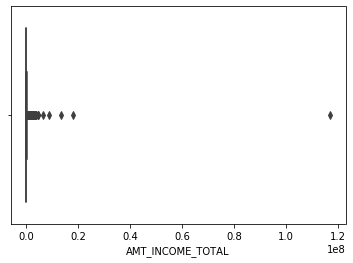

In [58]:
# AMT_INCOME_TOTAL
sns.boxplot(app_new['AMT_INCOME_TOTAL'])
plt.show()

In [59]:
app_new['AMT_INCOME_TOTAL'].describe()

count    3.075040e+05
mean     1.687968e+05
std      2.371252e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [60]:
np.percentile(app_new['AMT_INCOME_TOTAL'],99)

472500.0

From the above analysis we can observe that 99% of values lie within 472500.0. We can handle this by binning the data

In [61]:
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
intervals = ['<50k','50k-100k','100k-150k', '150k-200k','200k-250k','250k-300k','300k-350k','350k-400k','400k-450k','450k-500k','>500k']

app_new['AMT_INCOME_CATEGORY']=pd.cut(app_new['AMT_INCOME_TOTAL'],bins,labels=intervals)

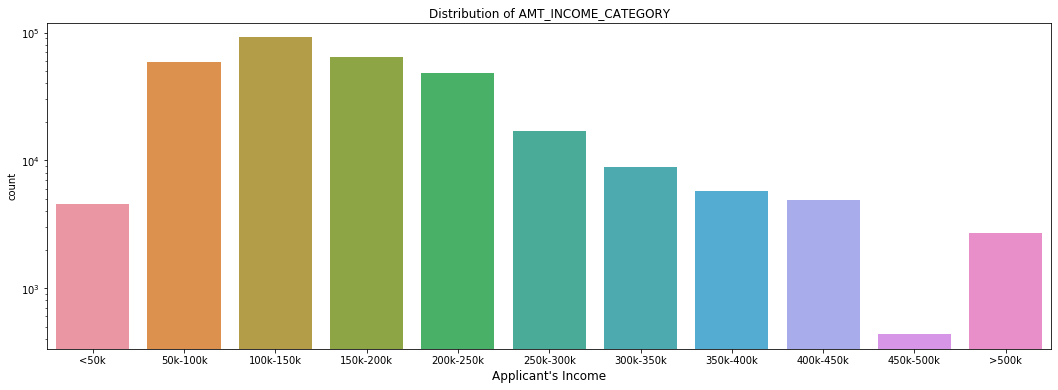

In [62]:
# Distribution of Applicant's income
plt.figure(figsize = (18,6))
sns.countplot(app_new['AMT_INCOME_CATEGORY'],order=intervals)
plt.yscale('log')
plt.xlabel("Applicant's Income",fontsize=12)
plt.title('Distribution of AMT_INCOME_CATEGORY')
plt.show()

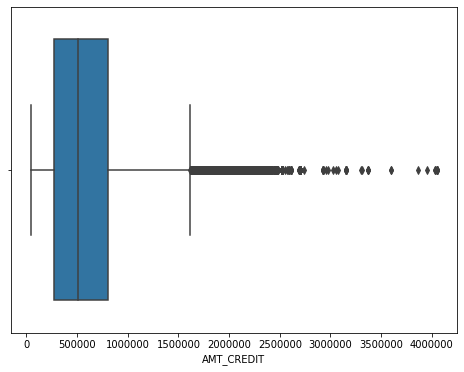

In [63]:
# AMT_CREDIT
plt.figure(figsize = (8,6))
sns.boxplot(app_new['AMT_CREDIT'])
plt.show()

In [64]:
app_new['AMT_CREDIT'].describe()

count    3.075040e+05
mean     5.990294e+05
std      4.024941e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [65]:
np.percentile(app_new['AMT_CREDIT'],99)

1854000.0

From the above analysis we can observe that 99% of values lie within 1854000. We can handle this by binning the data

In [66]:
bins = [0,200000,300000,400000,500000,600000,700000,800000,900000,1000000000]
intervals = ['<200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','>900k']

app_new['AMT_CREDIT_RANGE']=pd.cut(app_new['AMT_CREDIT'],bins=bins,labels=intervals)

In [67]:
#app_new.drop('AMT_CREDIT',axis=1,inplace=True)

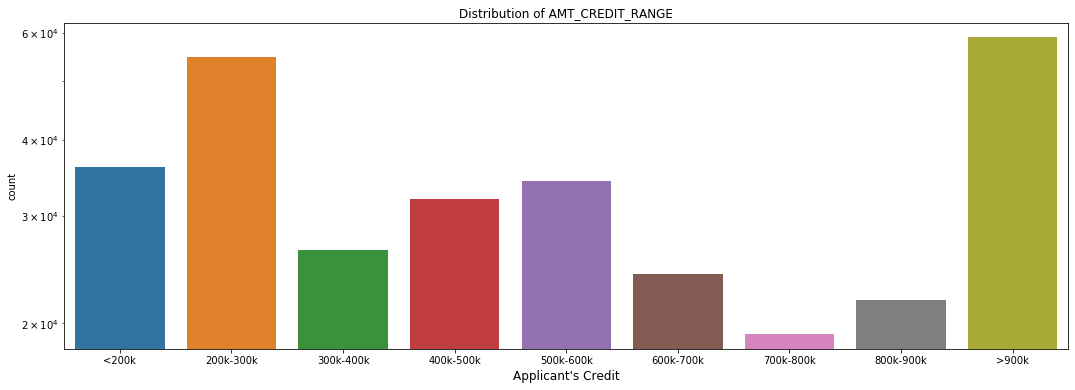

In [68]:
# Distribution of Applicant's Credit
plt.figure(figsize = (18,6))
sns.countplot(app_new['AMT_CREDIT_RANGE'],order=intervals)
plt.yscale('log')
plt.xlabel("Applicant's Credit",fontsize=12)
plt.title('Distribution of AMT_CREDIT_RANGE')
plt.show()

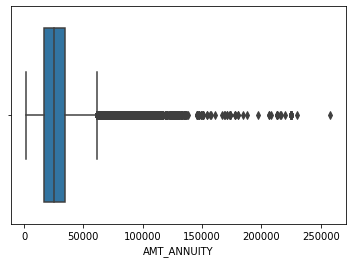

In [69]:
# AMT_CREDIT
sns.boxplot(app_new['AMT_ANNUITY'])
plt.show()

In [70]:
app_new['AMT_ANNUITY'].describe()

count    307504.000000
mean      27108.642116
std       14493.580651
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [71]:
np.percentile(app_new['AMT_ANNUITY'],99)

70006.5

From the above analysis we can observe that 99% of values lie within 70006.5. We can handle this by binning the data

In [72]:
bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,300000]
intervals = ['<10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','>80k']

app_new['AMT_ANNUITY_RANGE']=pd.cut(app_new['AMT_ANNUITY'],bins=bins,labels=intervals)

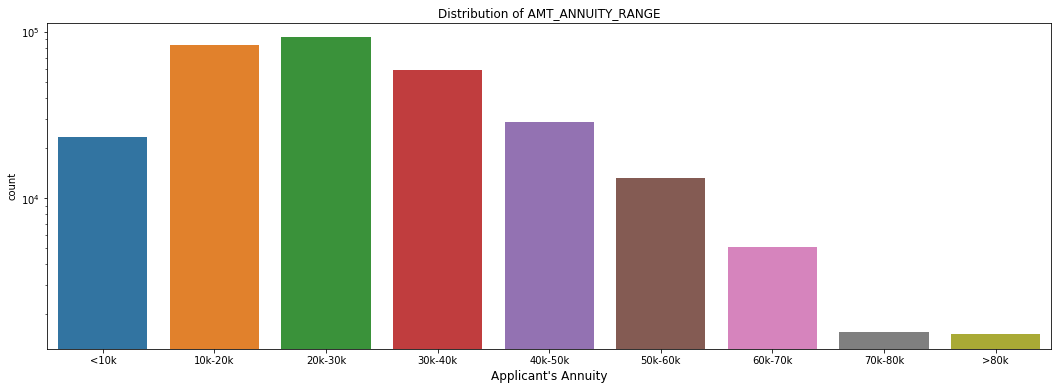

In [73]:
# Distribution of Applicant's Annuity
plt.figure(figsize = (18,6))
sns.countplot(app_new['AMT_ANNUITY_RANGE'],order=intervals)
plt.yscale('log')
plt.xlabel("Applicant's Annuity",fontsize=12)
plt.title('Distribution of AMT_ANNUITY_RANGE')
plt.show()

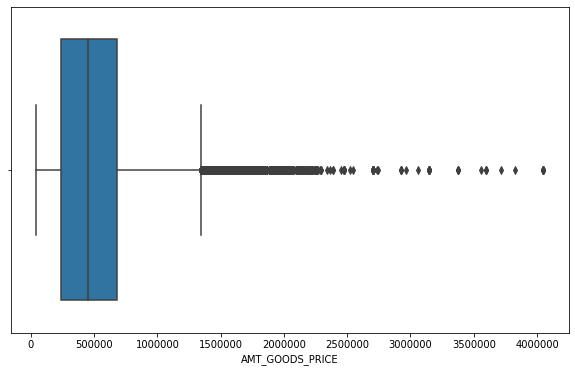

In [74]:
# AMT_GOODS_PRICE
plt.figure(figsize = (10,6))
sns.boxplot(app_new['AMT_GOODS_PRICE'])
plt.show()

In [75]:
app_new['AMT_GOODS_PRICE'].describe()

count    3.075040e+05
mean     5.383987e+05
std      3.692816e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [76]:
np.percentile(app_new['AMT_GOODS_PRICE'],90)

1093500.0

From the above analysis we can observe that 90% of values lie within 1093500. We can handle this by binning the data

In [77]:
bins = [0,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000]
intervals = ['<1mil','1mil-1.5mil','1.5mil-2mil','2mil-2.5mil','2.5mil-3mil','3mil-3.5mil','3.5mil-4mil','4mil-4.5mil','>4.5mil']

app_new['AMT_GOODS_PRICE_RANGE']=pd.cut(app_new['AMT_GOODS_PRICE'],bins=bins,labels=intervals)

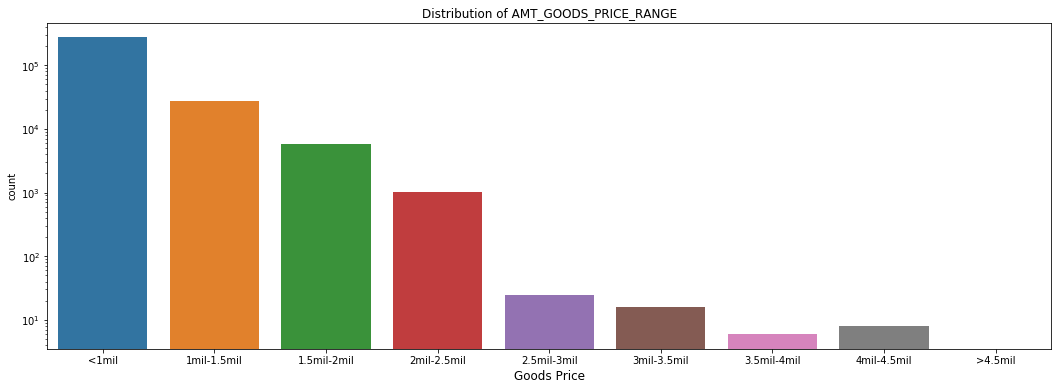

In [78]:
# Distribution of Goods Price
plt.figure(figsize = (18,6))
sns.countplot(app_new['AMT_GOODS_PRICE_RANGE'],order=intervals)
plt.yscale('log')
plt.xlabel("Goods Price",fontsize=12)
plt.title('Distribution of AMT_GOODS_PRICE_RANGE')
plt.show()

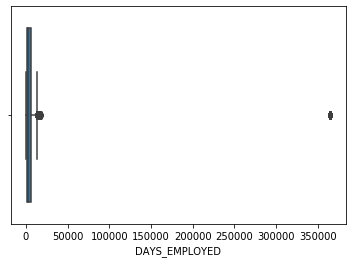

In [79]:
# DAYS_EMPLOYED
sns.boxplot(app_new['DAYS_EMPLOYED'])
plt.show()

In [80]:
app_new['DAYS_EMPLOYED'].describe()

count    307504.000000
mean      67726.225139
std      139444.991702
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [81]:
# Conversion of Maximum of 'DAYS_EMPLOYED' column to years
app_new['DAYS_EMPLOYED'].max()/365

1000.6657534246575

In [82]:
app_new[app_new['DAYS_EMPLOYED']<max(app_new['DAYS_EMPLOYED'])]['DAYS_EMPLOYED'].describe()

count    252130.000000
mean       2384.163935
std        2338.332672
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

Looks like the maximum value is a mistake.A person can not be employed for 1000 years. Lets Investigate this Value

In [83]:
maxEmployed=max(app_new['DAYS_EMPLOYED'])

In [84]:
app_new.shape

(307504, 81)

In [85]:
# Number of wrong entries
app_new[app_new['DAYS_EMPLOYED']==maxEmployed]['DAYS_EMPLOYED'].count()

55374

In [86]:
# % of wrong entries
app_new[app_new['DAYS_EMPLOYED']==maxEmployed]['DAYS_EMPLOYED'].count()/app_new.shape[0]*100

18.007570633227534

55374 entries have wrong data in 'DAYS_EMPLOYED' column which is 18% of the data. Dropping 18% of data doesn't make sense here as the dataset is highly imbalanced with respect to Target Values. Therefore we will ignore this column for time being and will separately analise its effect on defaulting of borrowers

In [87]:
# CNT_CHILDREN
app_new['CNT_CHILDREN'].describe()

count    307504.000000
mean          0.417051
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

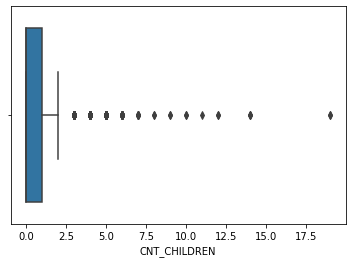

In [88]:
sns.boxplot(app_new['CNT_CHILDREN'])
plt.show()

In [89]:
app_new['CNT_CHILDREN'].value_counts()

0     215366
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

We can observe that 2 people are having 19 children though this situation is Biologically possible. And yes, more the children more expenses and more financial troubles. Lets retain this data as it is. We can not outright rule this out as mistake

It seems columns OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE & 
DEF_60_CNT_SOCIAL_CIRCLE have some outliers. We need to investigate further

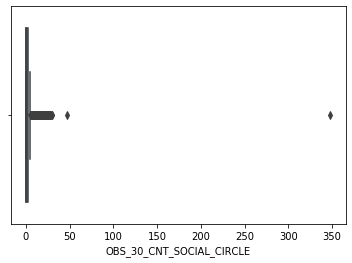

In [90]:
# OBS_30_CNT_SOCIAL_CIRCLE
sns.boxplot(app_new['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [91]:
app_new['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    307504.000000
mean          1.417487
std           2.398346
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [92]:
np.percentile(app_new['OBS_30_CNT_SOCIAL_CIRCLE'],99)

10.0

In [93]:
app_new['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      164928
1.0       48782
2.0       29808
3.0       20321
4.0       14143
5.0        9553
6.0        6453
7.0        4389
8.0        2967
9.0        2003
10.0       1375
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [94]:
app_new.shape

(307504, 81)

Since the value of 348.0 in OBS_30_CNT_SOCIAL_CIRCLE is one such value and is a clear outlier we will drop it from our analysis

In [95]:
maxOBS30=app_new['OBS_30_CNT_SOCIAL_CIRCLE'].max()

In [96]:
app_new=app_new[app_new['OBS_30_CNT_SOCIAL_CIRCLE']!=maxOBS30]

In [97]:
app_new.shape

(307503, 81)

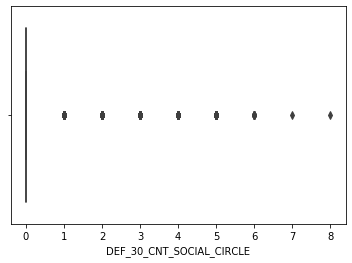

In [98]:
# DEF_30_CNT_SOCIAL_CIRCLE
sns.boxplot(app_new['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [99]:
app_new['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    307503.000000
mean          0.142821
std           0.441782
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [100]:
app_new['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0    272340
1.0     28327
2.0      5323
3.0      1192
4.0       252
5.0        56
6.0        11
7.0         1
8.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

DEF_30_CNT_SOCIAL_CIRCLE column doesn't seem to be having any outlier. we can therefore ignore this

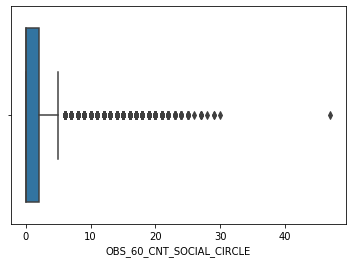

In [101]:
# OBS_60_CNT_SOCIAL_CIRCLE
sns.boxplot(app_new['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [102]:
app_new['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    307503.000000
mean          1.399476
std           2.295489
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          47.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [103]:
np.percentile(app_new['OBS_60_CNT_SOCIAL_CIRCLE'],99)

10.0

In [104]:
app_new['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     165684
1.0      48869
2.0      29766
3.0      20214
4.0      13946
5.0       9463
6.0       6349
7.0       4343
8.0       2886
9.0       1959
10.0      1334
11.0       837
12.0       620
13.0       401
14.0       238
15.0       166
16.0       137
17.0        73
18.0        49
19.0        44
20.0        30
21.0        28
22.0        20
23.0        13
24.0        12
25.0        11
27.0         5
29.0         2
28.0         1
47.0         1
26.0         1
30.0         1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

Since the value of 47.0 in OBS_60_CNT_SOCIAL_CIRCLE is one such value and is a clear outlier we will drop it from our analysis

In [105]:
app_new.shape

(307503, 81)

In [106]:
maxOBS60=app_new['OBS_60_CNT_SOCIAL_CIRCLE'].max()

In [107]:
app_new=app_new[app_new['OBS_60_CNT_SOCIAL_CIRCLE']!=maxOBS60]

In [108]:
app_new.shape

(307502, 81)

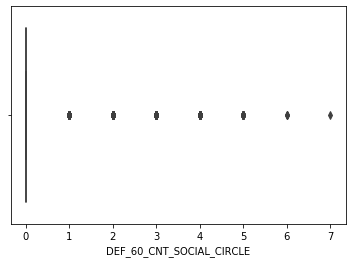

In [109]:
# DEF_60_CNT_SOCIAL_CIRCLE
sns.boxplot(app_new['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [110]:
app_new['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    307502.000000
mean          0.099625
std           0.359090
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [111]:
app_new['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0    281736
1.0     21840
2.0      3170
3.0       598
4.0       134
5.0        20
6.0         3
7.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

DEF_60_CNT_SOCIAL_CIRCLE column doesn't seem to be having any outlier. we can therefore ignore this

In [112]:
app_new.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  ...                         0.0                       0.0   
1  ...                         0.0                       0.0   
2  ...                         0.0                       0.0   
3  ...                         0.0                       0.0   
4  ...                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  AMT_INCOME_CATEGORY  \
0                       0.0                        1.0            200k-250k   
1                       0.0                        0.0            250k-300k   
2                       0.0                        0.0             50k-100k   
3                       0.0                        1.0            100k-150k   
4                       0.0                        0.0            100k-150k   

   AMT_CREDIT_RANGE  AMT_ANNUITY_RANGE  AMT_GOODS_PRICE_RANGE  
0         400k-500k            20k-30k                  <1mil  
1             >900k            30k-40k            1mil-1.5mil  
2             <200k               <10k                  <1mil  
3         300k-400k            20k-30k                  <1mil  
4         500k-600k            20k-30k                  <1mil  

[5 rows x 81 columns]

In [113]:
app_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307502 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307502 non-null  int64   
 1   TARGET                       307502 non-null  int64   
 2   NAME_CONTRACT_TYPE           307502 non-null  object  
 3   CODE_GENDER                  307502 non-null  object  
 4   FLAG_OWN_CAR                 307502 non-null  object  
 5   FLAG_OWN_REALTY              307502 non-null  object  
 6   CNT_CHILDREN                 307502 non-null  int64   
 7   AMT_INCOME_TOTAL             307502 non-null  float64 
 8   AMT_CREDIT                   307502 non-null  float64 
 9   AMT_ANNUITY                  307502 non-null  float64 
 10  AMT_GOODS_PRICE              307502 non-null  float64 
 11  NAME_TYPE_SUITE              307502 non-null  object  
 12  NAME_INCOME_TYPE             307502 non-null

#### Checking of Flag variables for Phone and Email

In [114]:
app_new['FLAG_MOBIL'].value_counts()

1    307502
Name: FLAG_MOBIL, dtype: int64

In [115]:
app_new['FLAG_EMP_PHONE'].value_counts()

1    252116
0     55386
Name: FLAG_EMP_PHONE, dtype: int64

In [116]:
app_new['FLAG_WORK_PHONE'].value_counts()

0    246199
1     61303
Name: FLAG_WORK_PHONE, dtype: int64

In [117]:
app_new['FLAG_CONT_MOBILE'].value_counts()

1    306928
0       574
Name: FLAG_CONT_MOBILE, dtype: int64

In [118]:
app_new['FLAG_PHONE'].value_counts()

0    221076
1     86426
Name: FLAG_PHONE, dtype: int64

In [119]:
app_new['FLAG_EMAIL'].value_counts()

0    290061
1     17441
Name: FLAG_EMAIL, dtype: int64

**Observation:** We can see that FLAG_MOBIL has only one unique value which doesn't help us in deciding in any way who will default. Lets drop it from our analysis. Further in the inputs available with us the descriptions for FLAG_EMP_PHONE(Did client provide work phone),FLAG_WORK_PHONE (Did client provide home phone) & FLAG_PHONE(Did client provide home phone) is confusing or we can even say mixed up. Its better to avoid (drop) such an information to have good analysis. We will therefore pursue with remaining 2 variables FLAG_CONT_MOBILE(Mobile Phone Reachable?) & FLAG_EMAIL(did client provide email id)

In [120]:
# Dropping of unwanted variables
app_new.drop(['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE'],axis=1, inplace=True)

In [121]:
app_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307502 entries, 0 to 307510
Data columns (total 77 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307502 non-null  int64   
 1   TARGET                       307502 non-null  int64   
 2   NAME_CONTRACT_TYPE           307502 non-null  object  
 3   CODE_GENDER                  307502 non-null  object  
 4   FLAG_OWN_CAR                 307502 non-null  object  
 5   FLAG_OWN_REALTY              307502 non-null  object  
 6   CNT_CHILDREN                 307502 non-null  int64   
 7   AMT_INCOME_TOTAL             307502 non-null  float64 
 8   AMT_CREDIT                   307502 non-null  float64 
 9   AMT_ANNUITY                  307502 non-null  float64 
 10  AMT_GOODS_PRICE              307502 non-null  float64 
 11  NAME_TYPE_SUITE              307502 non-null  object  
 12  NAME_INCOME_TYPE             307502 non-null

# 4. Data Handling - Previous Applications Data

In [122]:
prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [123]:
# Data types of the previous applications

prev.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

## 4.1 Handling of Missing Values

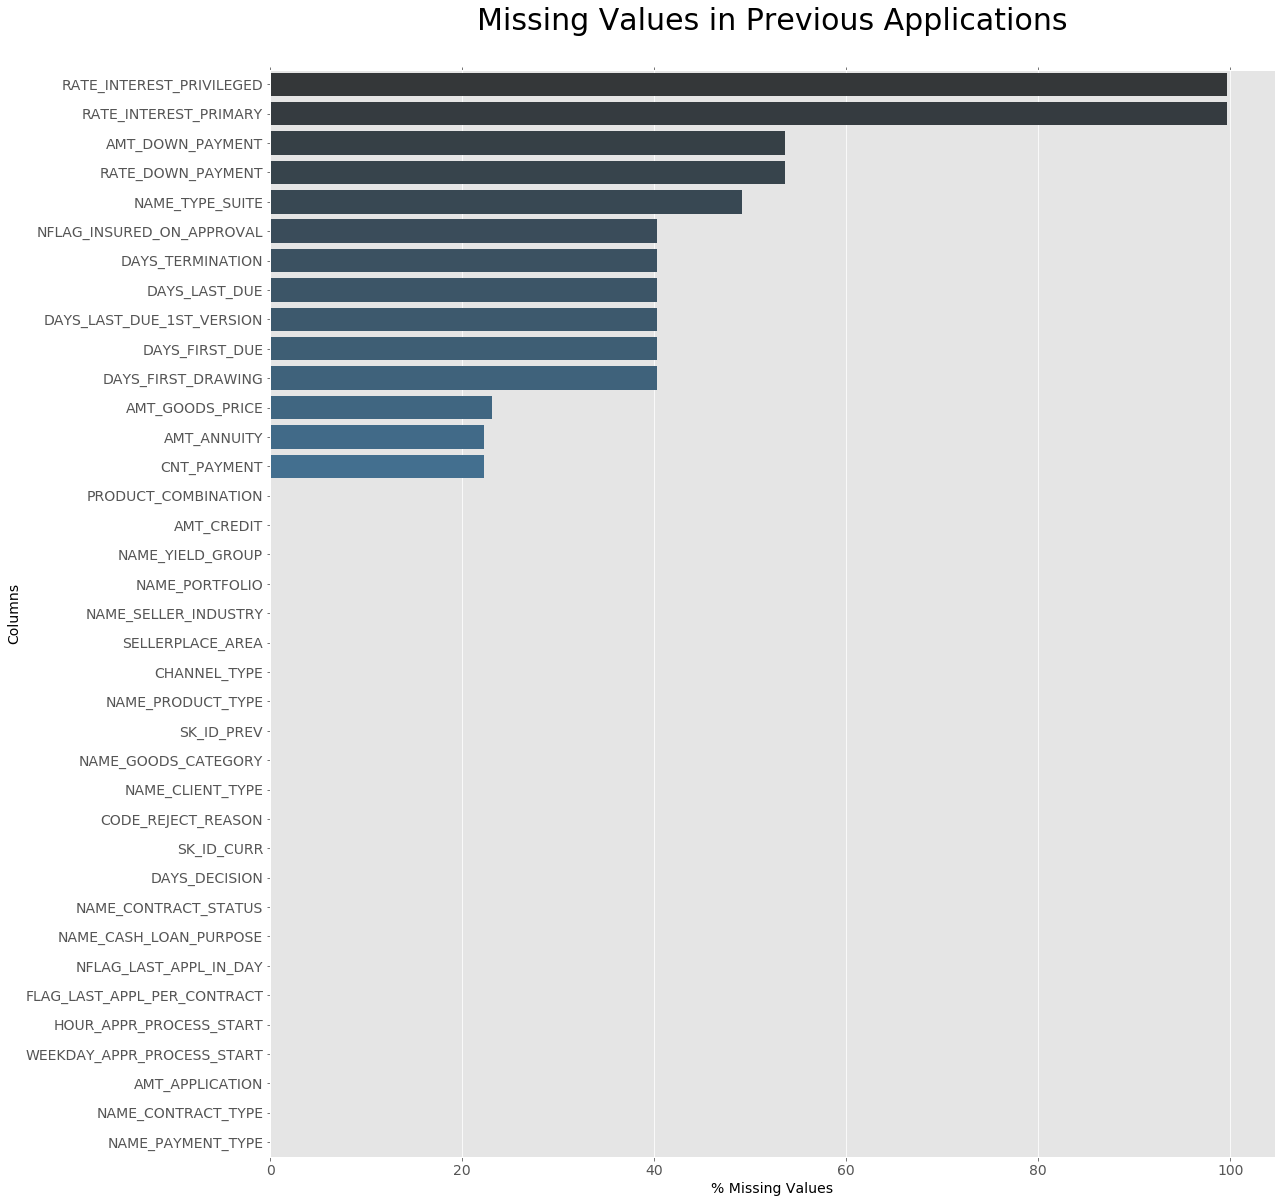

In [124]:
# Mising Values as % for Previous applications

missing_prev = pd.DataFrame(prev.isnull().sum()*100/prev.shape[0])
missing_prev.rename(columns={0 :'Percentage'}, inplace=True)
missing_prev.sort_values(by=["Percentage"],ascending=False, inplace=True)

plt.figure(figsize=[18,20])
plt.style.use('ggplot')
sns.barplot(y=missing_prev.index,x=missing_prev.Percentage,palette="Blues_d")
plt.title('Missing Values in Previous Applications\n', fontdict={'fontsize':30, 'color':'black'})
plt.xlabel('% Missing Values', fontdict = {'fontsize': 14, 'fontweight': 6, 'color' : 'black'})
plt.ylabel('Columns', fontdict = {'fontsize': 14, 'fontweight': 6, 'color' : 'black'})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis="x", bottom=True, top=True)
plt.show()

In [125]:
# REORDER the SK_ID_CURR as first column for consistency with Application dataframe
col = prev.pop("SK_ID_CURR")
prev.insert(0, col.name, col)

In [126]:
RATE_INTEREST_PRIVILEGED_avg = np.mean(prev['RATE_INTEREST_PRIVILEGED'])
RATE_INTEREST_PRIMARY_avg = np.mean(prev['RATE_INTEREST_PRIMARY'])
print (round(RATE_INTEREST_PRIVILEGED_avg,3), round(RATE_INTEREST_PRIMARY_avg,3))

0.774 0.188


We see that the rate of interest for primary and privileged is quite different. Since 99% data is missing, it makes sense to drop these columns

In [127]:
# DROP columns with 99% missing values

prev.drop('RATE_INTEREST_PRIVILEGED',axis=1, inplace=True)
prev.drop('RATE_INTEREST_PRIMARY',axis=1, inplace=True)

AMT_DOWN_PAYMENT some way shows payback capablity of the loan taker. Therefore it is not dropped, but rather kept out of the data frame which will be taken forward for analysis. When there is need, one can go back to this column. 

So let us create a new Dataframe prev_new by keeping the following columns out: <br>
AMT_DOWN_PAYMENT --> More than 50% missing value <br>
RATE_DOWN_PAYMENT --> More than 50% missing value <br>
WEEKDAY_APPR_PROCESS_START --> Not relevant <br>
HOUR_APPR_PROCESS_START --> Not relevant <br>
FLAG_LAST_APPL_PER_CONTRACT --> Not relevant <br>
NFLAG_LAST_APPL_IN_DAY --> Not relevant <br>

In [128]:
keep_out_list = ['AMT_DOWN_PAYMENT',
                 'RATE_DOWN_PAYMENT',
                 'WEEKDAY_APPR_PROCESS_START', 
                 'HOUR_APPR_PROCESS_START', 
                 'FLAG_LAST_APPL_PER_CONTRACT',
                'NFLAG_LAST_APPL_IN_DAY']

prev_new = prev.copy(deep=True)
for item in keep_out_list:
    prev_new.drop(item, axis=1, inplace=True)

In [129]:
# Getting the list of columns with missing values at this stage
print (list(prev_new.isnull().sum().index[prev_new.isnull().sum().iloc[:] >0]))

['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_PAYMENT', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [130]:
prev_new.NAME_TYPE_SUITE.unique()

array([nan, 'Unaccompanied', 'Spouse, partner', 'Family', 'Children',
       'Other_B', 'Other_A', 'Group of people'], dtype=object)

In [131]:
# IMPUTATE NAME_TYPE_SUITE NaN
prev_new['NAME_TYPE_SUITE'].fillna('Not Recorded', inplace = True)

NaN in the NAME_TYPE_SUITE looks to be rather a 'Not Recorded' type of a category

In [132]:
# MODIFY NFLAG_INSURED_ON_APPROVAL column with categorical strings

mask = prev_new['NFLAG_INSURED_ON_APPROVAL'] == 1
prev_new.loc[mask,'NFLAG_INSURED_ON_APPROVAL'] = 'Yes'

mask = prev_new['NFLAG_INSURED_ON_APPROVAL'] == 0
prev_new.loc[mask,'NFLAG_INSURED_ON_APPROVAL'] = 'No'

prev_new['NFLAG_INSURED_ON_APPROVAL'].fillna('Unknown', inplace = True)

NFLAG_INSURED_ON_APPROVAL is a relatively unimportant column.
Removing rows on basis of NA values in NFLAG_INSURED_ON_APPROVAL makes no sense.
Removing column itself is an option, but perhaps it doesnt hurt to retain this column

Therefore chose to modify the column as follows:
Yes for 1
No for 0
Unknown for na values

In [133]:
prev_new['NFLAG_INSURED_ON_APPROVAL'].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [134]:
# Getting the list of columns with missing values at this stage
print (list(prev_new.isnull().sum().index[prev_new.isnull().sum().iloc[:] >0]))

['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']


In [135]:
prev_new.NAME_CONTRACT_TYPE.isnull().sum()

0

In [136]:
prev_new.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [137]:
# DROP rows with NAME_CONTRACT_TYPE = XNA

prev_new = prev_new.drop(prev_new[prev_new.NAME_CONTRACT_TYPE == 'XNA'].index)

Drop rows with NAME_CONTRACT_TYPE = 'XNA' because this category is not there in the applications DF and also we cannot be analysis without knowing the contract type.

In [138]:
prev_new.NAME_PRODUCT_TYPE.isnull().sum()

0

In [139]:
prev_new.NAME_PRODUCT_TYPE.value_counts()

XNA        1063320
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

We see that NAME_CONTRACT_TYPE and NAME_PRODUCT_TYPE are clean data in the dataframe.
They both appear similar, but NAME_CONTRACT_TYPE seems to be more relevant.
Further also NAME_CONTRACT_TYPE is there in the Applications Dataframe 

Therefore to impute 6 columns: NAME_CONTRACT_TYPE is used as the basis to select the corresponding median value.

In [140]:
# Illustration of the difference in medians taken from full data set or from segmented data by NAME_CONTRACT_TYPE

print ('Grand Median:                                      ', prev_new['DAYS_FIRST_DUE'].median())
print ('Median when NAME_CONTRACT_TYPE = Cash loans:       ', prev_new['DAYS_FIRST_DUE'][prev_new.NAME_CONTRACT_TYPE == 'Cash loans'].median())
print ('Median when NAME_CONTRACT_TYPE = Consumer loans:   ', prev_new['DAYS_FIRST_DUE'][prev_new.NAME_CONTRACT_TYPE == 'Consumer loans'].median())
print ('Median when NAME_CONTRACT_TYPE = Revolving loans:  ', prev_new['DAYS_FIRST_DUE'][prev_new.NAME_CONTRACT_TYPE == 'Revolving loans'].median())

Grand Median:                                       -831.0
Median when NAME_CONTRACT_TYPE = Cash loans:        -708.0
Median when NAME_CONTRACT_TYPE = Consumer loans:    -1065.0
Median when NAME_CONTRACT_TYPE = Revolving loans:   -254.0


If we had replaced with grand median, it might have led to incorrect skew.

Now let us look at other DAYS_ variables below:

In [141]:
print ('Median when NAME_CONTRACT_TYPE = Revolving loans:  ', prev_new['DAYS_LAST_DUE'][prev_new.NAME_CONTRACT_TYPE == 'Revolving loans'].median())

Median when NAME_CONTRACT_TYPE = Revolving loans:   365243.0


Why is the MEDIAN so high ?

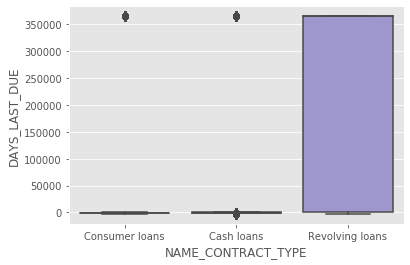

In [142]:
sns.boxplot(data=prev_new,x='NAME_CONTRACT_TYPE',y='DAYS_LAST_DUE',fliersize=7)
plt.show()

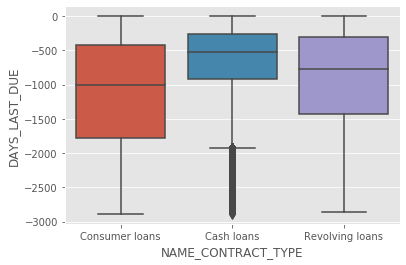

In [143]:
sns.boxplot(data=prev_new[prev_new.DAYS_LAST_DUE <=0],x='NAME_CONTRACT_TYPE',y='DAYS_LAST_DUE',fliersize=7)
plt.show()

We notice that the high median of 365243.0 is a clear outlier. 

This can be imputed by 0. But the median will still be 0.

Therefore we can proceed to imputate Missing Values by MEDIAN VALUE.

In [144]:
# Impute with MEDIANS taken from respective NAME_CONTRACT_TYPE 

cList = list(prev_new.NAME_CONTRACT_TYPE.unique())
iList = list(missing_prev[(missing_prev.Percentage > 38) & (missing_prev.Percentage < 42)].index)
iList.remove('NFLAG_INSURED_ON_APPROVAL')

for impt in iList:
    for cc in cList:
        imputate_value = prev_new[impt][prev_new.NAME_CONTRACT_TYPE == cc].median()
        print (impt, cc, imputate_value)
        
        #prev_new[prev_new.NAME_CONTRACT_TYPE == cc][impt] = prev_new[prev_new.NAME_CONTRACT_TYPE == cc][impt].fillna(imputate_value)
        #prev_new[prev_new.NAME_CONTRACT_TYPE == cc][impt].fillna(imputate_value, inplace=True)
        
        # FILLNA is not working with inplace = True & in combination with DF slicing
        mask = prev_new.NAME_CONTRACT_TYPE == cc
        prev_new.loc[mask, impt] = imputate_value


DAYS_TERMINATION Consumer loans -816.0
DAYS_TERMINATION Cash loans -338.0
DAYS_TERMINATION Revolving loans 365243.0
DAYS_LAST_DUE Consumer loans -828.0
DAYS_LAST_DUE Cash loans -345.0
DAYS_LAST_DUE Revolving loans 365243.0
DAYS_LAST_DUE_1ST_VERSION Consumer loans -776.0
DAYS_LAST_DUE_1ST_VERSION Cash loans -76.0
DAYS_LAST_DUE_1ST_VERSION Revolving loans 365243.0
DAYS_FIRST_DUE Consumer loans -1065.0
DAYS_FIRST_DUE Cash loans -708.0
DAYS_FIRST_DUE Revolving loans -254.0
DAYS_FIRST_DRAWING Consumer loans 365243.0
DAYS_FIRST_DRAWING Cash loans 365243.0
DAYS_FIRST_DRAWING Revolving loans -305.0


In [145]:
# Getting the list of columns with missing values at this stage
print (list(prev_new.isnull().sum().index[prev_new.isnull().sum().iloc[:] >0]))

['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']


In [146]:
prev_new[prev_new.AMT_ANNUITY.isnull()]['AMT_APPLICATION'].value_counts()

0.0         334800
62955.0        244
225000.0       198
134955.0       177
31455.0        160
             ...  
94014.0          1
47002.5          1
49563.9          1
60376.5          1
98370.0          1
Name: AMT_APPLICATION, Length: 13993, dtype: int64

We see that majority of the missing values in AMT_ANNUITY have a loan amount application of 0.
Now let us see what happens with AMT_CREDIT which is the credit amount of loan the client was offered

In [147]:
prev_new[prev_new.AMT_ANNUITY.isnull()]['AMT_CREDIT'].value_counts()

0.0         334799
62955.0        244
225000.0       198
134955.0       177
31455.0        160
             ...  
94014.0          1
47002.5          1
49563.9          1
60376.5          1
94797.0          1
Name: AMT_CREDIT, Length: 13994, dtype: int64

We see a very similar trend here.. The AMT_CREDIT is 0 for most of the NULL values of AMT_ANNUITY

Now let us see a scatter plot of AMT_CREDIT on X axis and AMT_ANNUITY on Y axis

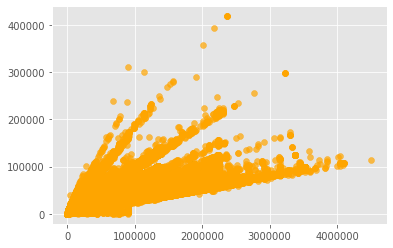

In [148]:
plt.scatter(prev_new.AMT_CREDIT, prev_new.AMT_ANNUITY, alpha=0.7, color='orange')
plt.show()

In [149]:
prev_new[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT']].corr()

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT
AMT_ANNUITY         1.000000         0.808872    0.816429
AMT_APPLICATION     0.808872         1.000000    0.975822
AMT_CREDIT          0.816429         0.975822    1.000000

We can clearly see that has a 0.8 correlation with AMT_CREDIT. <br>
The missing values of AMT_ANNUITY can be safely assumed to 0 if AMT_APPLICATION is 0.

In [150]:
# Imputate AMT_ANNUITY as 0 if AMT_APPLICATION = 0

# prev_new[prev_new.AMT_APPLICATION == 0]['AMT_ANNUITY'].fillna(value=0.0, inplace=True)

# FILLNA is not working with inplace = True & in combination with DF slicing
mask = prev_new.AMT_APPLICATION == 0
prev_new.loc[mask, 'AMT_ANNUITY'] = 0.0

In [151]:
prev_new[prev_new.AMT_CREDIT.isnull()]

SK_ID_CURR  SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1127152      438387     2204450    Revolving loans          0.0   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE  \
1127152              0.0         NaN              NaN                    XAP   

        NAME_CONTRACT_STATUS  DAYS_DECISION  ... NAME_SELLER_INDUSTRY  \
1127152             Approved           -608  ...         Connectivity   

        CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION DAYS_FIRST_DRAWING  \
1127152         0.0              XNA         Card Street             -305.0   

        DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE  \
1127152         -254.0                  365243.0      365243.0   

         DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
1127152          365243.0                   Unknown  

[1 rows x 29 columns]

In [152]:
# Drop the 1 row with missing value in AMT_CREDIT

prev_new.drop(prev_new[prev_new.AMT_CREDIT.isnull()].index, axis=0, inplace=True)

In [153]:
# Getting the list of columns with missing values at this stage
print (list(prev_new.isnull().sum().index[prev_new.isnull().sum().iloc[:] >0]))

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']


In [154]:
prev_new.AMT_GOODS_PRICE.isnull().sum()

385168

In [155]:
prev_new[prev_new.AMT_GOODS_PRICE.isnull()]['NAME_GOODS_CATEGORY'].value_counts()

XNA    385168
Name: NAME_GOODS_CATEGORY, dtype: int64

So all the missing values in AMT_GOODS_PRICE are when NAME_GOODS_CATEGORY = XNA :-)

In [156]:
prev_new.NAME_GOODS_CATEGORY.unique()

array(['Mobile', 'XNA', 'Consumer Electronics', 'Construction Materials',
       'Auto Accessories', 'Photo / Cinema Equipment', 'Computers',
       'Audio/Video', 'Medicine', 'Clothing and Accessories', 'Furniture',
       'Sport and Leisure', 'Homewares', 'Gardening', 'Jewelry',
       'Vehicles', 'Education', 'Medical Supplies', 'Other',
       'Direct Sales', 'Office Appliances', 'Fitness', 'Tourism',
       'Insurance', 'Additional Service', 'Weapon', 'Animals',
       'House Construction'], dtype=object)

In [157]:
prev_new[prev_new.NAME_GOODS_CATEGORY == 'XNA']['AMT_GOODS_PRICE'].median()

234000.0

Can we even imputate AMT_GOODS_PRICE with its own median value ? Doesnt sounds to be right way !

In [158]:
prev_new[['AMT_APPLICATION','AMT_GOODS_PRICE']].corr()

AMT_APPLICATION  AMT_GOODS_PRICE
AMT_APPLICATION         1.000000         0.999884
AMT_GOODS_PRICE         0.999884         1.000000

Bingo !! - Correlation is 1 between AMT_APPLICATION and AMT_GOODS_PRICE

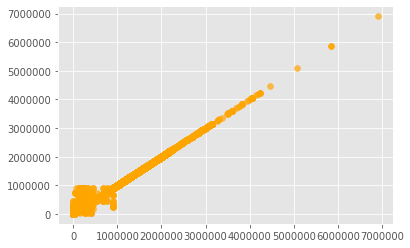

In [159]:
plt.scatter(prev_new.AMT_APPLICATION, prev_new.AMT_GOODS_PRICE, alpha=0.7, color='orange')
plt.show()

In [160]:
prev_new[prev_new.AMT_GOODS_PRICE.isnull()]['AMT_APPLICATION'].describe()

count    385168.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: AMT_APPLICATION, dtype: float64

We see that for the missing values of AMT_GOODS_PRICE, the best way to imputate with 0 since AMT_APPLICATION is also 0

In [161]:
# Imputate AMT_ANNUITY as 0 if AMT_APPLICATION = 0

prev_new['AMT_GOODS_PRICE'].fillna(value=0.0, inplace=True)

# FILLNA is not working with inplace = True & in combination with DF slicing
#mask = prev_new.AMT_APPLICATION == 0
#prev_new.loc[mask, 'AMT_ANNUITY'] = 0.0

In [162]:
# Getting the list of columns with missing values at this stage
print (list(prev_new.isnull().sum().index[prev_new.isnull().sum().iloc[:] >0]))

['AMT_ANNUITY', 'CNT_PAYMENT']


In [163]:
prev_new[prev_new.CNT_PAYMENT.isnull()].tail()

SK_ID_CURR  SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670187      435554     1971628         Cash loans          0.0   
1670190      175920     2381880         Cash loans          0.0   
1670193      179433     1120445    Revolving loans          0.0   
1670196      398290     1662123     Consumer loans          NaN   
1670203      383898     2844282     Consumer loans          NaN   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE  \
1670187              0.0         0.0              0.0                    XNA   
1670190              0.0         0.0              0.0                    XNA   
1670193              0.0         0.0              0.0                    XAP   
1670196          57910.5     57910.5          57910.5                    XAP   
1670203          14791.5     14791.5          14791.5                    XAP   

        NAME_CONTRACT_STATUS  DAYS_DECISION  ... NAME_SELLER_INDUSTRY  \
1670187             Canceled           -134  ...                  XNA   
1670190             Canceled           -243  ...                  XNA   
1670193              Refused           -365  ...                  XNA   
1670196         Unused offer           -289  ...         Connectivity   
1670203              Refused          -1848  ...         Connectivity   

        CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
1670187         NaN              XNA                      Cash   
1670190         NaN              XNA                      Cash   
1670193         NaN              XNA               Card Street   
1670196         NaN              XNA  POS mobile with interest   
1670203         NaN              XNA  POS mobile with interest   

        DAYS_FIRST_DRAWING DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  \
1670187           365243.0         -708.0                     -76.0   
1670190           365243.0         -708.0                     -76.0   
1670193             -305.0         -254.0                  365243.0   
1670196           365243.0        -1065.0                    -776.0   
1670203           365243.0        -1065.0                    -776.0   

        DAYS_LAST_DUE  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
1670187        -345.0            -338.0                   Unknown  
1670190        -345.0            -338.0                   Unknown  
1670193      365243.0          365243.0                   Unknown  
1670196        -828.0            -816.0                   Unknown  
1670203        -828.0            -816.0                   Unknown  

[5 rows x 29 columns]

In [164]:
prev_new.CNT_PAYMENT.isnull().sum()

371884

In [165]:
prev_new[(prev_new.CNT_PAYMENT.isnull()) & (prev_new.AMT_APPLICATION == 0)].shape

(334799, 29)

If the AMT_APPLICATION is 0, why should there be a Term of previous credit at application of the previous application ? So makes sense to impute this intersection of CNT_PAYMENT as 0

In [166]:
# Imputate AMT_ANNUITY as 0 if AMT_APPLICATION = 0

#prev_new['AMT_GOODS_PRICE'].fillna(value=0.0, inplace=True)

# FILLNA is not working with inplace = True & in combination with DF slicing
mask = prev_new.AMT_APPLICATION == 0
prev_new.loc[mask, 'CNT_PAYMENT'] = 0.0

In [167]:
rem_miss = prev_new[prev_new.CNT_PAYMENT.isnull()]['NAME_CONTRACT_TYPE'].value_counts()/prev_new['NAME_CONTRACT_TYPE'].value_counts()

print (rem_miss)

Cash loans         0.000978
Consumer loans     0.049852
Revolving loans    0.000021
Name: NAME_CONTRACT_TYPE, dtype: float64


We see that missing ratio for cash loans and revolving is negligible. We can drop rows with missing values in CNT_PAYMENT only for Cash loans & Revolving loans.

In [168]:
# DROP rows with CNT_PAYMENT.isnull() & NAME_CONTRACT_TYPE = 'Cash loans', Revolving loans'

prev_new = prev_new.drop(prev_new[(prev_new.CNT_PAYMENT.isnull()) & (prev_new.NAME_CONTRACT_TYPE == 'Cash loans')].index)
prev_new = prev_new.drop(prev_new[(prev_new.CNT_PAYMENT.isnull()) & (prev_new.NAME_CONTRACT_TYPE == 'Revolving loans')].index)
prev_new = prev_new.drop(prev_new[(prev_new.CNT_PAYMENT.isnull()) & (prev_new.NAME_CONTRACT_TYPE == 'Consumer loans')].index)
prev_new = prev_new.drop(prev_new[(prev_new.AMT_ANNUITY.isnull()) & (prev_new.NAME_CONTRACT_TYPE == 'Consumer loans')].index)

In [169]:
prev_new.isnull().sum()

SK_ID_CURR                   0
SK_ID_PREV                   0
NAME_CONTRACT_TYPE           0
AMT_ANNUITY                  0
AMT_APPLICATION              0
AMT_CREDIT                   0
AMT_GOODS_PRICE              0
NAME_CASH_LOAN_PURPOSE       0
NAME_CONTRACT_STATUS         0
DAYS_DECISION                0
NAME_PAYMENT_TYPE            0
CODE_REJECT_REASON           0
NAME_TYPE_SUITE              0
NAME_CLIENT_TYPE             0
NAME_GOODS_CATEGORY          0
NAME_PORTFOLIO               0
NAME_PRODUCT_TYPE            0
CHANNEL_TYPE                 0
SELLERPLACE_AREA             0
NAME_SELLER_INDUSTRY         0
CNT_PAYMENT                  0
NAME_YIELD_GROUP             0
PRODUCT_COMBINATION          0
DAYS_FIRST_DRAWING           0
DAYS_FIRST_DUE               0
DAYS_LAST_DUE_1ST_VERSION    0
DAYS_LAST_DUE                0
DAYS_TERMINATION             0
NFLAG_INSURED_ON_APPROVAL    0
dtype: int64

Now our Previous applications Data Frame doesn't have any missing values

## 4.2 Handling of data types

In [170]:
prev_new.head()

SK_ID_CURR  SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0      271877     2030495     Consumer loans     1730.430          17145.0   
1      108129     2802425         Cash loans    25188.615         607500.0   
2      122040     2523466         Cash loans    15060.735         112500.0   
3      176158     2819243         Cash loans    47041.335         450000.0   
4      202054     1784265         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP             Approved   
1    679671.0         607500.0                    XNA             Approved   
2    136444.5         112500.0                    XNA             Approved   
3    470790.0         450000.0                    XNA             Approved   
4    404055.0         337500.0                Repairs              Refused   

   DAYS_DECISION  ... NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0            -73  ...         Connectivity        12.0           middle   
1           -164  ...                  XNA        36.0       low_action   
2           -301  ...                  XNA        12.0             high   
3           -512  ...                  XNA        12.0           middle   
4           -781  ...                  XNA        24.0             high   

        PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0  POS mobile with interest           365243.0        -1065.0   
1          Cash X-Sell: low           365243.0         -708.0   
2         Cash X-Sell: high           365243.0         -708.0   
3       Cash X-Sell: middle           365243.0         -708.0   
4         Cash Street: high           365243.0         -708.0   

  DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE  DAYS_TERMINATION  \
0                    -776.0        -828.0            -816.0   
1                     -76.0        -345.0            -338.0   
2                     -76.0        -345.0            -338.0   
3                     -76.0        -345.0            -338.0   
4                     -76.0        -345.0            -338.0   

  NFLAG_INSURED_ON_APPROVAL  
0                        No  
1                       Yes  
2                       Yes  
3                       Yes  
4                   Unknown  

[5 rows x 29 columns]

In [171]:
prev_new.shape

(1632778, 29)

In [172]:
#Lets look at the Days columns more closely
prev_new[['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']].tail()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
1670209           -544            365243.0         -1065.0   
1670210          -1694            365243.0         -1065.0   
1670211          -1488            365243.0         -1065.0   
1670212          -1185            365243.0          -708.0   
1670213          -1193            365243.0          -708.0   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
1670209                     -776.0         -828.0            -816.0  
1670210                     -776.0         -828.0            -816.0  
1670211                     -776.0         -828.0            -816.0  
1670212                      -76.0         -345.0            -338.0  
1670213                      -76.0         -345.0            -338.0

In [173]:
# Conversion of Negative days to positive days
for i in ['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']:
    prev_new[i]=abs(prev_new[i])

In [174]:
#Lets look at the Days columns more closely
prev_new[['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']].tail()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
1670209            544            365243.0          1065.0   
1670210           1694            365243.0          1065.0   
1670211           1488            365243.0          1065.0   
1670212           1185            365243.0           708.0   
1670213           1193            365243.0           708.0   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
1670209                      776.0          828.0             816.0  
1670210                      776.0          828.0             816.0  
1670211                      776.0          828.0             816.0  
1670212                       76.0          345.0             338.0  
1670213                       76.0          345.0             338.0

In [175]:
# Conversion of Data Types of DAYS_REGISTRATION and DAYS_LAST_PHONE_CHANGE columns
prev_new[['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']]=prev_new[['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']].astype(int)

In [176]:
prev_new.dtypes

SK_ID_CURR                     int64
SK_ID_PREV                     int64
NAME_CONTRACT_TYPE            object
AMT_ANNUITY                  float64
AMT_APPLICATION              float64
AMT_CREDIT                   float64
AMT_GOODS_PRICE              float64
NAME_CASH_LOAN_PURPOSE        object
NAME_CONTRACT_STATUS          object
DAYS_DECISION                  int32
NAME_PAYMENT_TYPE             object
CODE_REJECT_REASON            object
NAME_TYPE_SUITE               object
NAME_CLIENT_TYPE              object
NAME_GOODS_CATEGORY           object
NAME_PORTFOLIO                object
NAME_PRODUCT_TYPE             object
CHANNEL_TYPE                  object
SELLERPLACE_AREA               int64
NAME_SELLER_INDUSTRY          object
CNT_PAYMENT                  float64
NAME_YIELD_GROUP              object
PRODUCT_COMBINATION           object
DAYS_FIRST_DRAWING             int32
DAYS_FIRST_DUE                 int32
DAYS_LAST_DUE_1ST_VERSION      int32
DAYS_LAST_DUE                  int32
D

Now our previous dataframe datatypes are handled.

## 4.3 Handling of outliers

In [177]:
prev_new[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE
count  1.632778e+06     1.632778e+06  1.632778e+06     1.632778e+06
mean   1.223793e+04     1.775421e+05  1.989009e+05     1.775648e+05
std    1.473154e+04     2.954341e+05  3.214091e+05     2.954536e+05
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00
25%    2.250000e+03     1.750050e+04  2.351700e+04     1.750500e+04
50%    8.015062e+03     7.195500e+04  8.178750e+04     7.195500e+04
75%    1.659217e+04     1.884420e+05  2.250000e+05     1.885216e+05
max    4.180581e+05     5.850000e+06  4.509688e+06     5.850000e+06

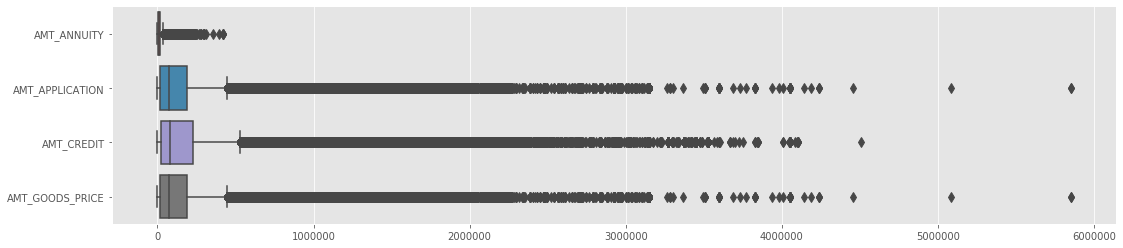

In [178]:
plt.figure(figsize = (18, 4))
sns.boxplot(data=prev_new[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']],fliersize=7, orient='h')
plt.show()

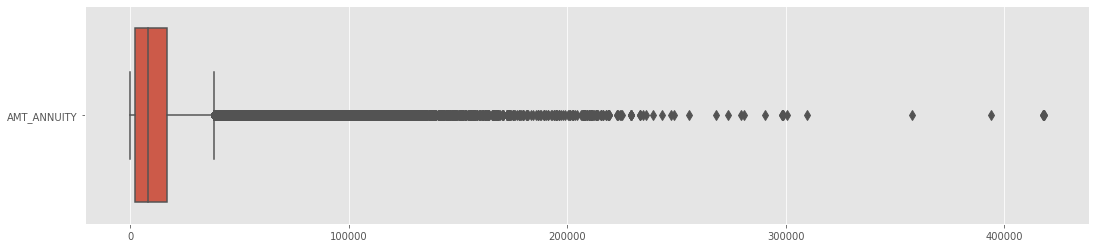

In [179]:
plt.figure(figsize = (18, 4))
sns.boxplot(data=prev_new[['AMT_ANNUITY']],fliersize=7, orient= 'h')
plt.show()

In [180]:
np.percentile(prev_new['AMT_ANNUITY'],99)

66227.625

We can bin AMT_ANNUITY

In [181]:
bins = [-100,10000,20000,30000,40000,50000,60000,70000,80000,1e20]
intervals = ['<10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','>80k']

prev_new['AMT_ANNUITY_RANGE']=pd.cut(prev_new['AMT_ANNUITY'],bins=bins,labels=intervals)

In [182]:
prev_new['AMT_CREDIT'].describe()

count    1.632778e+06
mean     1.989009e+05
std      3.214091e+05
min      0.000000e+00
25%      2.351700e+04
50%      8.178750e+04
75%      2.250000e+05
max      4.509688e+06
Name: AMT_CREDIT, dtype: float64

In [183]:
bins = [-100,200000,300000,400000,500000,600000,700000,800000,900000,1e20]
intervals = ['<200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','>900k']

prev_new['AMT_CREDIT_RANGE']=pd.cut(prev_new['AMT_CREDIT'],bins=bins,labels=intervals)

In [184]:
prev_new['AMT_CREDIT_RANGE'].value_counts()

<200k        1195546
200k-300k     136985
>900k          73472
400k-500k      61509
300k-400k      57218
500k-600k      38491
700k-800k      26395
600k-700k      22030
800k-900k      21132
Name: AMT_CREDIT_RANGE, dtype: int64

In [185]:
print ('99th percentile for AMT_GOODS_PRICE =', np.percentile(prev_new['AMT_GOODS_PRICE'],99))
print ('99th percentile for AMT_APPLICATION =', np.percentile(prev_new['AMT_APPLICATION'],99))

99th percentile for AMT_GOODS_PRICE = 1350000.0
99th percentile for AMT_APPLICATION = 1350000.0


In [186]:
bins = [-100,200000,300000,400000,500000,600000,700000,800000,900000,1e20]
intervals = ['<200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','>900k']

prev_new['AMT_GOODS_PRICE_RANGE']=pd.cut(prev_new['AMT_GOODS_PRICE'],bins=bins,labels=intervals)

In [187]:
bins = [-100,200000,300000,400000,500000,600000,700000,800000,900000,1e20]
intervals = ['<200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','>900k']

prev_new['AMT_APPLICATION_RANGE']=pd.cut(prev_new['AMT_APPLICATION'],bins=bins,labels=intervals)

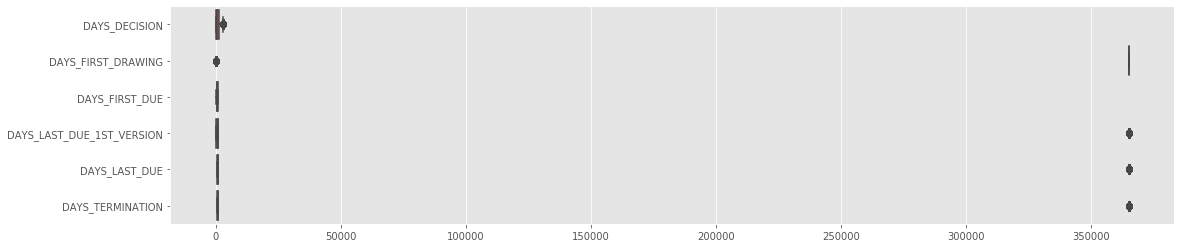

In [188]:
plt.figure(figsize = (18, 4))
sns.boxplot(data=prev_new[['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']],fliersize=7, orient='h')
plt.show()

It is clear from the above box plot that the DAYS'S columns in Previous data have many outliers.

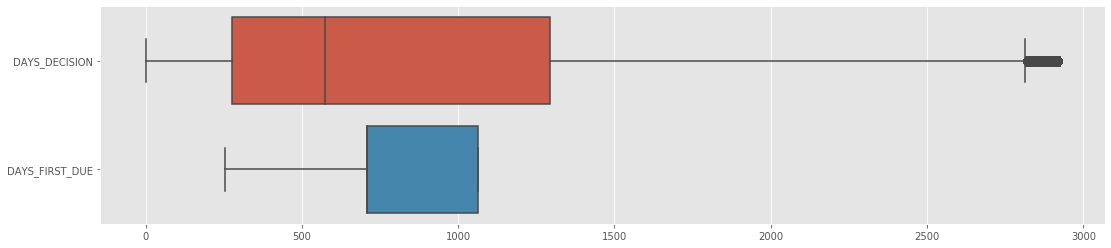

In [189]:
plt.figure(figsize = (18, 4))
sns.boxplot(data=prev_new[['DAYS_DECISION','DAYS_FIRST_DUE']],fliersize=7, orient= 'h')
plt.show()

DAYS_DECISION and DAYS_FIRST_DUE has no outliers

In [190]:
prev_new[['DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']].describe()

DAYS_FIRST_DRAWING  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
count        1.632778e+06               1.632778e+06   1.632778e+06   
mean         3.220705e+05               4.357257e+04   4.371768e+04   
std          1.178619e+05               1.178275e+05   1.177741e+05   
min          3.050000e+02               7.600000e+01   3.450000e+02   
25%          3.652430e+05               7.600000e+01   3.450000e+02   
50%          3.652430e+05               7.760000e+02   8.280000e+02   
75%          3.652430e+05               7.760000e+02   8.280000e+02   
max          3.652430e+05               3.652430e+05   3.652430e+05   

       DAYS_TERMINATION  
count      1.632778e+06  
mean       4.370938e+04  
std        1.177771e+05  
min        3.380000e+02  
25%        3.380000e+02  
50%        8.160000e+02  
75%        8.160000e+02  
max        3.652430e+05

In [191]:
prev_new['DAYS_FIRST_DRAWING'].value_counts(bins=5, normalize=True)

(292255.4, 365243.0]    0.881699
(-59.939, 73292.6]      0.118301
(219267.8, 292255.4]    0.000000
(146280.2, 219267.8]    0.000000
(73292.6, 146280.2]     0.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

DAYS_FIRST_DRAWING has 88% data which is 365243. This is clearly not going to be a reliable column for further analysis. So we drop this column

In [192]:
# DROP columns DAYS_FIRST_DRAWING

prev_new.drop('DAYS_FIRST_DRAWING',axis=1, inplace=True)

In [193]:
prev_new['DAYS_TERMINATION'].value_counts(bins=10, normalize=True)

(-26.906000000000002, 36828.5]    0.881699
(328752.5, 365243.0]              0.118301
(292262.0, 328752.5]              0.000000
(255771.5, 292262.0]              0.000000
(219281.0, 255771.5]              0.000000
(182790.5, 219281.0]              0.000000
(146300.0, 182790.5]              0.000000
(109809.5, 146300.0]              0.000000
(73319.0, 109809.5]               0.000000
(36828.5, 73319.0]                0.000000
Name: DAYS_TERMINATION, dtype: float64

DAYS_TERMINATION has 12% data which is 365243. Not justified to drop this column and the other two DAYS_LAST_DUE related columns.

In [194]:
prev_new[['DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']].corr()

DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
DAYS_LAST_DUE_1ST_VERSION                        1.0            1.0   
DAYS_LAST_DUE                                    1.0            1.0   
DAYS_TERMINATION                                 1.0            1.0   

                           DAYS_TERMINATION  
DAYS_LAST_DUE_1ST_VERSION               1.0  
DAYS_LAST_DUE                           1.0  
DAYS_TERMINATION                        1.0

Since the correlation is 1 for 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION' - it makes sense to keep one of them for the analysis and drop the remaining 2. Let us keep DAYS_TERMINATION and drop the remaining 2.

In [195]:
# DROP columns DAYS_FIRST_DRAWING

prev_new.drop('DAYS_LAST_DUE_1ST_VERSION',axis=1, inplace=True)
prev_new.drop('DAYS_LAST_DUE',axis=1, inplace=True)

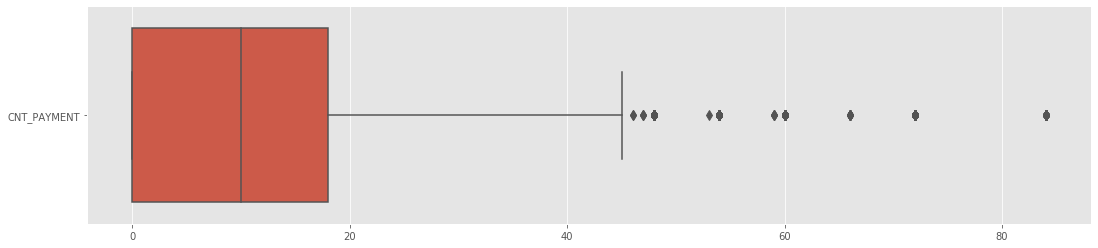

In [196]:
plt.figure(figsize = (18, 4))
sns.boxplot(data=prev_new[['CNT_PAYMENT']],fliersize=7, orient= 'h')
plt.show()

CNT_PAYMENT doesnt need outlier handling.

Now the outliers of the previous data is handled

# 5. Data Leakage Analysis

In [197]:
# % of Current Loan Application ID of app_new common in prev_new
print('Common % of SK_ID_CURR in 2 cleaned dataframes = ', round(app_new.SK_ID_CURR.isin(prev_new.SK_ID_CURR).sum() / app_new.shape[0],4)*100, '%')

Common % of SK_ID_CURR in 2 cleaned dataframes =  94.59 %


In [198]:
# % of Current Loan Application ID of app and prev datasets
print('Common % of SK_ID_CURR in 2 raw as received dataframes = ', round(app.SK_ID_CURR.isin(prev.SK_ID_CURR).sum() / app.shape[0],4)*100, '%')

Common % of SK_ID_CURR in 2 raw as received dataframes =  94.65 %


During data cleanup, some rows were dropped. We see that the resulting data leakage when comparing the common rows in the two provided datasets before and after cleanup is negligible. This means that act of dropping rows is not going to skew the balance of 2 provided datasets.

In [199]:
# % of rows dropped
print('% of Rows dropped during applcations dataset cleaning & handling = ', round((app.shape[0]-app_new.shape[0])/ app.shape[0],6)*100, '%')

% of Rows dropped during applcations dataset cleaning & handling =  0.0029 %


In [200]:
# % of Current Loan Application ID of app_new common in prev_new
print('% of Rows dropped during previous application dataset cleaning & handling = ', round((prev.shape[0]-prev_new.shape[0])/ prev.shape[0],6)*100, '%')

% of Rows dropped during previous application dataset cleaning & handling =  2.2414 %


% of rows dropped is very low for applications database and it is also low at about 2.2% for previous applications. If need be the original dataframes are fully retained and can be looked into at any stage.

In [201]:
prev_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632778 entries, 0 to 1670213
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   SK_ID_CURR                 1632778 non-null  int64   
 1   SK_ID_PREV                 1632778 non-null  int64   
 2   NAME_CONTRACT_TYPE         1632778 non-null  object  
 3   AMT_ANNUITY                1632778 non-null  float64 
 4   AMT_APPLICATION            1632778 non-null  float64 
 5   AMT_CREDIT                 1632778 non-null  float64 
 6   AMT_GOODS_PRICE            1632778 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE     1632778 non-null  object  
 8   NAME_CONTRACT_STATUS       1632778 non-null  object  
 9   DAYS_DECISION              1632778 non-null  int32   
 10  NAME_PAYMENT_TYPE          1632778 non-null  object  
 11  CODE_REJECT_REASON         1632778 non-null  object  
 12  NAME_TYPE_SUITE            1632778 non-null  object  
 1

Looking at the previous application data, there is no single aggregation that will work on all the columns. For example:
- Maybe we do sum aggregation or average aggregation on AMT_ columns
- Maybe a MAX aggregation is better for DAYS_ columnss
- How will we aggregate on columns with object or string ?
- How does it affect category columns ?
- One size does not fit all !

Outcome: Do not merge the two dataframes. Analyse them seperately for now. If needed at the end of data analysis phase, a few columns will make sense to merge, for those we will have a clear aggregation method. 

# 6. Selection of Columns for Data Analysis

In [202]:
app_new.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_S

In [203]:
# Out of all the variables lets select those variables which could help us in further Data Analysis
app_new_col_selection = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMAIL',
       'FLAG_CONT_MOBILE','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_CATEGORY', 'AMT_CREDIT_RANGE',
       'AMT_ANNUITY_RANGE', 'AMT_GOODS_PRICE_RANGE']
print (len(app_new_col_selection))

49


Applications Dataframe: Only the above columns are selected for further analysis, if need be the non-selected columns can be used because they are not dropped. <br>
Previous Applications Dataframe: All the columns in previous applications dataframe are retained because most were dropped during data handling stage.

In [204]:
app_new_select = app_new[app_new_col_selection].copy(deep=True)

## End of Data Handling Phase for Credit EDA CASE Study

# 7. Data Analysis for Credit EDA Case Study

In [205]:
# Print Shape of the dataframes at the start of data analysis !

print ('Shape of Appplications Dataframe Selected for Data Analysis: ', app_new_select.shape)
print ('Shape of Previous Applications Dataframe Selected for Data Analysis: ', prev_new.shape)

Shape of Appplications Dataframe Selected for Data Analysis:  (307502, 49)
Shape of Previous Applications Dataframe Selected for Data Analysis:  (1632778, 30)


In [206]:
app_new_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307502 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307502 non-null  int64   
 1   TARGET                       307502 non-null  int64   
 2   NAME_CONTRACT_TYPE           307502 non-null  object  
 3   CODE_GENDER                  307502 non-null  object  
 4   FLAG_OWN_CAR                 307502 non-null  object  
 5   FLAG_OWN_REALTY              307502 non-null  object  
 6   CNT_CHILDREN                 307502 non-null  int64   
 7   AMT_INCOME_TOTAL             307502 non-null  float64 
 8   AMT_CREDIT                   307502 non-null  float64 
 9   AMT_ANNUITY                  307502 non-null  float64 
 10  AMT_GOODS_PRICE              307502 non-null  float64 
 11  NAME_TYPE_SUITE              307502 non-null  object  
 12  NAME_INCOME_TYPE             307502 non-null

In [207]:
prev_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632778 entries, 0 to 1670213
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   SK_ID_CURR                 1632778 non-null  int64   
 1   SK_ID_PREV                 1632778 non-null  int64   
 2   NAME_CONTRACT_TYPE         1632778 non-null  object  
 3   AMT_ANNUITY                1632778 non-null  float64 
 4   AMT_APPLICATION            1632778 non-null  float64 
 5   AMT_CREDIT                 1632778 non-null  float64 
 6   AMT_GOODS_PRICE            1632778 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE     1632778 non-null  object  
 8   NAME_CONTRACT_STATUS       1632778 non-null  object  
 9   DAYS_DECISION              1632778 non-null  int32   
 10  NAME_PAYMENT_TYPE          1632778 non-null  object  
 11  CODE_REJECT_REASON         1632778 non-null  object  
 12  NAME_TYPE_SUITE            1632778 non-null  object  
 1

# 8. Data Analysis for Applications Dataframe

## 8.1 Data Imbalance Study

In [208]:
app_new_select['TARGET'].value_counts(normalize = True)

0    0.919269
1    0.080731
Name: TARGET, dtype: float64

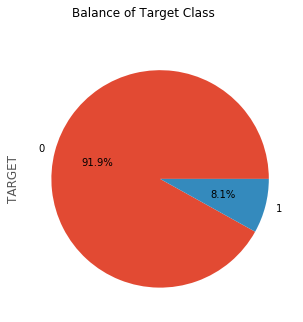

In [209]:
fig = plt.figure(figsize = (18,5))
fig.suptitle('Balance of Target Class')
app_new_select['TARGET'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.show()

* **Target = 1 indicates clients with payment difficulties. Only 8.1% of the data we have is for client with Target-1** <br>
* **Target = 0 indicates all other cases. 91.9% of the data we have is for Target-0, that is for clients in all other cases.**
* **This shows there is a high data imbalance with more data available in favor of Target = 0 (all other cases).**

## 8.2 Split Dataframe based on Target Variable

In [210]:
# Split the dataframe into Target-1 and Target-2
app_new_1 = app_new_select.loc[app_new_select['TARGET'] == 1]
app_new_0 = app_new_select.loc[app_new_select['TARGET'] == 0]
print ('Shape Target-1 (Clients with payment difficulties): ', app_new_1.shape)
print ('Shape Target-0 (Clients in all other cases):        ', app_new_0.shape)

Shape Target-1 (Clients with payment difficulties):  (24825, 49)
Shape Target-0 (Clients in all other cases):         (282677, 49)


## 8.3 Univariate Analysis - Categorical Unordered Columns

In [211]:
app_new_1.select_dtypes(include=['object','category']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE', 'AMT_INCOME_CATEGORY',
       'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'AMT_GOODS_PRICE_RANGE'],
      dtype='object')

In [212]:
unord_list = list(app_new_1.select_dtypes(include=['object','category']).columns)
ord_list = ['FLAG_OWN_CAR',
            'FLAG_OWN_REALTY',
            'NAME_EDUCATION_TYPE',
            'AMT_INCOME_CATEGORY',
            'AMT_CREDIT_RANGE',
            'AMT_ANNUITY_RANGE',
            'AMT_GOODS_PRICE_RANGE']
for elem in ord_list:
    unord_list.remove(elem)
print(unord_list)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']


In [213]:
 unord_list_description = ['Loan Contract Type',
                         'Percentage Male / Female',
                         'Based on who accompanied the Applicant while making loan application',
                         'Source of Applicant income',
                         'Marital Status',
                         'Based on current housing status of the client',
                         'Occupation of the Loan Applicant',
                         'Type of Business Activity',
                          'Emergency Mode - Normalized Information']

* **Categorical unordered variables are clean. Plots can be created even in a for loop. For better readablity we will do it seperately but using custom function** <br>

In [214]:
# Since there will be lot of barcharts to create, here is a function to handle this effectively

def Cat_Subplot (item, g_title):
    font1 = 22
    font2 = 18
    font3 = 16
    plot_1 = app_new_1[item].value_counts(normalize = True)*100
    plot_0 = app_new_0[item].value_counts(normalize = True)*100

    plt.style.use('seaborn-whitegrid')
    %matplotlib inline

    fig = plt.figure(figsize = (18,8))
    fig.suptitle(g_title, fontsize=font1)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

    plt.subplot(ax1)
    sns.barplot(x=plot_0.index, y=plot_0.values, palette='tab10')
    plt.title('Target-0 (All Other Cases)', fontsize=font2)
    plt.xlabel(item, fontsize=font3)
    plt.ylabel('Percentage', fontsize=font3)
    plt.xticks(rotation=90, fontsize=font3)
    plt.yticks(fontsize=font3)

    plt.subplot(ax2)
    sns.barplot(x=plot_1.index, y=plot_1.values, palette='tab10')
    plt.title('Target-1 (Client w Payment Difficulties)', fontsize=font2)
    plt.xlabel(item, fontsize=font3)
    plt.ylabel('Percentage', fontsize=font3)
    plt.xticks(rotation=90, fontsize=font3)
    plt.yticks(fontsize=font3)

    plt.show()
    return

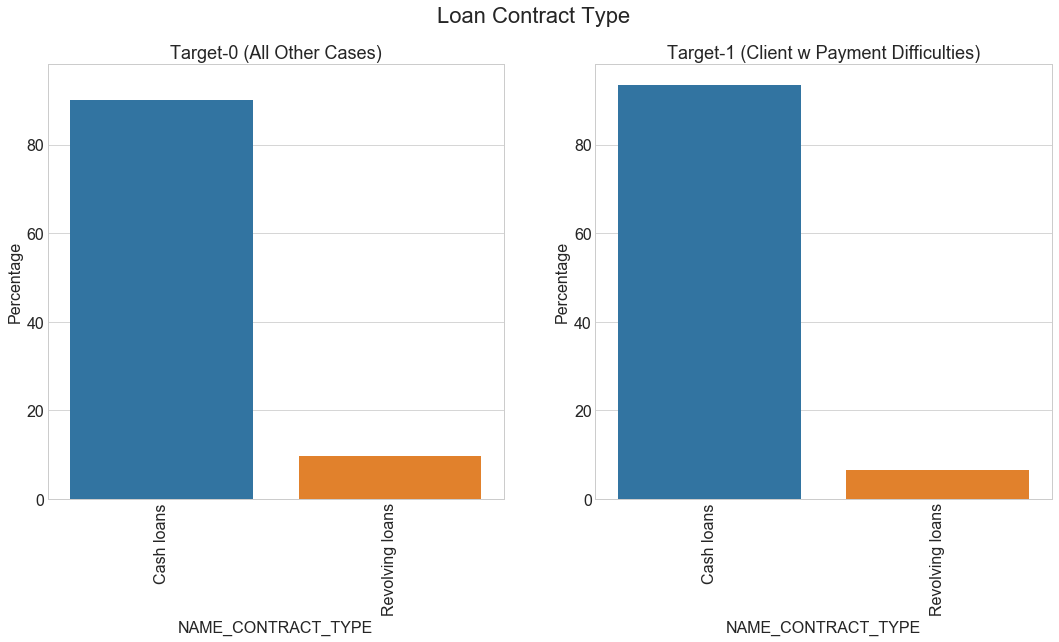

In [215]:
parInp = 0
Cat_Subplot(unord_list[parInp],unord_list_description[parInp])

`NAME_CONTRACT_TYPE:` <br>
* **`Observation-1:` Cash loans are clearly more popular than the Revolving Loans in both the Target values.** <br> 
* **`Observation-2:` Cash loans % are only slightly higher for Target-1 when compared to Target-0.** <br>
* **`Observation-3:` Loan contract type does not seem to influence the client's payment difficulty.** <br>

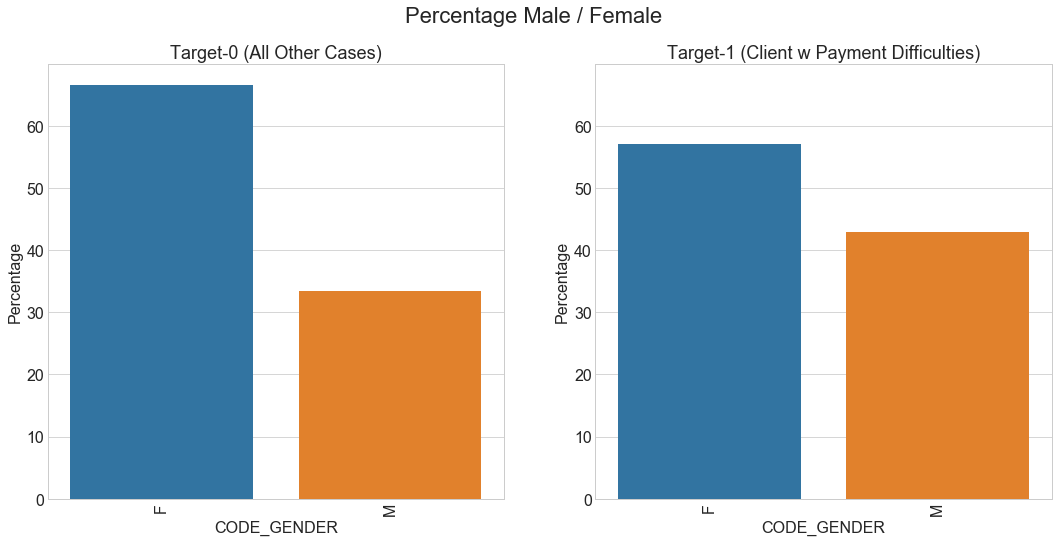

In [216]:
parInp = 1
Cat_Subplot(unord_list[parInp],unord_list_description[parInp])

`CODE_GENDER:` <br>
* **`Observation-1:` More female applicants than male in both the target values.** <br> 
* **`Observation-2:` <font color='red'>Male % is higher for Target-1 when compared to Target-0.** <br>
* **`Observation-3:` <font color='green'>Female % lowers from Target-0 to Target-1.** 

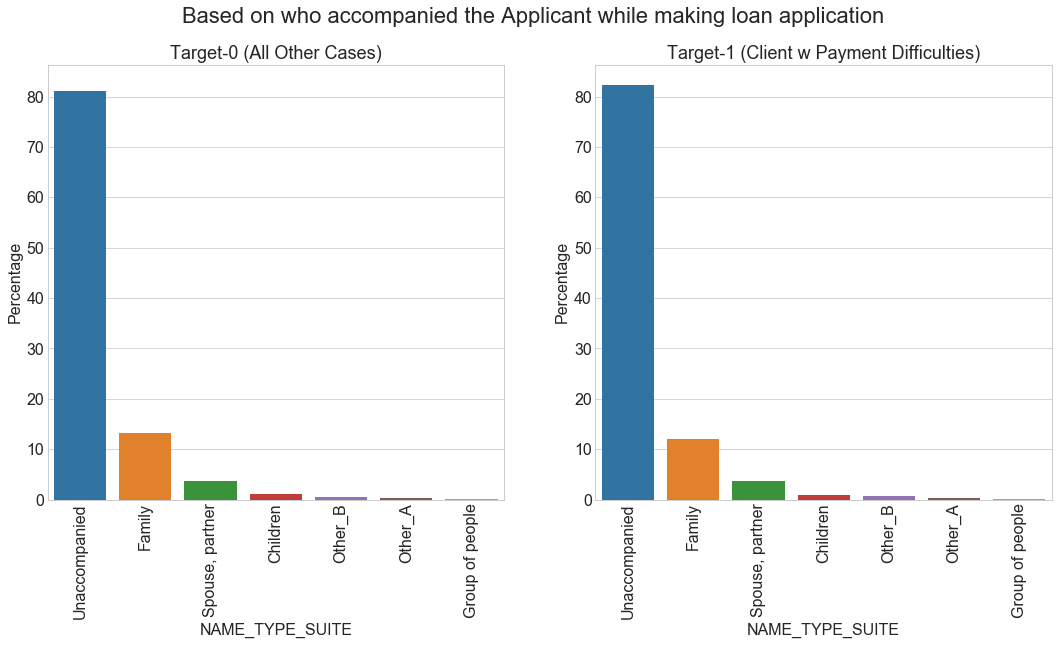

In [217]:
parInp = 2
Cat_Subplot(unord_list[parInp],unord_list_description[parInp])

In [218]:
print (app_new_0['NAME_TYPE_SUITE'].value_counts(normalize = True)*100)

Unaccompanied      81.154463
Family             13.137609
Spouse, partner     3.705643
Children            1.070480
Other_B             0.564602
Other_A             0.279471
Group of people     0.087733
Name: NAME_TYPE_SUITE, dtype: float64


In [219]:
print (app_new_1['NAME_TYPE_SUITE'].value_counts(normalize = True)*100)

Unaccompanied      82.203424
Family             12.120846
Spouse, partner     3.605237
Children            0.970796
Other_B             0.700906
Other_A             0.306143
Group of people     0.092649
Name: NAME_TYPE_SUITE, dtype: float64


`NAME_TYPE_SUITE:` <br>
* **`Observation-1:` Most of the loan applicants are unaccompanied when they apply for loan.** <br> 
* **`Observation-2:` No perceivable change in % from target-0 to target 1 w.r.t this parameter.** <br>

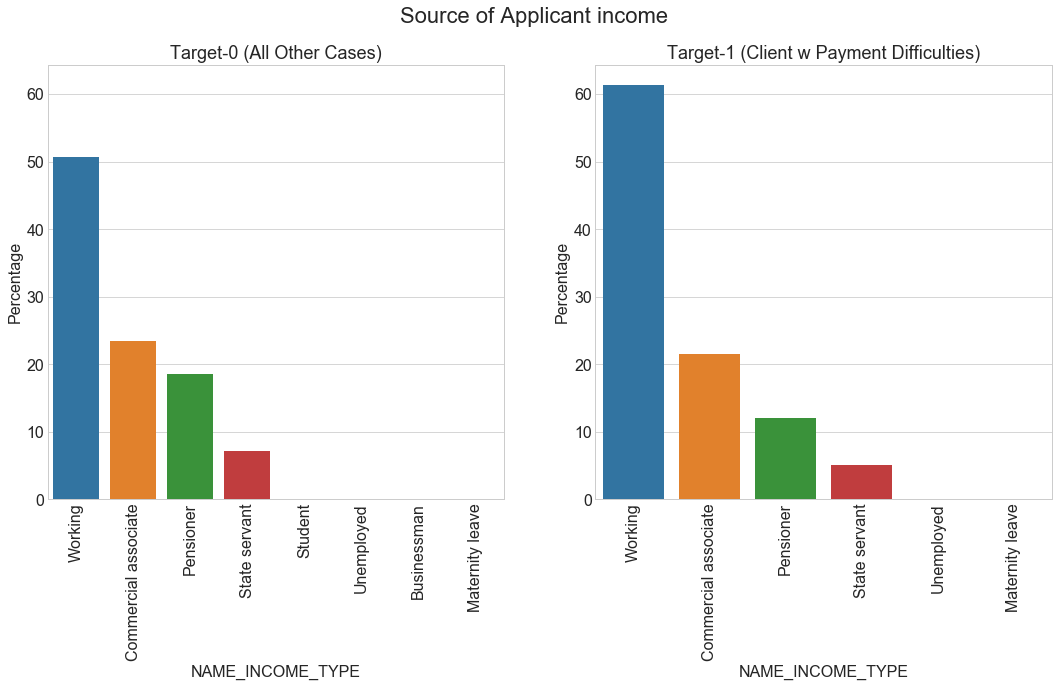

In [220]:
parInp = 3
Cat_Subplot(unord_list[parInp],unord_list_description[parInp])

In [221]:
print (app_new_0['NAME_INCOME_TYPE'].value_counts(normalize = True)*100)

Working                 50.780573
Commercial associate    23.438058
Pensioner               18.529983
State servant            7.235467
Student                  0.006368
Unemployed               0.004953
Businessman              0.003538
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64


In [222]:
print (app_new_1['NAME_INCOME_TYPE'].value_counts(normalize = True)*100)

Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64


`NAME_INCOME_TYPE:` <br>
* **`Observation-1:` Working people more likely to make loan application.** <br> 
* **`Observation-2:` <font color='red'>Increase in % of working people who are ending up with payment difficulties.** <br>
* **`Observation-3:` <font color='green'>Decrease in % people who are pensioners and state servant who end up with payment difficulties.** <br>

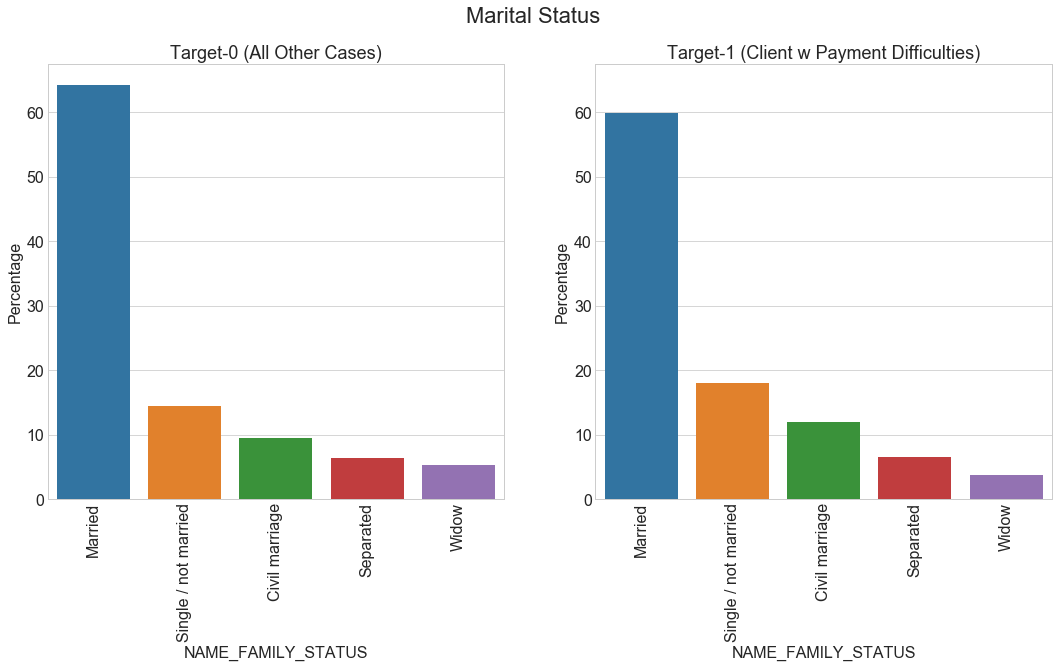

In [223]:
parInp = 4
Cat_Subplot(unord_list[parInp],unord_list_description[parInp])

In [224]:
print (app_new_0['NAME_FAMILY_STATUS'].value_counts(normalize = True)*100)

Married                 64.234798
Single / not married    14.499234
Civil marriage           9.485384
Separated                6.420756
Widow                    5.359828
Name: NAME_FAMILY_STATUS, dtype: float64


In [225]:
print (app_new_1['NAME_FAMILY_STATUS'].value_counts(normalize = True)*100)

Married                 59.818731
Single / not married    17.953676
Civil marriage          11.927492
Separated                6.525680
Widow                    3.774421
Name: NAME_FAMILY_STATUS, dtype: float64


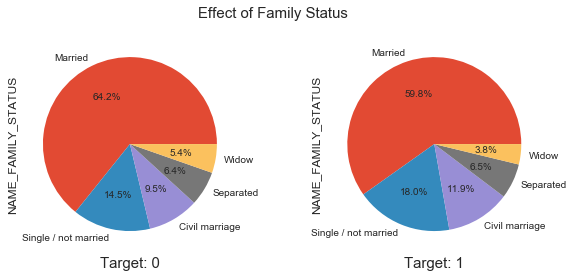

In [226]:
# Analysis of Family Status variable

fig = plt.figure(figsize = (10,4))
fig.suptitle('Effect of Family Status',size=15)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plt.subplot(ax1)
plt.xlabel('Target: 0',size=15)
app_new_0['NAME_FAMILY_STATUS'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%')

plt.subplot(ax2)
plt.xlabel('Target: 1',size=15)
app_new_1['NAME_FAMILY_STATUS'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.show()

`NAME_FAMILY_STATUS:` <br>
* **`Observation-1:` Married people are more likely to make loan application.** <br> 
* **`Observation-2:` <font color='red'>Increase in % of people who are single and are ending up with payment difficulties.** <br>
* **`Observation-3:` <font color='green'>Decrease in % of people who are widow and who end up with payment difficulties.** <br>

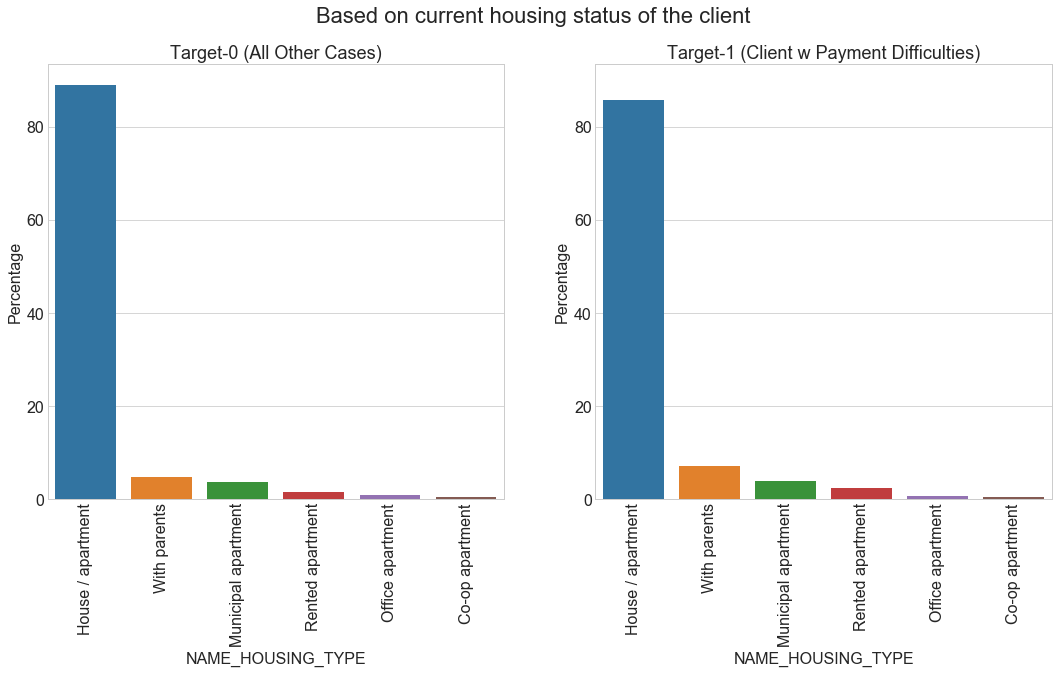

In [227]:
parInp = 5
Cat_Subplot(unord_list[parInp],unord_list_description[parInp])

In [228]:
print (app_new_0['NAME_HOUSING_TYPE'].value_counts(normalize = True)*100)

House / apartment      89.002289
With parents            4.635680
Municipal apartment     3.617556
Rented apartment        1.514096
Office apartment        0.864945
Co-op apartment         0.365435
Name: NAME_HOUSING_TYPE, dtype: float64


In [229]:
print (app_new_1['NAME_HOUSING_TYPE'].value_counts(normalize = True)*100)

House / apartment      85.687815
With parents            6.992951
Municipal apartment     3.846928
Rented apartment        2.420947
Office apartment        0.692850
Co-op apartment         0.358510
Name: NAME_HOUSING_TYPE, dtype: float64


`NAME_HOUSING_TYPE:` <br>
* **`Observation-1:` People who live in house / apartment seperate to their parents more likely to make loan application.** <br> 
* **`Observation-2:` Slight increase in % of people who are living with parents and are ending up with payment difficulties.** <br>

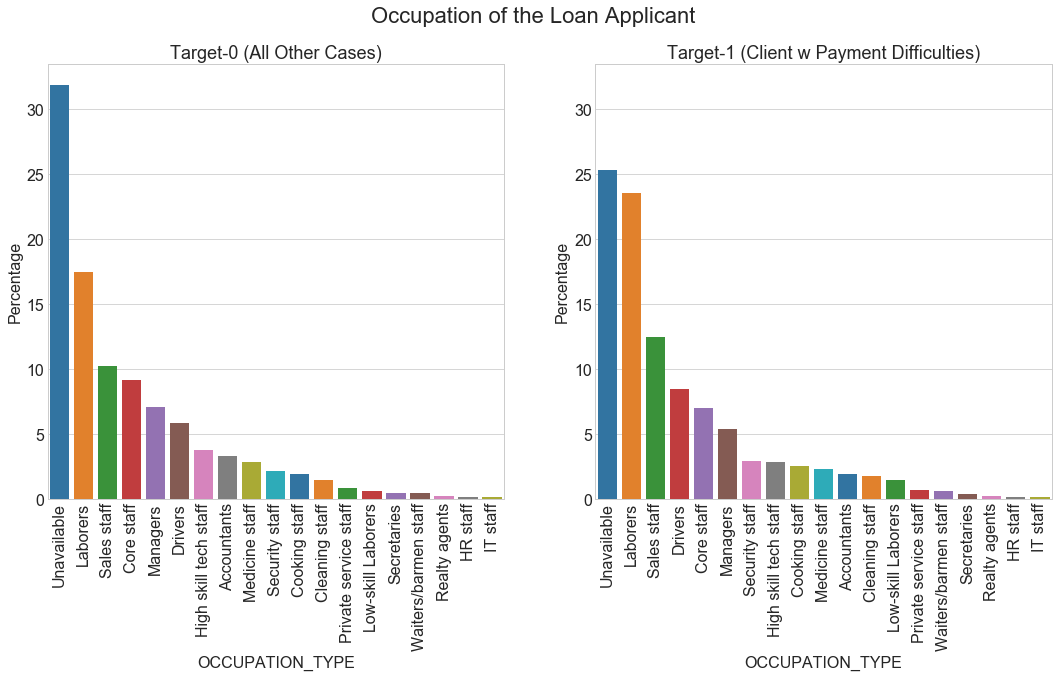

In [230]:
parInp = 6
Cat_Subplot(unord_list[parInp],unord_list_description[parInp])

In [231]:
print (app_new_0['OCCUPATION_TYPE'].value_counts(normalize = True)*100)

Unavailable              31.877372
Laborers                 17.457027
Sales staff              10.262597
Core staff                9.137638
Managers                  7.090071
Drivers                   5.835636
High skill tech staff     3.777810
Accountants               3.303417
Medicine staff            2.817704
Security staff            2.122210
Cooking staff             1.883775
Cleaning staff            1.487917
Private service staff     0.876265
Low-skill Laborers        0.613067
Secretaries               0.429112
Waiters/barmen staff      0.423098
Realty agents             0.244802
HR staff                  0.186432
IT staff                  0.174050
Name: OCCUPATION_TYPE, dtype: float64


In [232]:
print (app_new_1['OCCUPATION_TYPE'].value_counts(normalize = True)*100)

Unavailable              25.289023
Laborers                 23.516616
Sales staff              12.455186
Drivers                   8.487412
Core staff                7.001007
Managers                  5.349446
Security staff            2.908359
High skill tech staff     2.823766
Cooking staff             2.501511
Medicine staff            2.304129
Accountants               1.909366
Cleaning staff            1.800604
Low-skill Laborers        1.446123
Private service staff     0.704935
Waiters/barmen staff      0.612286
Secretaries               0.370594
Realty agents             0.237664
HR staff                  0.145015
IT staff                  0.136959
Name: OCCUPATION_TYPE, dtype: float64


`OCCUPATION_TYPE:` <br>
* **`Observation-1:` Laborers and sales staff more likely to apply for loan when compared to realty agent, IT or HR folks.** <br> 
* **`Observation-2:` Slight increase in % of people who are working as laborers and are ending up with payment difficulties.** <br>

In [233]:
# Since there will be lot of barcharts to create, here is a function to handle this effectively

def Cat_Subplot_Vert0 (item, g_title):
    plot_0 = app_new_0[item].value_counts(normalize = True)*100
    font1 = 22
    font2 = 18
    font3 = 16
    plt.style.use('seaborn-whitegrid')
    %matplotlib inline
    fig = plt.figure(figsize = (18,8))
    fig.suptitle(g_title, fontsize=font1)
    sns.barplot(x=plot_0.index, y=plot_0.values, palette='tab10')
    plt.title('Target-0 (All Other Cases)', fontsize=font2)
    plt.xlabel(item, fontsize=font3)
    plt.ylabel('Percentage', fontsize=font3)
    plt.xticks(rotation=90, fontsize=font3)
    plt.yticks(fontsize=font3)
    plt.show()
    return

In [234]:
# Since there will be lot of barcharts to create, here is a function to handle this effectively

def Cat_Subplot_Vert1 (item, g_title):
    plot_1 = app_new_1[item].value_counts(normalize = True)*100
    font1 = 22
    font2 = 18
    font3 = 16
    plt.style.use('seaborn-whitegrid')
    %matplotlib inline
    fig = plt.figure(figsize = (18,8))
    fig.suptitle(g_title, fontsize=font1)
    sns.barplot(x=plot_1.index, y=plot_1.values, palette='tab10')
    plt.title('Target-1 (All Other Cases)', fontsize=font2)
    plt.xlabel(item, fontsize=font3)
    plt.ylabel('Percentage', fontsize=font3)
    plt.xticks(rotation=90, fontsize=font3)
    plt.yticks(fontsize=font3)
    plt.show()
    return

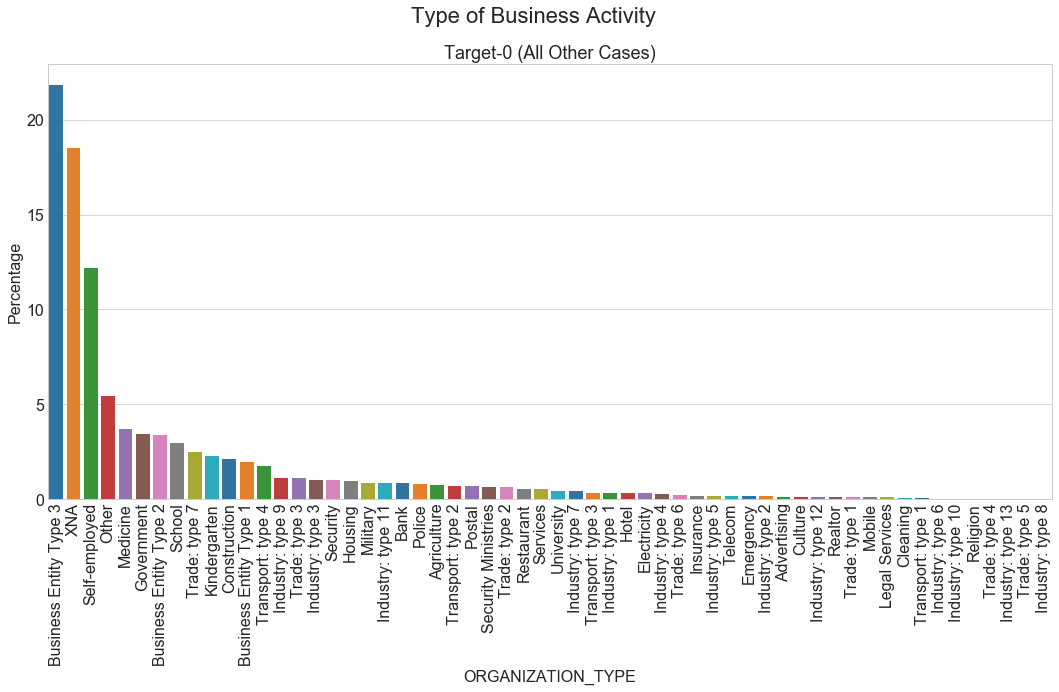

In [235]:
parInp =7
Cat_Subplot_Vert0(unord_list[parInp],unord_list_description[parInp])

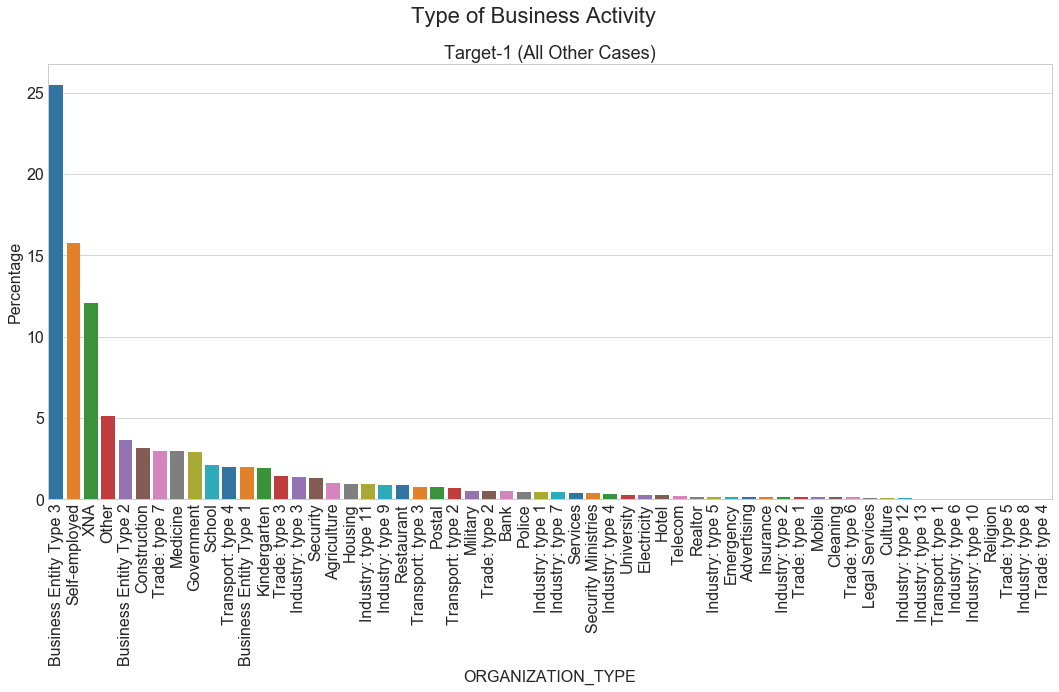

In [236]:
Cat_Subplot_Vert1(unord_list[parInp],unord_list_description[parInp])

`ORGANITATION_TYPE:` <br>
* **`Observation-1:` Business Entity Type 3 and Self Employed more likely to make loan application.** <br> 
* **`Observation-2:` No big variation in target variable.** <br>

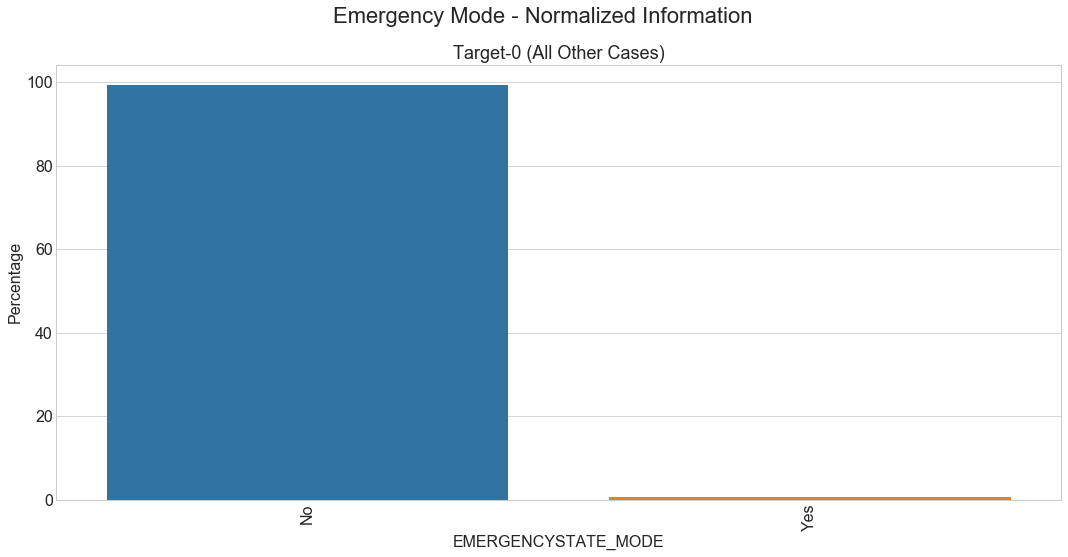

In [237]:
parInp =8
Cat_Subplot_Vert0(unord_list[parInp],unord_list_description[parInp])

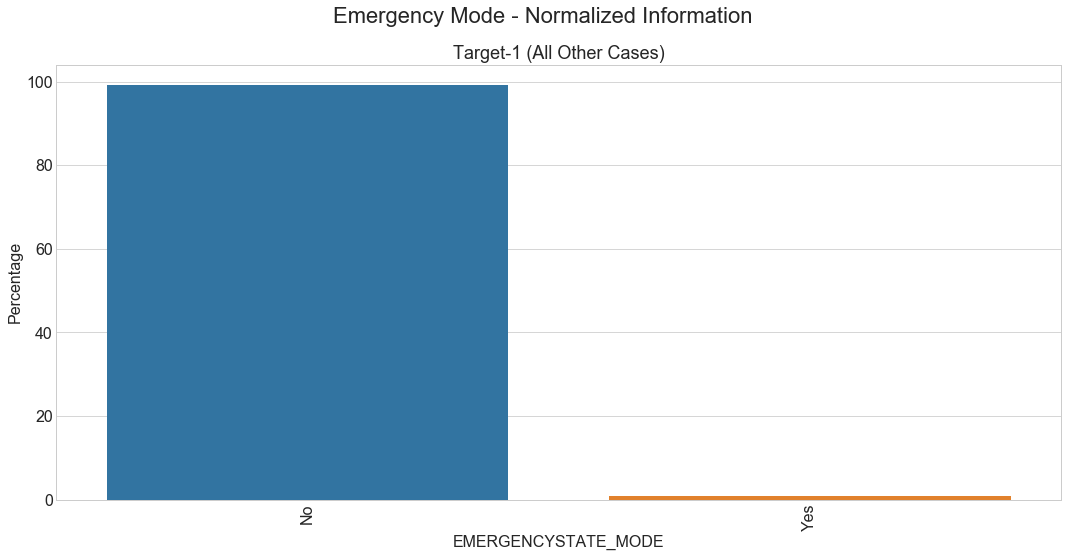

In [238]:
Cat_Subplot_Vert1(unord_list[parInp],unord_list_description[parInp])

`ORGANITATION_TYPE:` <br>
* **`Observation-1:` Emergency Mode is highly skewed normalized information where class 'No' is making most of the applications however we have no information how this will affect the decision of customer defaulting** <br> 
* **`Observation-2:` No big variation in target variable.** <br>

## 8.4 Univariate Analysis - Categorical Ordered Columns

In [239]:
print (ord_list)

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'AMT_INCOME_CATEGORY', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'AMT_GOODS_PRICE_RANGE']


In [240]:
ord_list_description = ['Does the Applicant Own Car',
                         'Does the Applicant Own Real Estate',
                         'Applicant Education Level',
                         'Category of Applicants Income Level',
                         'Category of Credit Amount',
                         'Category of Annuity Amount',
                         'Category of Goods Price']

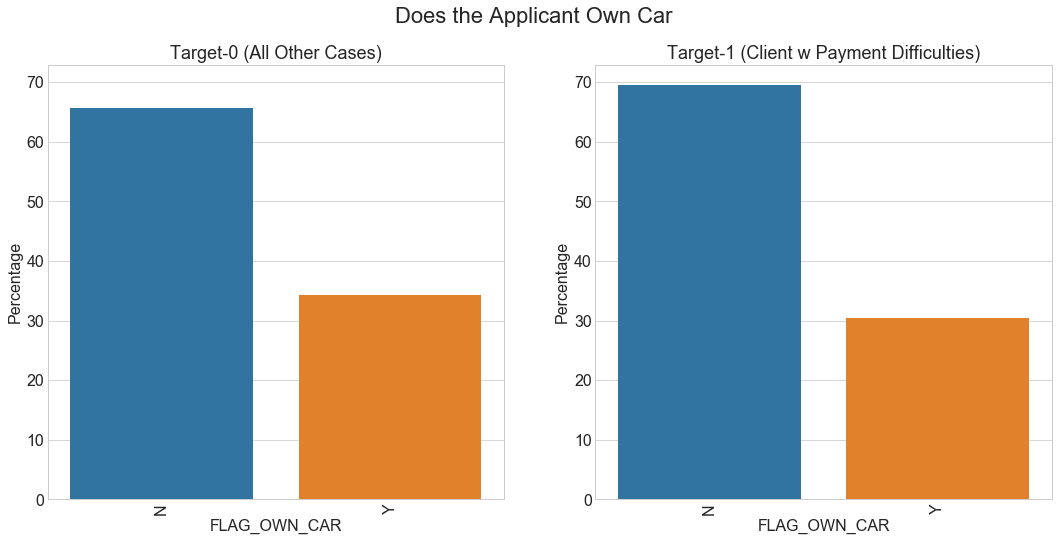

In [241]:
parInp = 0
Cat_Subplot(ord_list[parInp],ord_list_description[parInp])

`FLAG_OWN_CAR:` <br>
* **`Observation-1:` % of loan applicants who dont own a car is higher in both the target values.** <br> 
* **`Observation-2:` Applicants who dont own a car are slightly higher chance to run into payment difficulty.** <br>

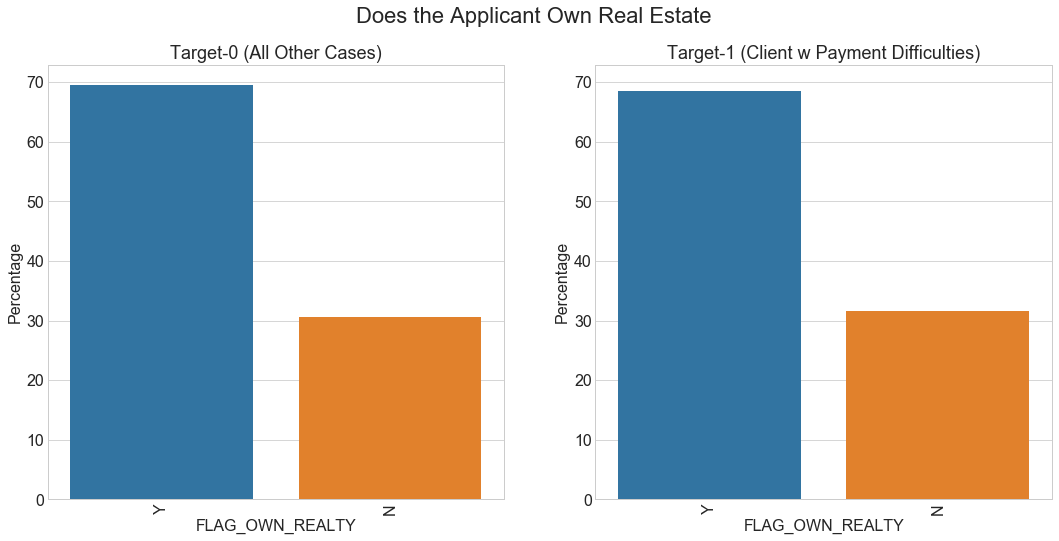

In [242]:
parInp = 1
Cat_Subplot(ord_list[parInp],ord_list_description[parInp])

`FLAG_OWN_REALTY:` <br>
* **`Observation-1:` % of loan applicants who own a real estate is higher in both the target values.** <br> 
* **`Observation-2:` No perceivable change in % from target-0 to target 1 w.r.t owning a real estate.** <br>

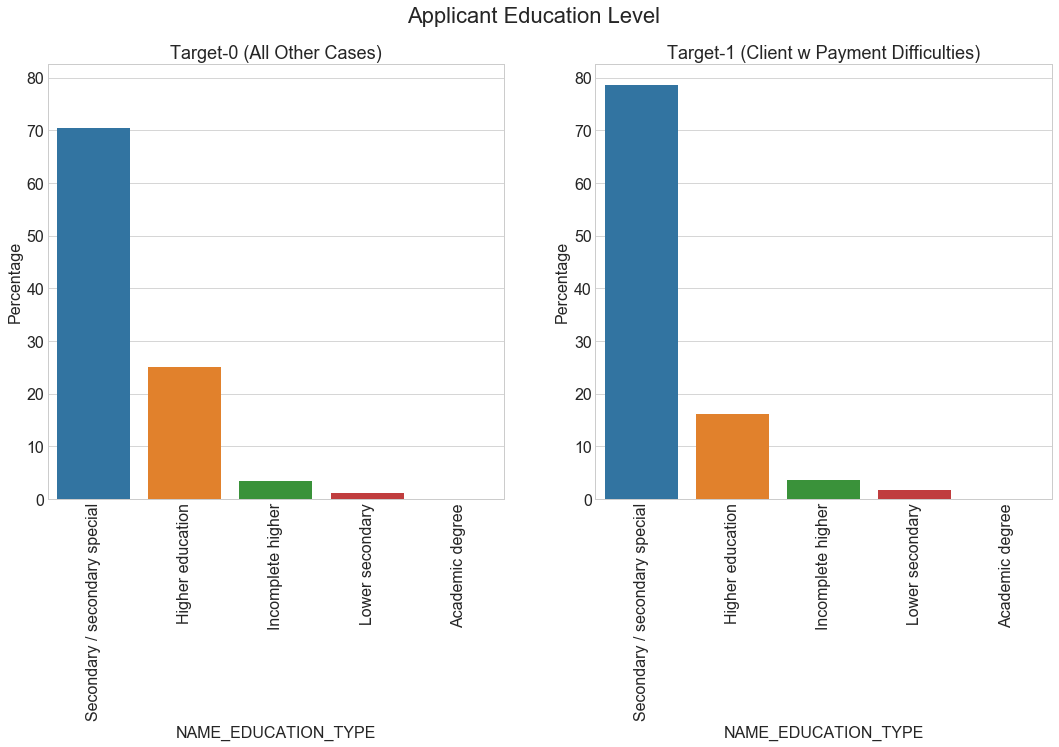

In [243]:
parInp = 2
Cat_Subplot(ord_list[parInp],ord_list_description[parInp])

In [244]:
print (app_new_0['NAME_EDUCATION_TYPE'].value_counts(normalize = True)*100)

Secondary / secondary special    70.350258
Higher education                 25.064296
Incomplete higher                 3.326411
Lower secondary                   1.202079
Academic degree                   0.056955
Name: NAME_EDUCATION_TYPE, dtype: float64


In [245]:
print (app_new_1['NAME_EDUCATION_TYPE'].value_counts(normalize = True)*100)

Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64


`NAME_EDUCATION_TYPE:` <br>
* **`Observation-1:` People with secondary education more likely to make loan application.** <br> 
* **`Observation-2:` <font color='red'>Increase in % of people with secondary education who are ending up with payment difficulties.** <br>
* **`Observation-3:` <font color='green'>Decrease in % of people with higher education who end up with payment difficulties.** <br>

In [246]:
# Since there will be lot of countplots to create, here is a function to handle this effectively

def Cat_Subplot_2 (item, g_title,order_bins):

    plt.style.use('seaborn-darkgrid')
    %matplotlib inline
    font1 = 22
    font2 = 18
    font3 = 16
    fig = plt.figure(figsize = (18,8))
    fig.suptitle(g_title, fontsize=font1)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    plt.subplot(ax1)
    sns.countplot(data=app_new_0, x=item, palette='muted',order=order_bins)
    plt.title('Target-0 (All Other Cases)', fontsize=font2)
    plt.xlabel(item, fontsize=font3)
    plt.ylabel('Count', fontsize=font3)
    plt.xticks(rotation=90, fontsize=font3)
    plt.yticks(fontsize=font3)

    plt.subplot(ax2)
    sns.countplot(data=app_new_1, x=item, palette='muted',order=order_bins)
    plt.title('Target-1 (Client w Payment Difficulties)', fontsize=font2)
    plt.xlabel(item, fontsize=font3)
    plt.ylabel('Count', fontsize=font3)
    plt.xticks(rotation=90, fontsize=font3)
    plt.yticks(fontsize=font3)

    plt.show()
    return

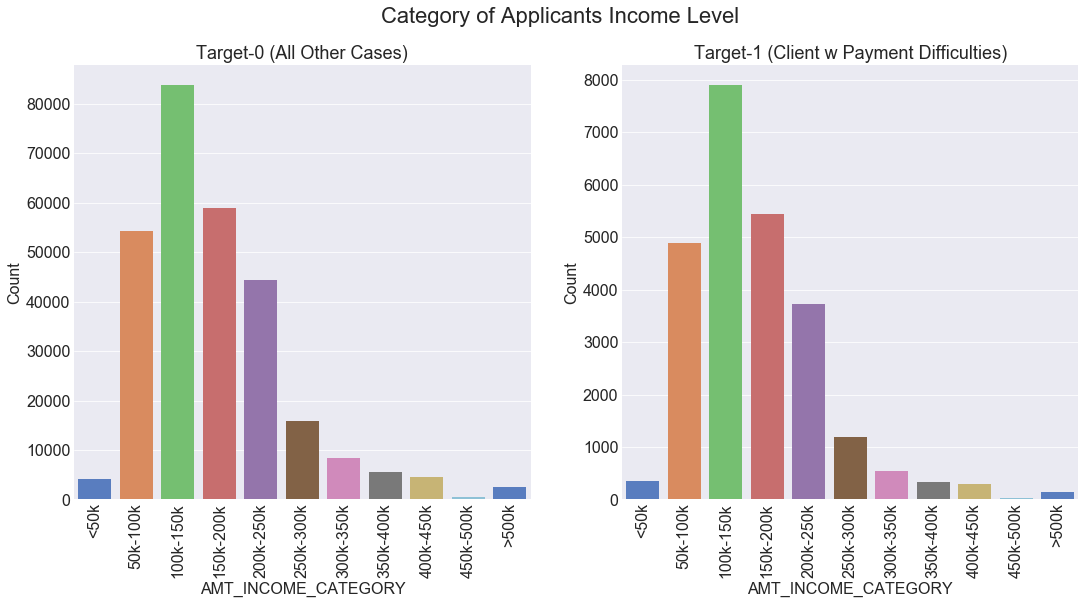

In [247]:
parInp = 3
order_bins = ['<50k','50k-100k','100k-150k', '150k-200k','200k-250k','250k-300k','300k-350k','350k-400k','400k-450k','450k-500k','>500k']
Cat_Subplot_2(ord_list[parInp],ord_list_description[parInp],order_bins)

`AMT_INCOME_CATEGORY:` <br>
* **`Observation-1:` People with income 100k to 150k are more likely to make a loan applcation. Most of the loan applicants are in th category 50k to 250k income range. Below 50k and higher than 250k are less likely to apply for loan.** <br> 
* **`Observation-2:` Similar pattern in income category and Target variable. Therefore no specific category is more or less likely to end up with payment difficulties.** <br>

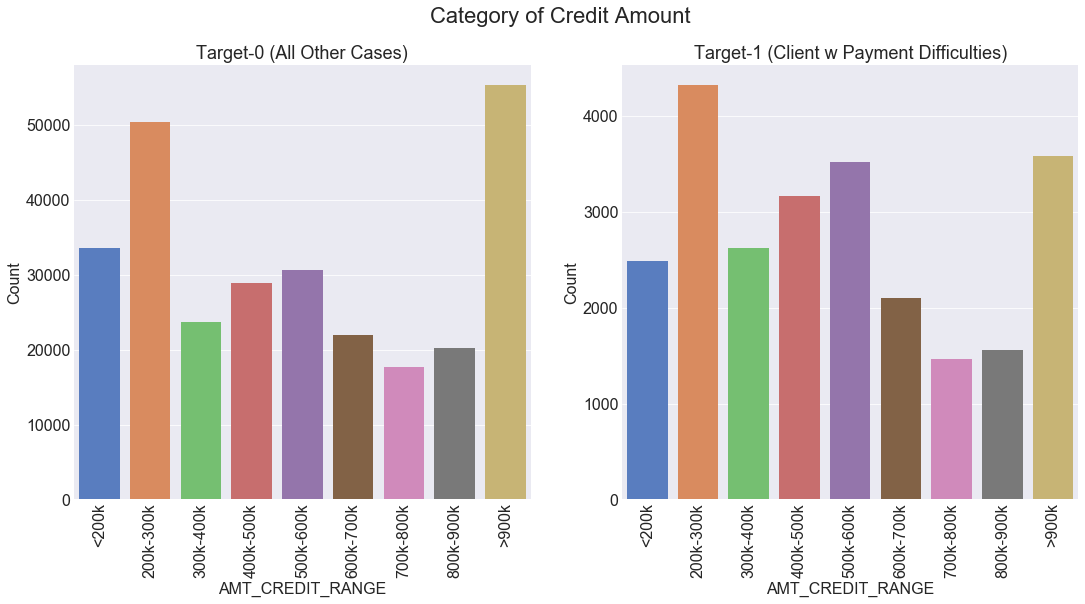

In [248]:
parInp = 4
order_bins = ['<200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','>900k']
Cat_Subplot_2(ord_list[parInp],ord_list_description[parInp],order_bins)

In [249]:
# Ratio of client with payment difficulties & total no. of applicants in AMT_CREDIT_RANGE

print (app_new_1['AMT_CREDIT_RANGE'].value_counts(normalize = False)/app_new_select['AMT_CREDIT_RANGE'].value_counts(normalize = False)) 

<200k        0.068893
200k-300k    0.078836
300k-400k    0.099594
400k-500k    0.098979
500k-600k    0.102921
600k-700k    0.087201
700k-800k    0.076382
800k-900k    0.071356
>900k        0.060752
Name: AMT_CREDIT_RANGE, dtype: float64


`AMT_CREDIT_RANGE:` <br>
* **`Observation-1:` Lot of loan applications in the credit amount range of 200k to 300k & also in category greater than 900k.** <br> 
* **`Observation-2:` <font color='red'>Credit amount in the range of 500k-600k range is seeing highest payment difficulties. More scrutiny needed in this category and also in 300k to 500k as well.** <br>

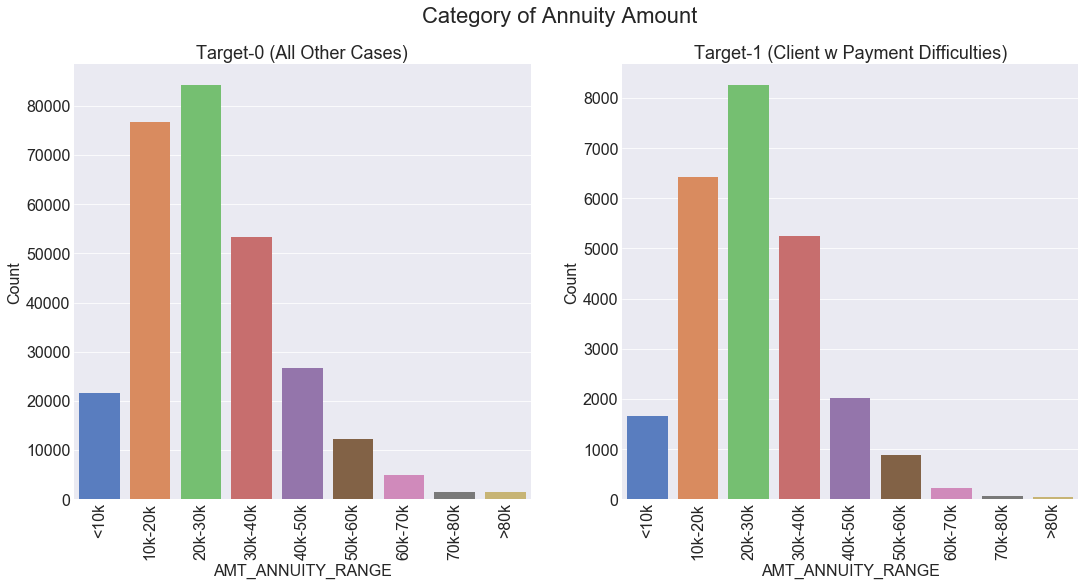

In [250]:
parInp = 5
order_bins = ['<10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','>80k']
Cat_Subplot_2(ord_list[parInp],ord_list_description[parInp],order_bins)

`AMT_ANNUITY_RANGE:` <br>
* **`Observation-1:` People with annuity in the range of 10k to 40k are more likely to make a loan applcation.** <br> 
* **`Observation-2:` Similar pattern in annuity range category, regardless of the target variable. Therefore no specific category is more or less likely to end up with payment difficulties.** <br>

Lets analyse two more ordered categorical items to check the impact if Client providing Email and whether reachability of clients phone has any bearing on deciding who will default

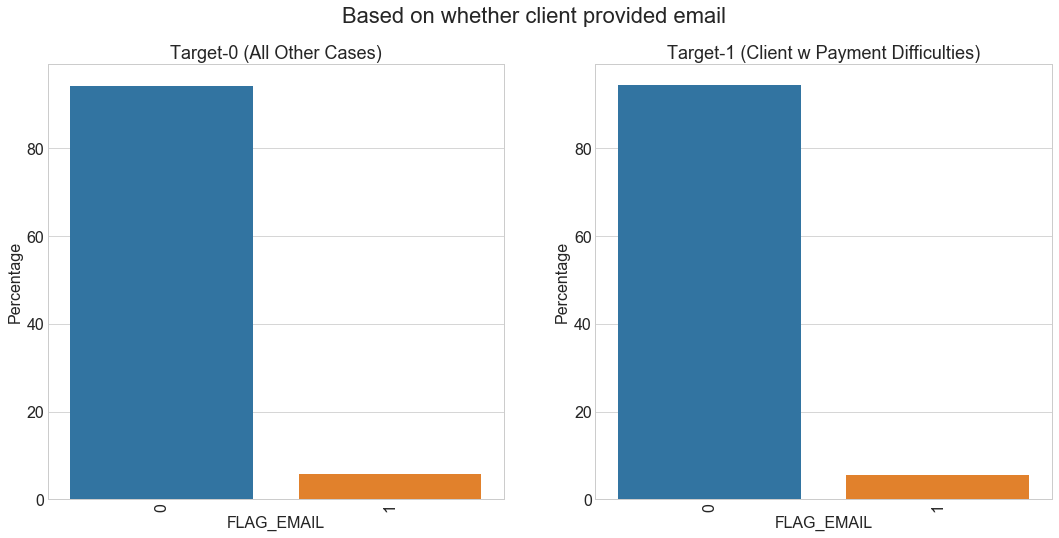

In [251]:
Cat_Subplot('FLAG_EMAIL','Based on whether client provided email')

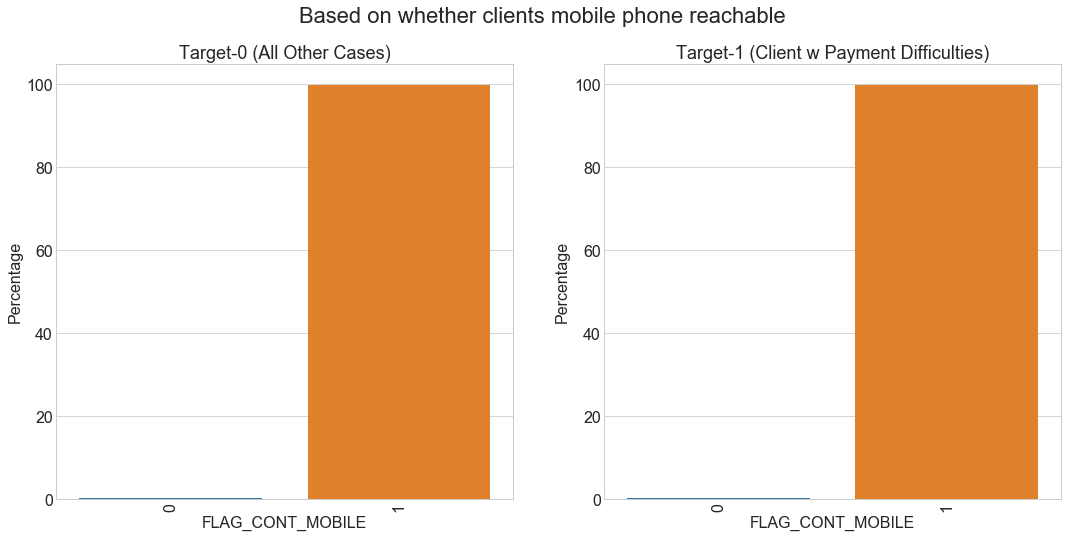

In [252]:
Cat_Subplot('FLAG_CONT_MOBILE','Based on whether clients mobile phone reachable')

`AMT_ANNUITY_RANGE:` <br>
* **`Observation-1:`  Significantly High number of people did not provide Email** <br>
* **`Observation-2:`  Mobile phones of significantly high number of applicants were reachable** <br>
* **`Observation-3:`  The trend for both of these variables are almost same for Target 0 and 1 there by failing to indicate any insights into who will default** <br>

Four more categorical univariate analysis are done next.

In [253]:
ord_list_2 = ['CNT_CHILDREN','AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
ord_list_description_2 = ['Based on number of children the applicant has',
                         'Based on Goods Price',
                         'Applicant Age in Years',
                         'Applicant Employment Duration in Years']

In [254]:
# Since there will be lot of distplots to create, here is a function to handle this effectively

def Cat_Subplot_3 (item, g_title,order_bins):

    plt.style.use('seaborn-darkgrid')
    %matplotlib inline
    font1 = 22
    font2 = 18
    font3 = 16
    fig = plt.figure(figsize = (18,8))
    fig.suptitle(g_title, fontsize=font1)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    plt.subplot(ax1)
    plt.hist(app_new_0[item], bins=order_bins,edgecolor='black')
    plt.title('Target-0 (All Other Cases)', fontsize=font2)
    plt.xlabel(item, fontsize=font3)
    plt.ylabel('Count', fontsize=font3)
    plt.xticks(rotation=90, fontsize=font3)
    plt.yticks(fontsize=font3)

    plt.subplot(ax2)
    plt.hist(app_new_1[item], bins=order_bins,edgecolor='black')
    plt.title('Target-1 (Client w Payment Difficulties)', fontsize=font2)
    plt.xlabel(item, fontsize=font3)
    plt.ylabel('Count', fontsize=font3)
    plt.xticks(rotation=90, fontsize=font3)
    plt.yticks(fontsize=font3)

    plt.show()
    return

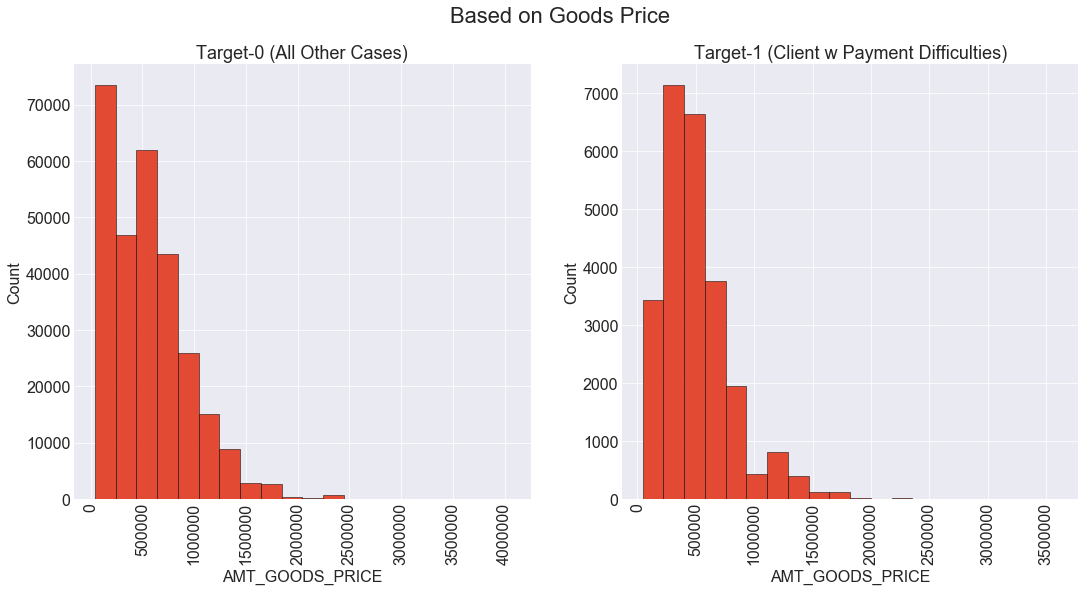

In [255]:
parInp = 1
Cat_Subplot_3(ord_list_2[parInp],ord_list_description_2[parInp],20)

`AMT_GOODS_PRICE:` <br>
* **`Observation-1:` <font color='red'>There is a peak in clients with payment difficulty (Target-1) in the goods price range of 500k. Since this is a continous parameter, it needs a closer look during bi-variate analysis.** <br> 

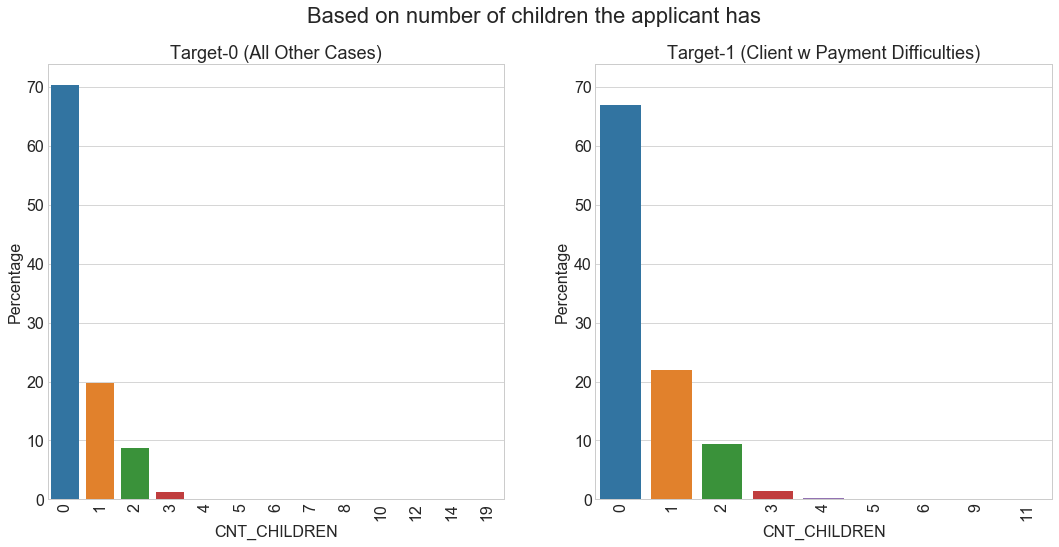

In [256]:
parInp = 0
Cat_Subplot(ord_list_2[parInp],ord_list_description_2[parInp])

`CNT_CHILDREN:` <br>
* **`Observation-1:` Most of the clients are in the range 0 to 1 child. No surprise.** <br> 

In [257]:
# Transform the DF to reflect age in years.
app_new_0['YEARS_BIRTH'] = app_new_0['DAYS_BIRTH'] / 365.0
app_new_1['YEARS_BIRTH'] = app_new_1['DAYS_BIRTH'] / 365.0

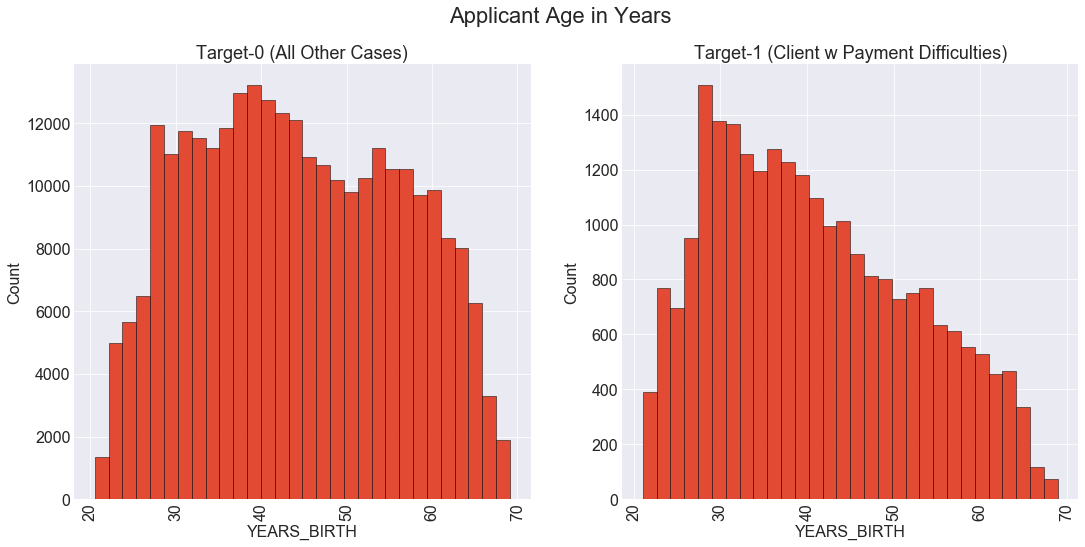

In [258]:
parInp = 2
Cat_Subplot_3('YEARS_BIRTH',ord_list_description_2[parInp],30)

`DAYS_BIRTH (TRANSFORMED TO YEARS_BIRTH):` <br>
* **`Observation-1:` <font color='red'>There is a peak in clients with payment difficulty (Target-1) in the age about 30 years. Since this is a continous parameter, it needs a closer look during bi-variate analysis.** <br> 

In [259]:
# Transform the DF to reflect employment duration in years.
app_new_0['YEARS_EMPLOYED'] = app_new_0['DAYS_EMPLOYED'] / 365.0
app_new_1['YEARS_EMPLOYED'] = app_new_1['DAYS_EMPLOYED'] / 365.0

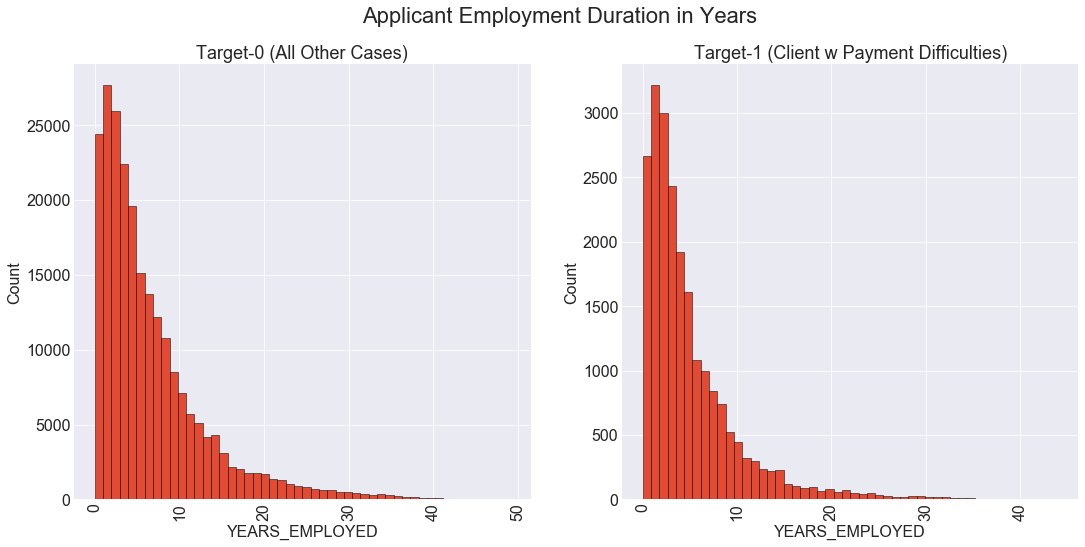

In [260]:
parInp = 3

item = 'YEARS_EMPLOYED'
g_title= ord_list_description_2[parInp]
order_bins = 50
font1 = 22
font2 = 18
font3 = 16
plt.style.use('seaborn-darkgrid')
%matplotlib inline

fig = plt.figure(figsize = (18,8))
fig.suptitle(g_title, fontsize=font1)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plt.subplot(ax1)
plt.hist(app_new_0[app_new_0[item] < 100][item], bins=order_bins,edgecolor='black')
plt.title('Target-0 (All Other Cases)', fontsize=font2)
plt.xlabel(item, fontsize=font3)
plt.ylabel('Count', fontsize=font3)
plt.xticks(rotation=90, fontsize=font3)
plt.yticks(fontsize=font3)

plt.subplot(ax2)
plt.hist(app_new_1[app_new_1[item] < 100][item], bins=order_bins,edgecolor='black')
plt.title('Target-1 (Client w Payment Difficulties)', fontsize=font2)
plt.xlabel(item, fontsize=font3)
plt.ylabel('Count', fontsize=font3)
plt.xticks(rotation=90, fontsize=font3)
plt.yticks(fontsize=font3)

plt.show()

`DAYS_EMPLOYED (TRANSFORMED TO YEARS_EMPLOYED):` <br>
* **`Observation-1:` Most of the applicants are working for less than 5 years at the time loan application.** <br> 

Lets analize some more Categorical columns

***REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY***

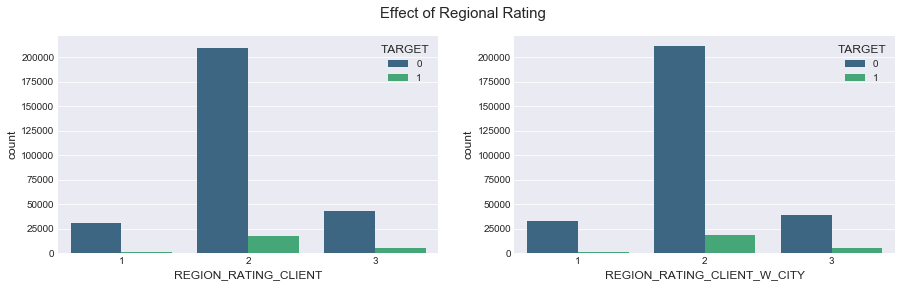

In [261]:
# Analysis of Regional Rating variables

fig = plt.figure(figsize = (15,4))
fig.suptitle('Effect of Regional Rating',size=15)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)

plt.subplot(ax1)
sns.countplot(data=app_new, x='REGION_RATING_CLIENT', palette='viridis',hue='TARGET')

plt.subplot(ax2)
sns.countplot(data=app_new, x='REGION_RATING_CLIENT_W_CITY', palette='viridis',hue='TARGET')
plt.show()

`REGION_RATING_CLIENT & REGION_RATING_CLIENT_W_CITY:` <br>
* **`Observation-1:` Region of most of the clients(with and without taking city into consideration) recieved rating of 2. However the distribution doesn't indicate anything related to defaulting on behalf of clients** <br> 

***OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE***

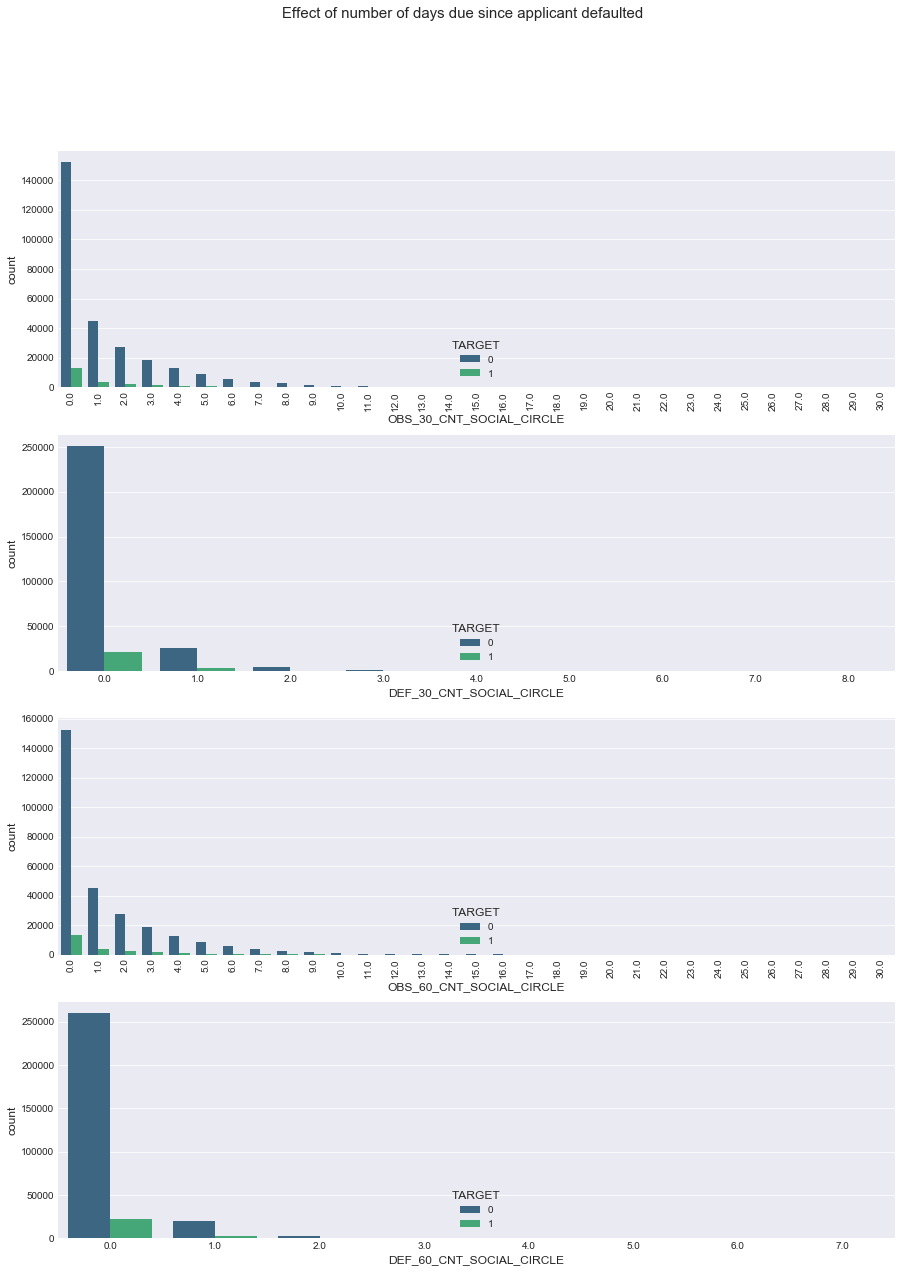

In [262]:
# Analysis of variables related to number of days due since applicant defaulted

fig = plt.figure(figsize = (15,20))
fig.suptitle('Effect of number of days due since applicant defaulted',size=15)
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

plt.subplot(ax1)
sns.countplot(data=app_new, x='OBS_30_CNT_SOCIAL_CIRCLE', palette='viridis',hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(ax2)
sns.countplot(data=app_new, x='DEF_30_CNT_SOCIAL_CIRCLE', palette='viridis',hue='TARGET')

plt.subplot(ax3)
sns.countplot(data=app_new, x='OBS_60_CNT_SOCIAL_CIRCLE', palette='viridis',hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(ax4)
sns.countplot(data=app_new, x='DEF_60_CNT_SOCIAL_CIRCLE', palette='viridis',hue='TARGET')
plt.show()

`OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE:` <br>
* **`Observation-1:`It can be observed that most of the people didn't default by even one day. No of people defaulting for more than one day consistently decreased with each passing day. However this trend doesn't provide any insight to decide the effect of it on client defaulting to payback the loan in the end** <br> 

***AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR***

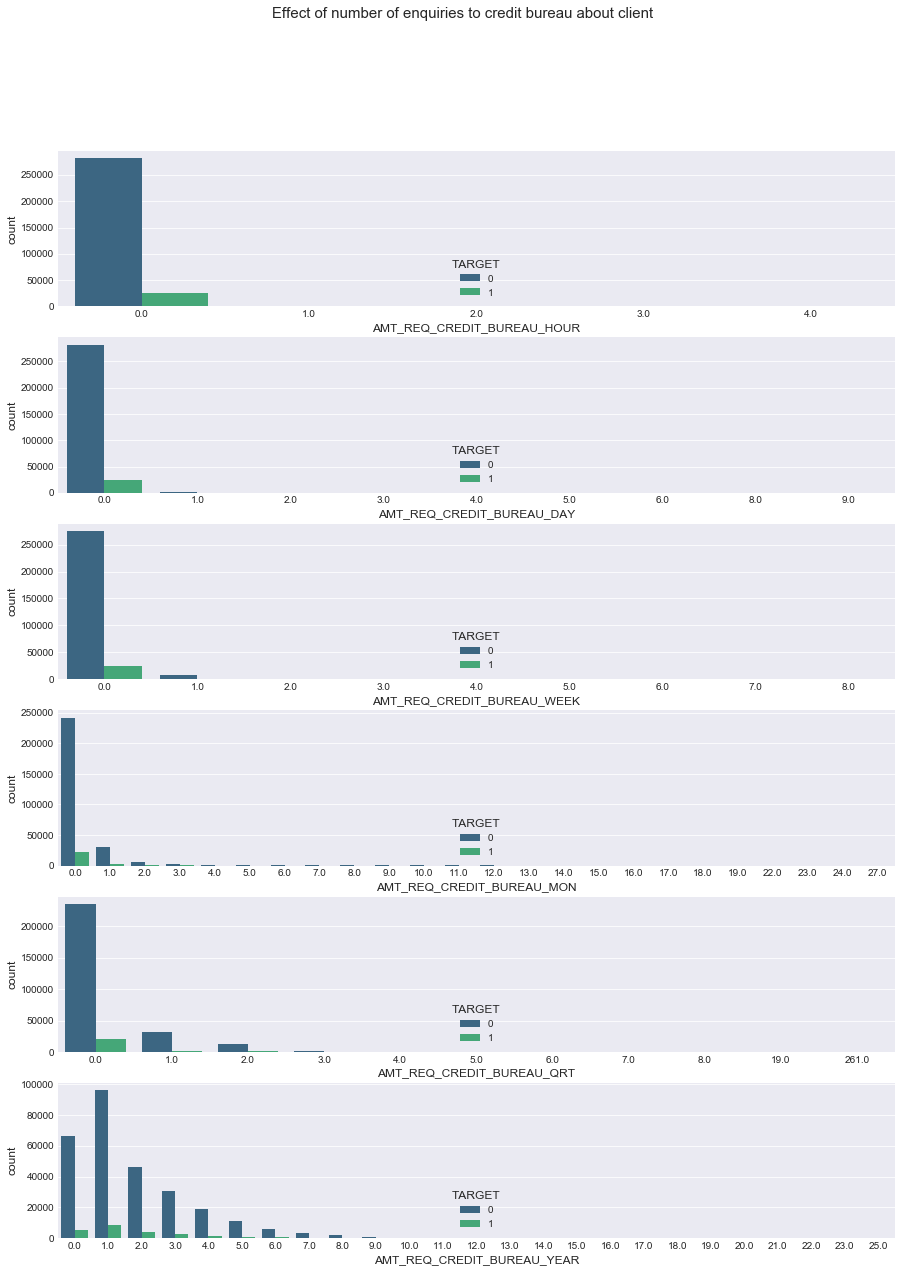

In [263]:
# Analysis of variables related to number of enquiries to credit bureau about client

fig = plt.figure(figsize = (15,20))
fig.suptitle('Effect of number of enquiries to credit bureau about client',size=15)
ax1 = fig.add_subplot(6, 1, 1)
ax2 = fig.add_subplot(6, 1, 2)
ax3 = fig.add_subplot(6, 1, 3)
ax4 = fig.add_subplot(6, 1, 4)
ax5 = fig.add_subplot(6, 1, 5)
ax6 = fig.add_subplot(6, 1, 6)

plt.subplot(ax1)
sns.countplot(data=app_new, x='AMT_REQ_CREDIT_BUREAU_HOUR', palette='viridis',hue='TARGET')
#plt.xticks(rotation=90)

plt.subplot(ax2)
sns.countplot(data=app_new, x='AMT_REQ_CREDIT_BUREAU_DAY', palette='viridis',hue='TARGET')

plt.subplot(ax3)
sns.countplot(data=app_new, x='AMT_REQ_CREDIT_BUREAU_WEEK', palette='viridis',hue='TARGET')
#plt.xticks(rotation=90)

plt.subplot(ax4)
sns.countplot(data=app_new, x='AMT_REQ_CREDIT_BUREAU_MON', palette='viridis',hue='TARGET')

plt.subplot(ax5)
sns.countplot(data=app_new, x='AMT_REQ_CREDIT_BUREAU_QRT', palette='viridis',hue='TARGET')
#plt.xticks(rotation=90)

plt.subplot(ax6)
sns.countplot(data=app_new, x='AMT_REQ_CREDIT_BUREAU_YEAR', palette='viridis',hue='TARGET')
plt.show()

`AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR:` <br>
* **`Observation-1:`There were no enquiries made about most of the clients. We can also observe the distribution between Target 0 and 1 is by and large remained comparable therefore we can not conclude that this variable has no effect in deciding whether client will default** <br> 

## 8.5 Univariate Analysis - Numerical Data

In [264]:
app_new_1.select_dtypes(exclude = 'object').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMAIL',
       'FLAG_CONT_MOBILE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_CATEGORY', 'AMT_CREDIT_RANGE',
       'AMT_ANNUITY_RANGE', 'AMT_GOODS_PRICE_RANGE', 'YEARS_BIRTH',
       'YEARS_EMPLOYED'],
      dtype='object')

In [265]:
app_new_1.select_dtypes(include = 'object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

We have our boundaries set for the numerical univariate analysis. Now lets dive into it.

But before that we need a general purpose function for data visualization so that we minimize the repeatition of the code blocks

In [266]:
# Since there will be lot of barcharts to create, here is a function to handle this effectively

def num_box (g_title,x_col,y_col,hue_col,sharey_flag,log_y, order_bins=None,hue_ord=None):
    font1 = 22
    font2 = 18
    font3 = 16
    if hue_col != None:
        plot_1 = app_new_1[[x_col,y_col,hue_col]]
        plot_0 = app_new_0[[x_col,y_col,hue_col]]
    else:
        plot_1 = app_new_1[[x_col,y_col]]
        plot_0 = app_new_0[[x_col,y_col]]

    plt.style.use('seaborn-whitegrid')
    %matplotlib inline

    fig = plt.figure(figsize = (18,8))
    fig.suptitle(g_title, fontsize=font1)
    ax1 = fig.add_subplot(1, 2, 1)
    if sharey_flag == 'Y':
        ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)
    else:
        ax2 = fig.add_subplot(1, 2, 2)

    plt.subplot(ax1)
    if order_bins == None and hue_ord == None:
        sns.boxplot(x=x_col, y=y_col, data=plot_0, hue=hue_col, orient="v", palette='tab10')
    elif order_bins != None and hue_ord == None:
        sns.boxplot(x=x_col, y=y_col, data=plot_0, hue=hue_col, orient="v", palette='tab10', order=order_bins)
    elif order_bins == None and hue_ord != None:
        sns.boxplot(x=x_col, y=y_col, data=plot_0, hue=hue_col, orient="v", palette='tab10', hue_order=hue_ord)
    else:
        sns.boxplot(x=x_col, y=y_col, data=plot_0, hue=hue_col, orient="v", palette='tab10', order=order_bins, hue_order=hue_ord)
    plt.title('Target-0 (All Other Cases)', fontsize=font2)
    if log_y == 'Y':
        plt.yscale('log')
    plt.xlabel(x_col, fontsize=font3)
    plt.ylabel(y_col, fontsize=font3)
    plt.xticks(rotation=90, fontsize=font3)
    plt.yticks(fontsize=font3)

    plt.subplot(ax2)
    if order_bins == None and hue_ord == None:
        sns.boxplot(x=x_col, y=y_col, data=plot_1, hue=hue_col, orient="v", palette='tab10')
    elif order_bins != None and hue_ord == None:
        sns.boxplot(x=x_col, y=y_col, data=plot_1, hue=hue_col, orient="v", palette='tab10', order=order_bins)
    elif order_bins == None and hue_ord != None:
        sns.boxplot(x=x_col, y=y_col, data=plot_1, hue=hue_col, orient="v", palette='tab10', hue_order=hue_ord)
    else:
        sns.boxplot(x=x_col, y=y_col, data=plot_1, hue=hue_col, orient="v", palette='tab10', order=order_bins, hue_order=hue_ord)
    plt.title('Target-1 (Client w Payment Difficulties)', fontsize=font2)
    if log_y == 'Y':
        plt.yscale('log')
    plt.xlabel(x_col, fontsize=font3)
    plt.ylabel(y_col, fontsize=font3)
    plt.xticks(rotation=90, fontsize=font3)
    plt.yticks(fontsize=font3)

    plt.show()
    return

In [267]:
# Since there will be lot of barcharts to create, here is a function to handle this effectively

def num_box_simple (g_title,y_col,sharey_flag,log_y):
    font1 = 22
    font2 = 18
    font3 = 16
    plot_1 = app_new_1[y_col]
    plot_0 = app_new_0[y_col]

    plt.style.use('seaborn-whitegrid')
    %matplotlib inline

    fig = plt.figure(figsize = (18,8))
    fig.suptitle(g_title, fontsize=font1)
    ax1 = fig.add_subplot(1, 2, 1)
    if sharey_flag == 'Y':
        ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)
    else:
        ax2 = fig.add_subplot(1, 2, 2)

    plt.subplot(ax1)
    sns.boxplot(app_new_0[y_col], orient="v", palette='tab10')
    plt.title('Target-0 (All Other Cases)', fontsize=font2)
    if log_y == 'Y':
        plt.yscale('log')
    plt.ylabel(y_col, fontsize=font3)
    plt.yticks(fontsize=font3)

    plt.subplot(ax2)
    sns.boxplot(app_new_1[y_col], orient="v", palette='tab10')
    plt.title('Target-1 (Client w Payment Difficulties)', fontsize=font2)
    if log_y == 'Y':
        plt.yscale('log')
    plt.ylabel(y_col, fontsize=font3)
    plt.yticks(fontsize=font3)

    plt.show()
    return

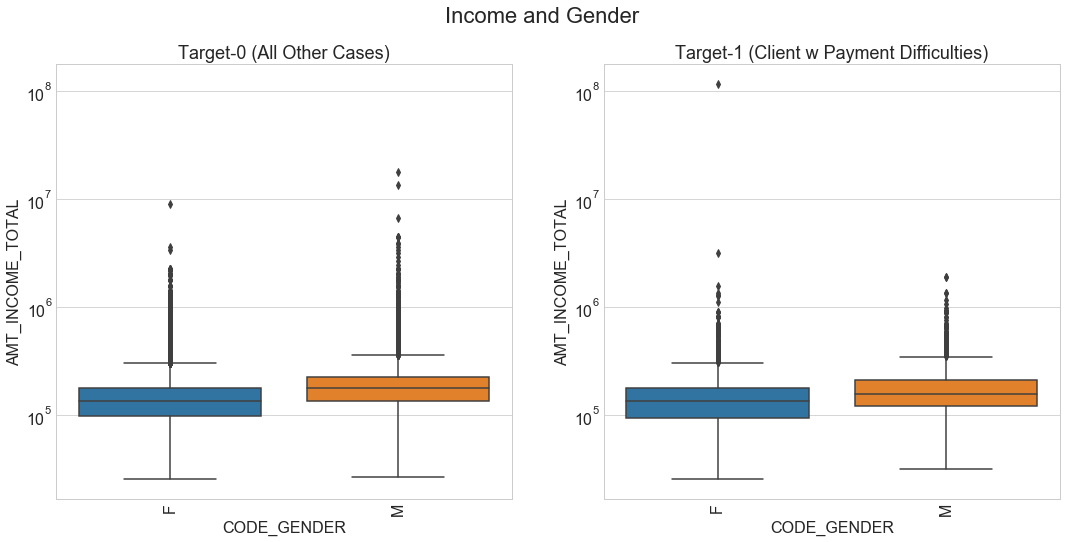

In [268]:
x_col = 'CODE_GENDER'
y_col= 'AMT_INCOME_TOTAL'
hue_col= None
order_bins = ['F','M']
hue_ord = None
num_box('Income and Gender', x_col,y_col,hue_col,'Y','Y',order_bins,hue_ord)

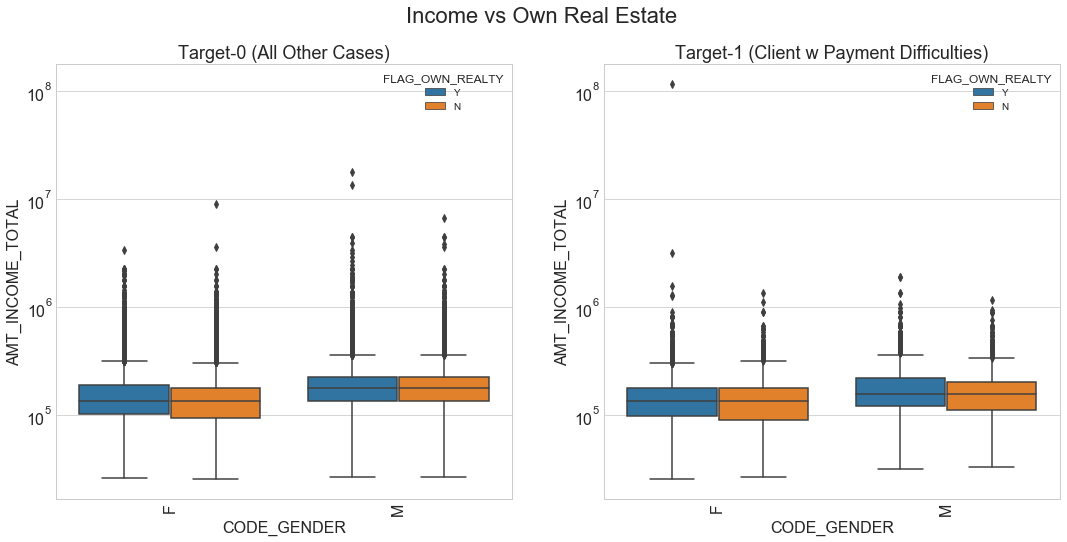

In [269]:
x_col = 'CODE_GENDER'
y_col= 'AMT_INCOME_TOTAL'
hue_col= 'FLAG_OWN_REALTY'
hue_ord = ['Y','N']
order_bins = ['F','M']
num_box('Income vs Own Real Estate', x_col,y_col,hue_col,'Y','Y',order_bins,hue_ord)

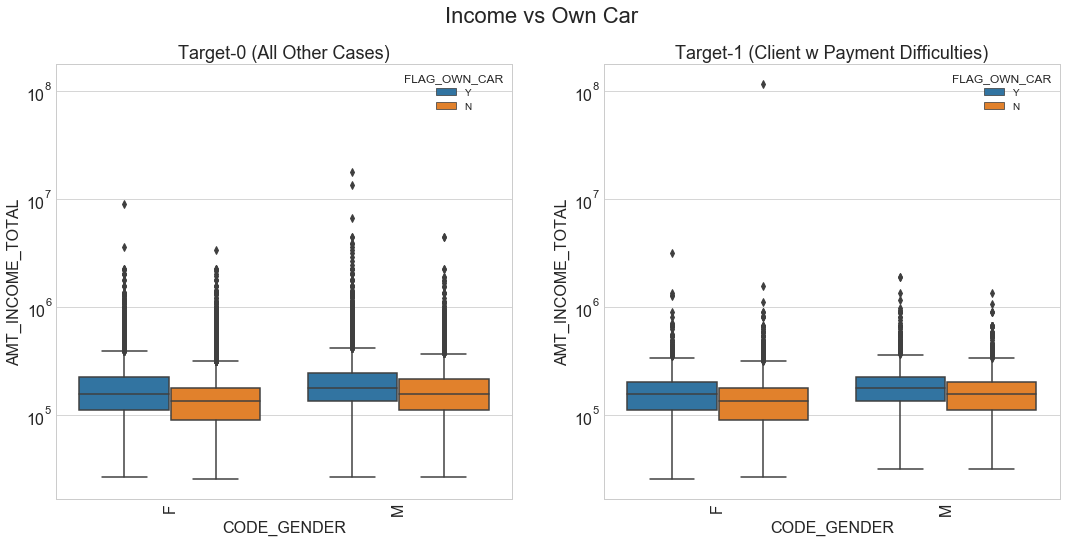

In [270]:
x_col = 'CODE_GENDER'
y_col= 'AMT_INCOME_TOTAL'
hue_col= 'FLAG_OWN_CAR'
hue_ord = ['Y','N']
order_bins = ['F','M']
num_box('Income vs Own Car', x_col,y_col,hue_col,'Y','Y',order_bins,hue_ord)

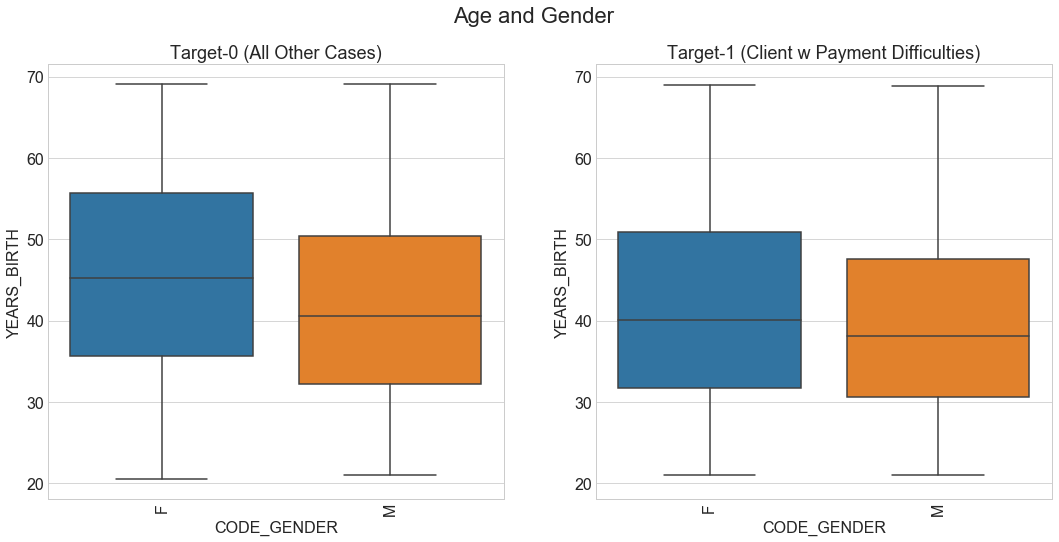

In [271]:
x_col = 'CODE_GENDER'
y_col= 'YEARS_BIRTH'
hue_col= None
order_bins = ['F','M']
hue_ord = None
num_box('Age and Gender', x_col,y_col,hue_col,'Y','N',order_bins,hue_ord)

In [272]:
app_new_1.select_dtypes(exclude = 'object').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMAIL',
       'FLAG_CONT_MOBILE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_CATEGORY', 'AMT_CREDIT_RANGE',
       'AMT_ANNUITY_RANGE', 'AMT_GOODS_PRICE_RANGE', 'YEARS_BIRTH',
       'YEARS_EMPLOYED'],
      dtype='object')

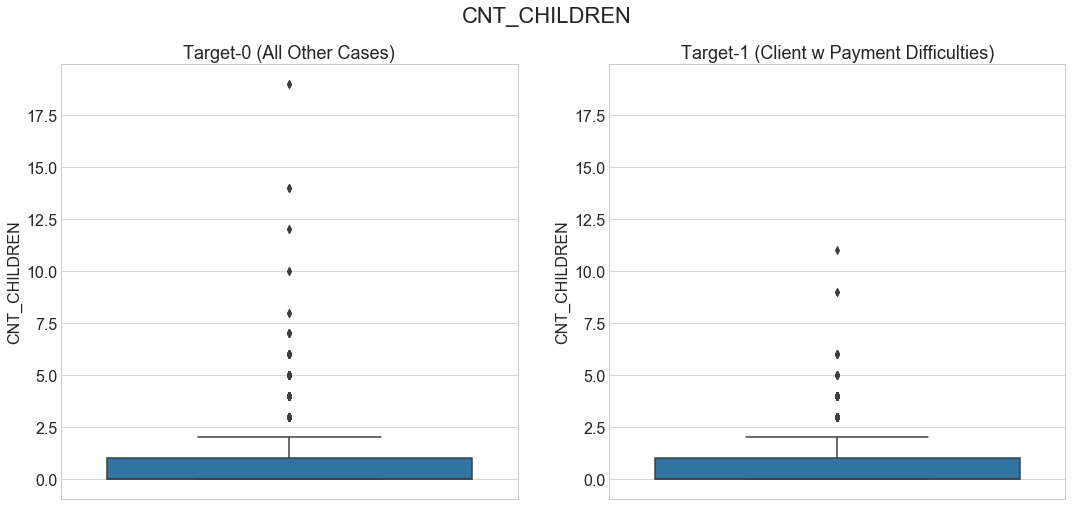

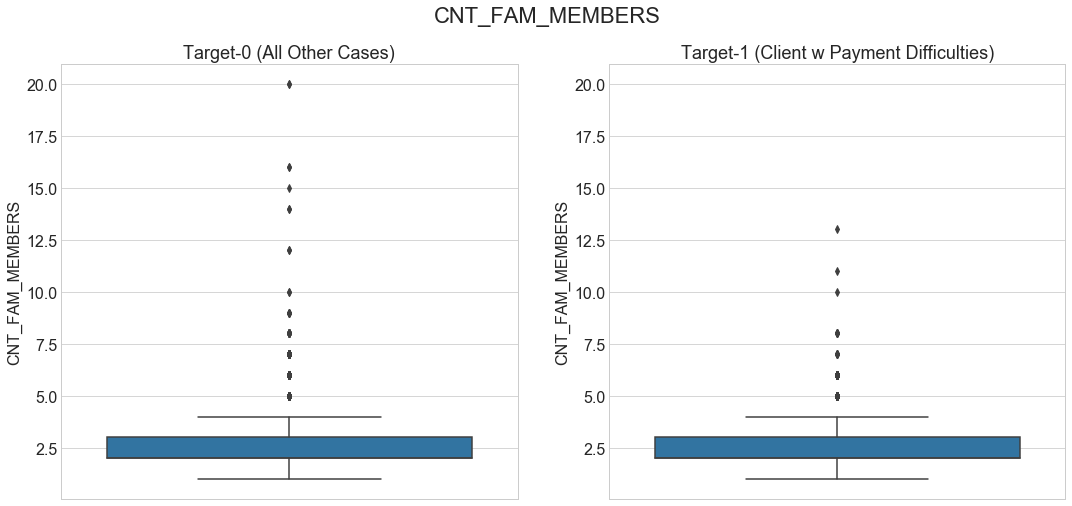

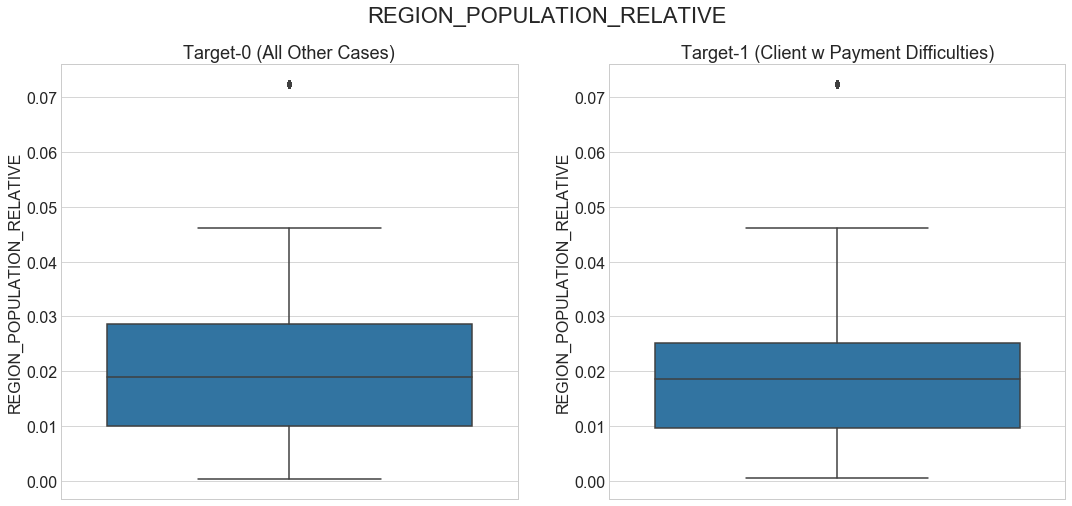

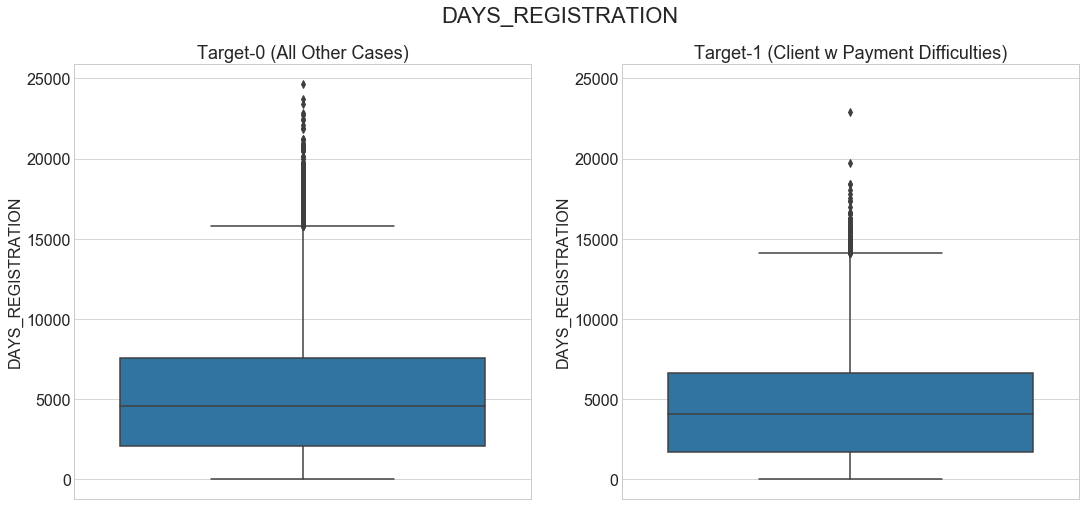

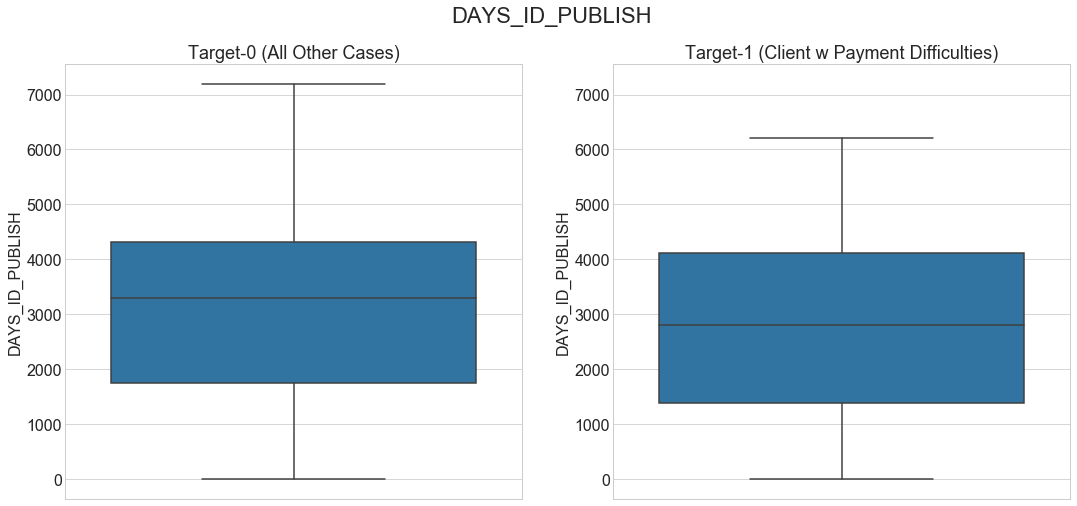

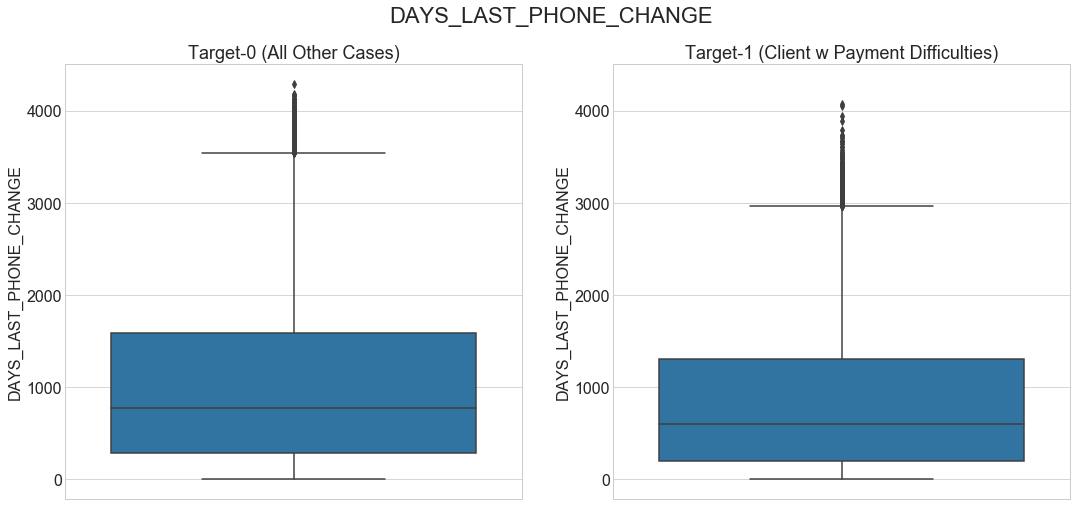

In [273]:
for item in ['CNT_CHILDREN','CNT_FAM_MEMBERS','REGION_POPULATION_RELATIVE',
             'DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']:
    num_box_simple(item, item, 'Y', 'N')

In [274]:
app_new_0[['DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE
count    282677.000000           282677.000000
mean       3017.222622              976.396442
std        1506.618478              831.217424
min           0.000000                0.000000
25%        1755.000000              281.000000
50%        3295.000000              776.000000
75%        4313.000000             1586.000000
max        7197.000000             4292.000000

In [275]:
app_new_1[['DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE
count     24825.000000            24825.000000
mean       2732.099617              808.796818
std        1516.975313              758.090713
min           0.000000                0.000000
25%        1392.000000              194.000000
50%        2797.000000              594.000000
75%        4119.000000             1301.000000
max        6207.000000             4070.000000

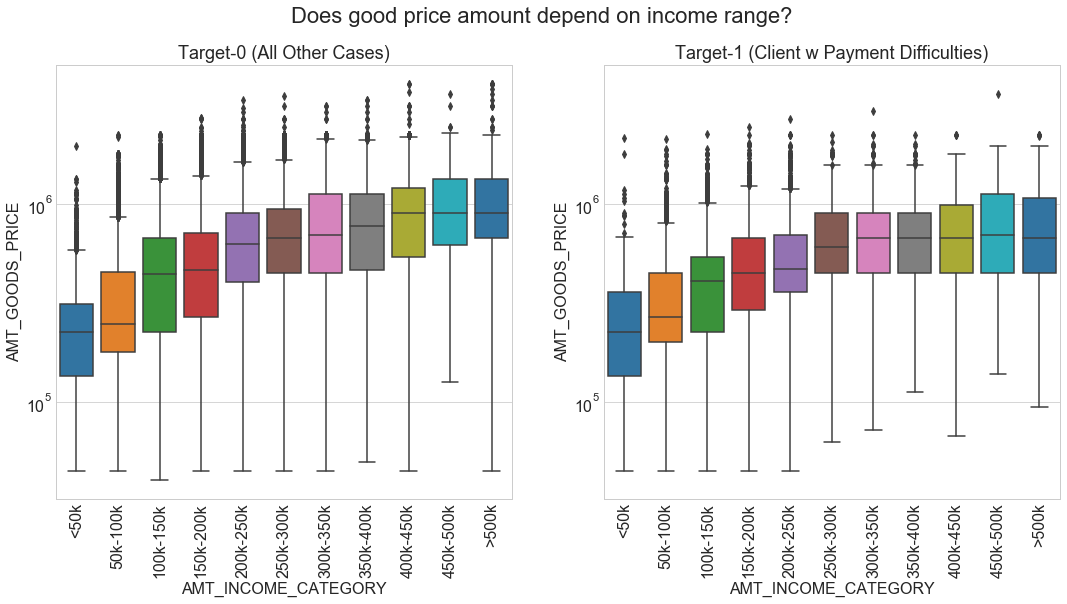

In [276]:
x_col = 'AMT_INCOME_CATEGORY'
y_col= 'AMT_GOODS_PRICE'
hue_col= None
order_bins = ['<50k','50k-100k','100k-150k', '150k-200k','200k-250k','250k-300k','300k-350k','350k-400k','400k-450k','450k-500k','>500k']
hue_ord=None
num_box('Does good price amount depend on income range?', x_col,y_col,hue_col,'Y','Y',order_bins,hue_ord)

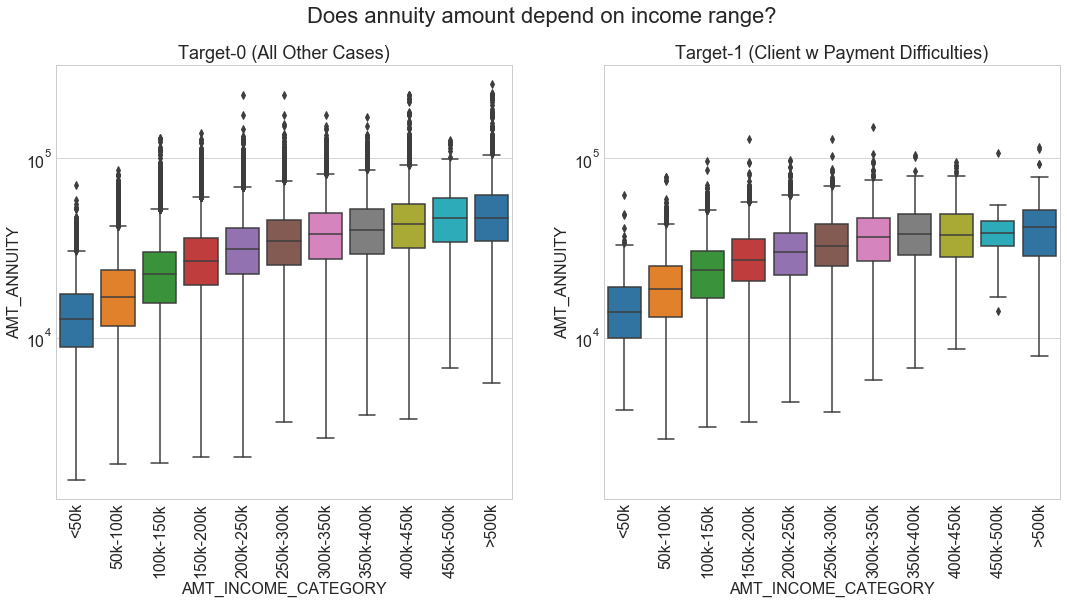

In [277]:
x_col = 'AMT_INCOME_CATEGORY'
y_col= 'AMT_ANNUITY'
hue_col= None
order_bins = ['<50k','50k-100k','100k-150k', '150k-200k','200k-250k','250k-300k','300k-350k','350k-400k','400k-450k','450k-500k','>500k']
hue_ord=None
num_box('Does annuity amount depend on income range?', x_col,y_col,hue_col,'Y','Y',order_bins,hue_ord)

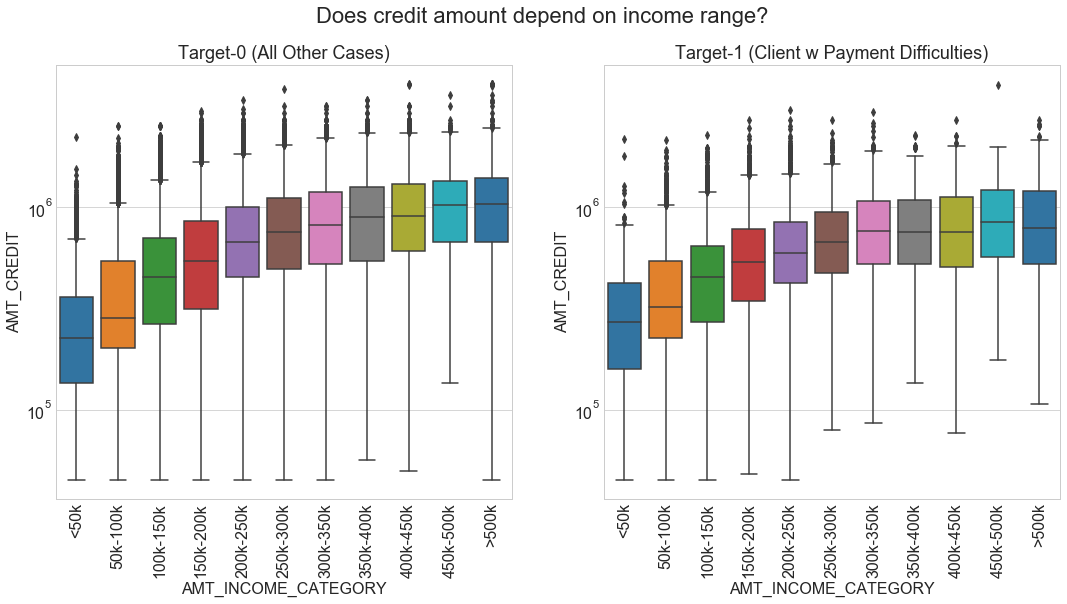

In [278]:
x_col = 'AMT_INCOME_CATEGORY'
y_col= 'AMT_CREDIT'
hue_col= None
order_bins = ['<50k','50k-100k','100k-150k', '150k-200k','200k-250k','250k-300k','300k-350k','350k-400k','400k-450k','450k-500k','>500k']
hue_ord=None
num_box('Does credit amount depend on income range?', x_col,y_col,hue_col,'Y','Y',order_bins,hue_ord)

## 8.6 Bivariate & Multivariate Analysis

****Analysis of effect of EXT_SOURCE_2 & EXT_SOURCE_3****

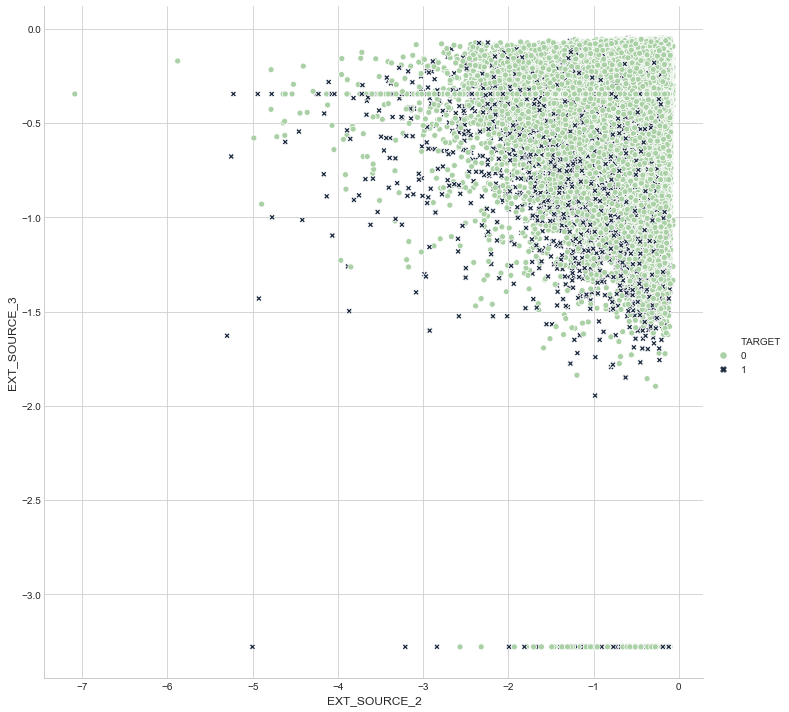

In [279]:
sns.relplot(x="EXT_SOURCE_2", y="EXT_SOURCE_3", hue="TARGET", palette="ch:r=-.5,l=.75", data=app_new, style="TARGET",height=10);
plt.show()

`EXT_SOURCE_2 & EXT_SOURCE_3:` <br>
* **`Observation-1:`If we observe the normalized ratings from external sources closely the density of defaulters is more in the region of higher negative scores. Therefore we can conclude that higher the negative scores people are more likely to default** <br> 

****TOTALAREA_MODE vs FLOORSMAX_AVG****

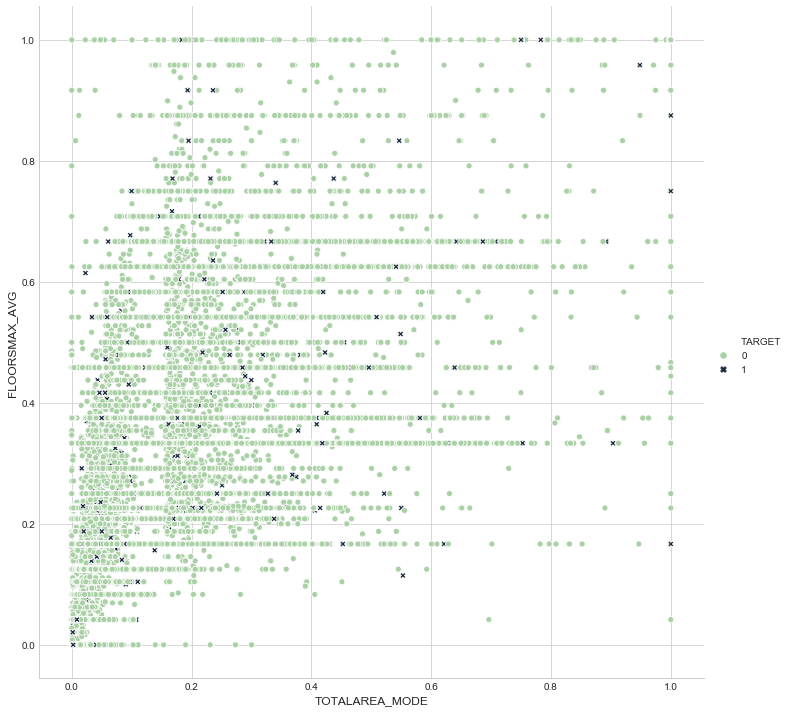

In [280]:
sns.relplot(x="TOTALAREA_MODE", y="FLOORSMAX_AVG", hue="TARGET", palette="ch:r=-.5,l=.75", data=app_new, style="TARGET",height=10);
plt.show()

`TOTALAREA_MODE vs FLOORSMAX_AVG:` <br>
* **`Observation-1:`No perticular trend can be derived from the above distribution. Both Target 0 and 1 are spread across the spectrum thereby we can not obtain any perticular insight from these variables** <br> 

In [281]:
app_new_1.select_dtypes(exclude = 'object').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMAIL',
       'FLAG_CONT_MOBILE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_CATEGORY', 'AMT_CREDIT_RANGE',
       'AMT_ANNUITY_RANGE', 'AMT_GOODS_PRICE_RANGE', 'YEARS_BIRTH',
       'YEARS_EMPLOYED'],
      dtype='object')

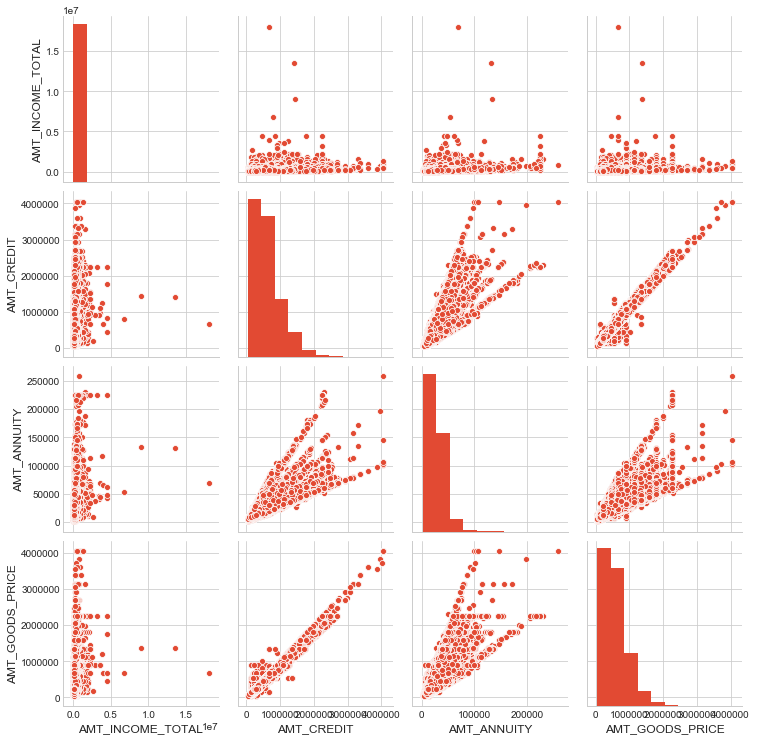

In [282]:
sns.pairplot(data = app_new_0, vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'])
plt.show()

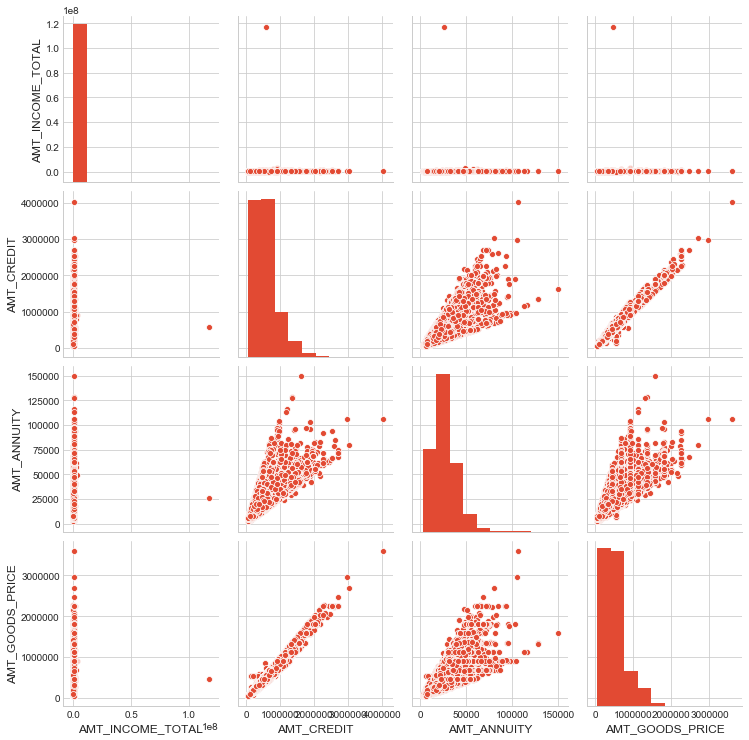

In [283]:
sns.pairplot(data = app_new_1, vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'])
plt.show()

In [284]:
# List of column names to process in Heatmap for Applications Dataframe

num_cols = list(app_new_0.select_dtypes(exclude=['object','category']).columns)
for elem in ['SK_ID_CURR','TARGET','FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'YEARS_BIRTH','YEARS_EMPLOYED']:
    num_cols.remove(elem)
print(num_cols)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [285]:
# Function to create heat plot and print correlation matrix

def heatmap_plot_print (tit_str, df, list_plot,rank_limit):
    title_str = tit_str +'\n'
    fig = plt.figure(figsize = (25,13))
    corr_matrix = df[list_plot].corr()
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corr_matrix, mask=mask, cmap = "YlGnBu", annot = True,fmt='.2f', vmax = 1)
    bot,top = ax.get_ylim()
    ax.set_ylim(bot+0.5,top-0.5)
    plt.title(title_str, fontdict={'fontsize':25, 'color':'black'})
    plt.show()
    print ('Top {0} Correlations based on ABS(CORRELATION MATRIX)\n'.format(rank_limit))
    abs_corr_matrix = corr_matrix.abs().unstack().sort_values(kind = 'quicksort').dropna()
    final_matrix = abs_corr_matrix[abs_corr_matrix != 1.0].sort_values(ascending = False).drop_duplicates(keep='first')
    print (final_matrix.head(rank_limit))

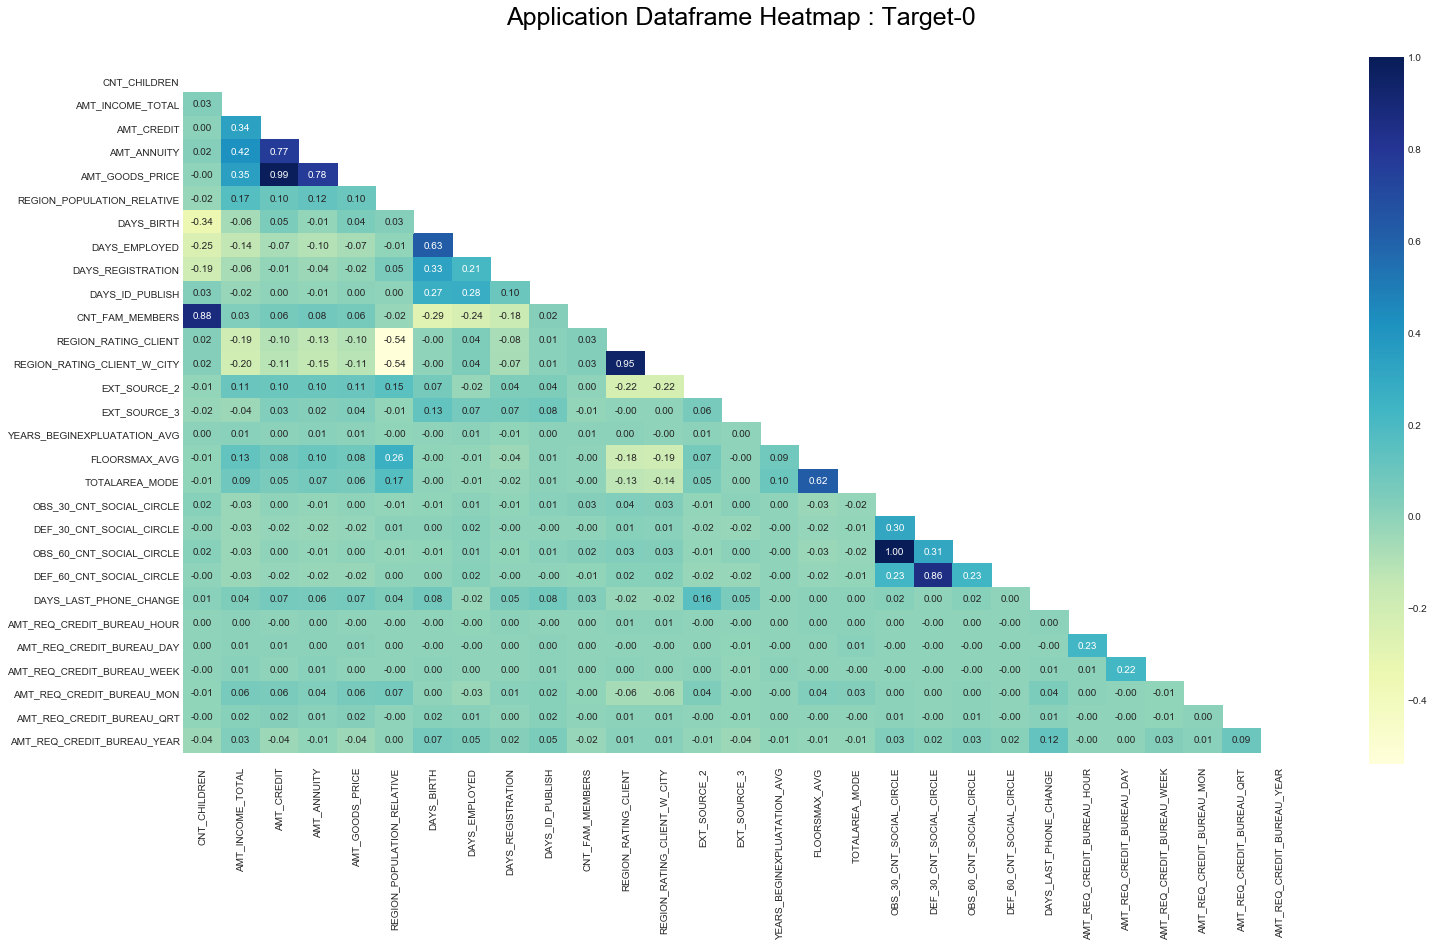

Top 20 Correlations based on ABS(CORRELATION MATRIX)

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998390
AMT_CREDIT                   AMT_GOODS_PRICE                0.986882
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950148
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878570
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.856848
AMT_GOODS_PRICE              AMT_ANNUITY                    0.776252
AMT_ANNUITY                  AMT_CREDIT                     0.771296
DAYS_BIRTH                   DAYS_EMPLOYED                  0.626116
FLOORSMAX_AVG                TOTALAREA_MODE                 0.623806
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT           0.539015
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.537312
AMT_INCOME_TOTAL             AMT_ANNUITY                    0.418954
AMT_GOODS_PRICE              AMT_INCOME_TOTAL               0.349367
AMT_CREDIT                   AMT_INCOME_TOTAL    

In [286]:
heatmap_plot_print('Application Dataframe Heatmap : Target-0', app_new_0, num_cols,20)

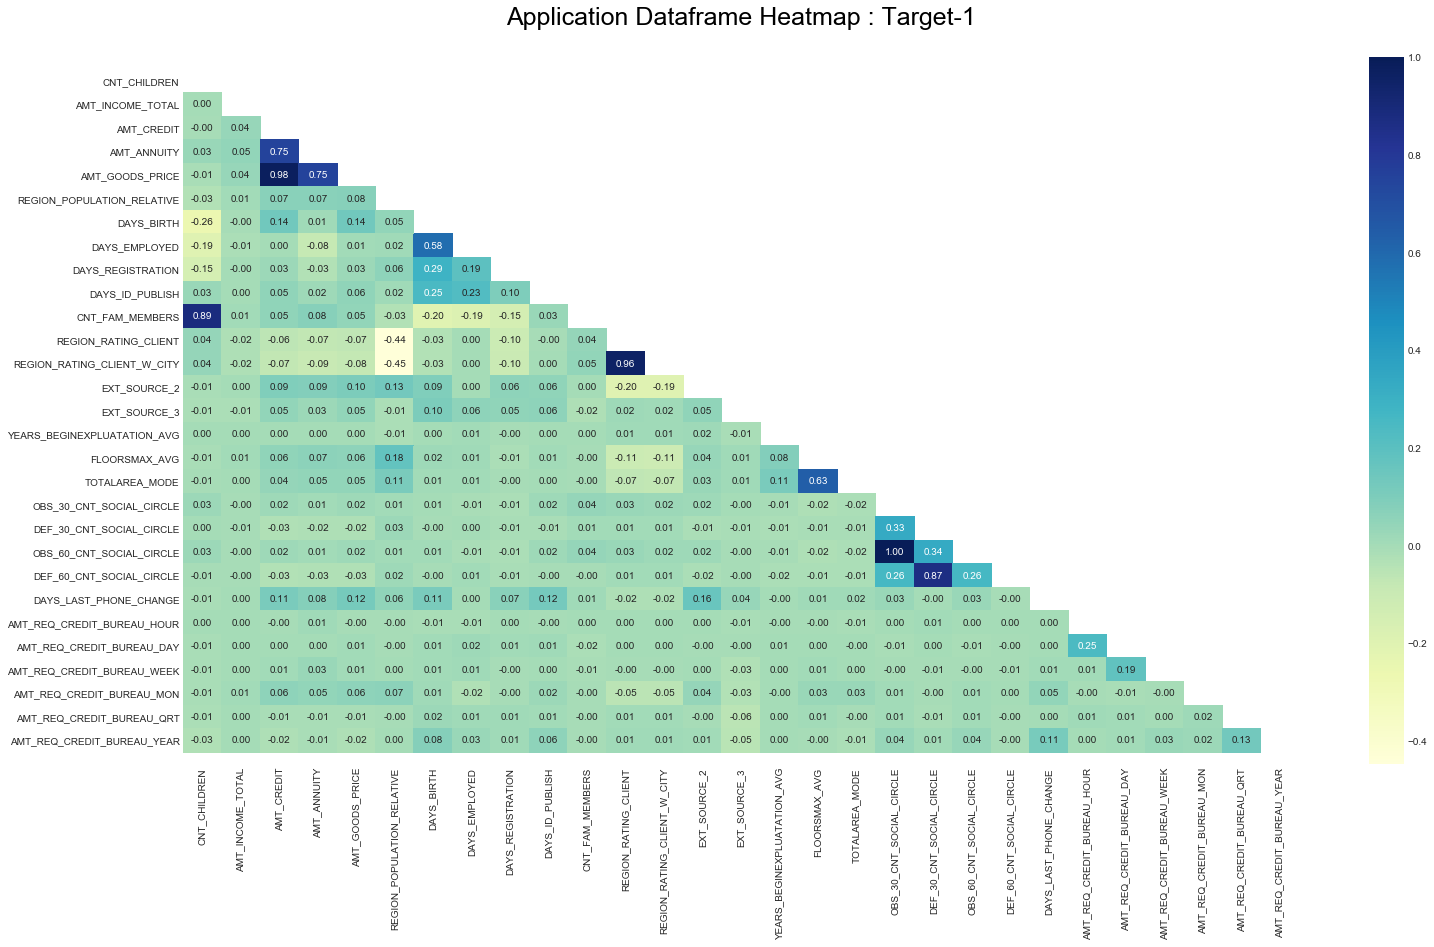

Top 20 Correlations based on ABS(CORRELATION MATRIX)

OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998270
AMT_GOODS_PRICE              AMT_CREDIT                     0.982566
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.869016
AMT_CREDIT                   AMT_ANNUITY                    0.752195
AMT_GOODS_PRICE              AMT_ANNUITY                    0.752022
TOTALAREA_MODE               FLOORSMAX_AVG                  0.634193
DAYS_BIRTH                   DAYS_EMPLOYED                  0.582185
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.446977
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE     0.443236
OBS_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.337389
OBS_30_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.334035
DAYS_REGISTRATION            DAYS_BIRTH          

In [287]:
heatmap_plot_print('Application Dataframe Heatmap : Target-1', app_new_1, num_cols,20)

In [288]:
# Function to detect which combinations have highest change in correlation value between Target-0 and Target-1 and plot a Delta Heat Map

def delta_heatmap_plot_print (tit_str, df1, df2, list_plot, rank_limit):
    title_str = tit_str +'\n'
    fig = plt.figure(figsize = (25,13))
    delta_corr_matrix = (df1[list_plot].corr().abs() - df2[list_plot].corr().abs()).abs()
    mask = np.zeros_like(delta_corr_matrix)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(delta_corr_matrix, mask=mask, cmap = "YlOrBr", vmin=0.0) #, annot = True,fmt='.2f')
    bot,top = ax.get_ylim()
    ax.set_ylim(bot+0.5,top-0.5)
    plt.title(title_str, fontdict={'fontsize':25, 'color':'black'})
    plt.show()
    print ('Top {0} Correlations based on DELTA OF CORRELATION MATRIX of TARGET_0 MINUS TARGET_1 (ABS))\n'.format(rank_limit))
    abs_delta_corr_matrix = delta_corr_matrix.unstack().sort_values(kind = 'quicksort').dropna()
    final_delta_corr_matrix = abs_delta_corr_matrix[abs_delta_corr_matrix != 1.0].sort_values(ascending = False).drop_duplicates(keep='first')
    print (final_delta_corr_matrix.head(rank_limit))

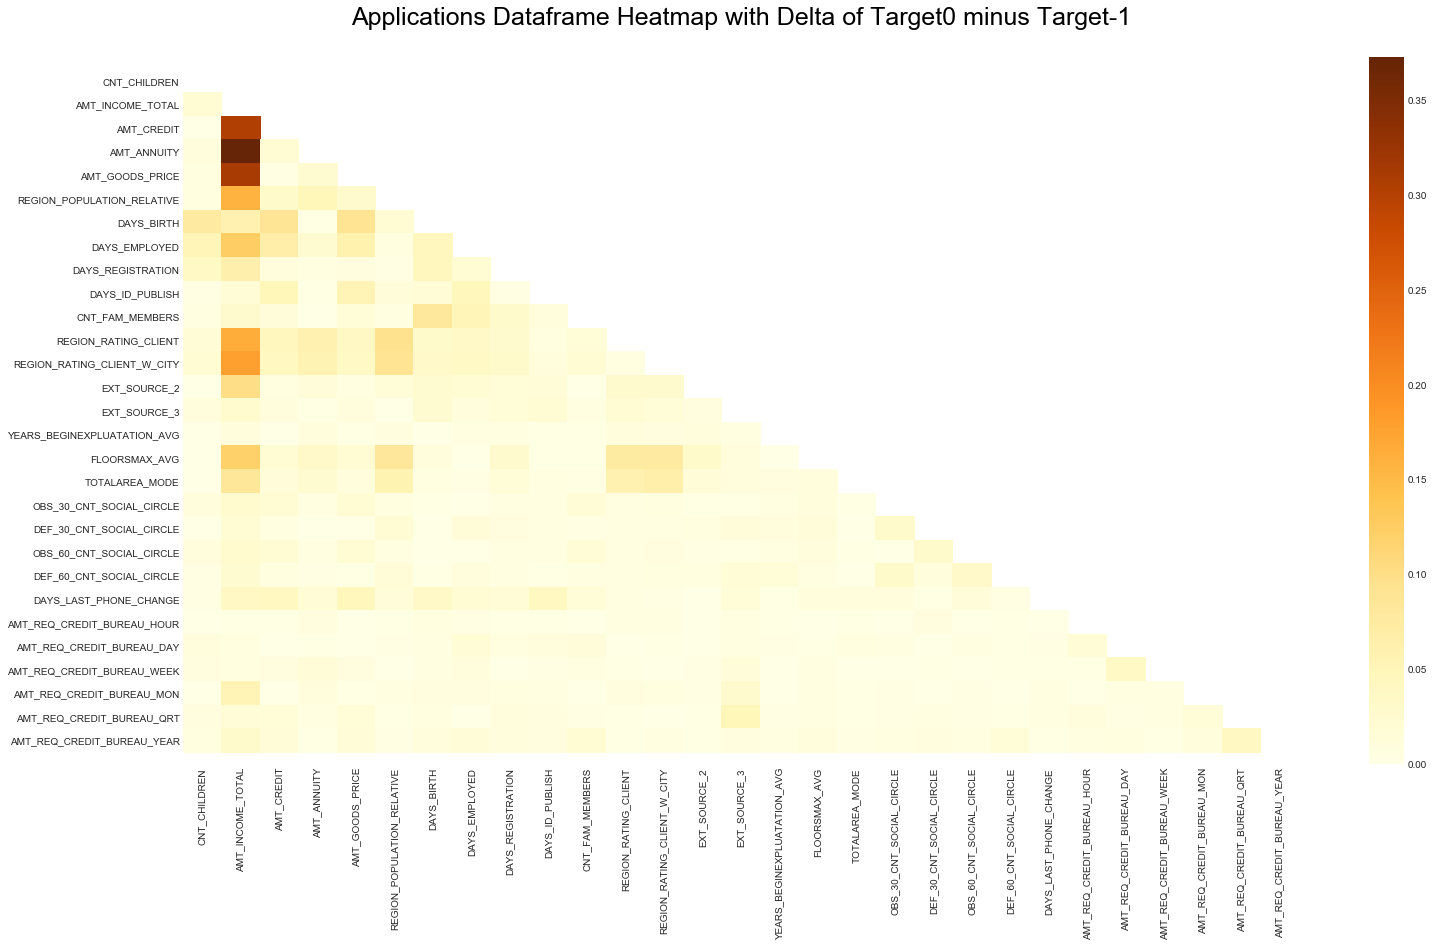

Top 12 Correlations based on DELTA OF CORRELATION MATRIX of TARGET_0 MINUS TARGET_1 (ABS))

AMT_ANNUITY                  AMT_INCOME_TOTAL               0.372533
AMT_GOODS_PRICE              AMT_INCOME_TOTAL               0.311795
AMT_CREDIT                   AMT_INCOME_TOTAL               0.304673
REGION_RATING_CLIENT_W_CITY  AMT_INCOME_TOTAL               0.177668
REGION_RATING_CLIENT         AMT_INCOME_TOTAL               0.165095
AMT_INCOME_TOTAL             REGION_POPULATION_RELATIVE     0.158720
                             DAYS_EMPLOYED                  0.125412
FLOORSMAX_AVG                AMT_INCOME_TOTAL               0.120293
AMT_INCOME_TOTAL             EXT_SOURCE_2                   0.100970
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT           0.095779
AMT_GOODS_PRICE              DAYS_BIRTH                     0.091214
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY    0.090335
dtype: float64


In [289]:
delta_heatmap_plot_print('Applications Dataframe Heatmap with Delta of Target0 minus Target-1', app_new_0, app_new_1, num_cols,12)

# 9. Data Analysis for Previous Dataframe

## 9.1 Data Imbalance Study

In [290]:
prev_new['NAME_CONTRACT_STATUS'].value_counts(normalize = True)

Approved        0.634974
Canceled        0.193391
Refused         0.170775
Unused offer    0.000860
Name: NAME_CONTRACT_STATUS, dtype: float64

In [291]:
prev_new['NAME_CONTRACT_TYPE'].value_counts(normalize = True)

Cash loans         0.457393
Consumer loans     0.424306
Revolving loans    0.118301
Name: NAME_CONTRACT_TYPE, dtype: float64

* **Target variable is not defined or not available in previous dataframe.** <br>
* **One possiblity is to segment this dataframe based on CONTRACT_STATUS. In this case, there is data imbalance since 63% of applications were approved and only the remaining 37% were other status.**
* **Second possiblity is to segment this dataframe based on CONTRACT_TYPE. In this case there is data imbalance between Consumer loans (43%) and revolving loans (12%).**
* **Since the case study does not specify any particular focus area for previous dataframe, we decided to NOT segment this dataframe and do a basic EDA on this. At a later stage, we can look at aggregating previous dataframe on need to need basis**

## 9.2 Univariate Analysis

In [292]:
prev_new.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [293]:
# Slice previous dataframe based on TARGET-1 SK_ID_CURR from Applications Dataframe

app_new_1 = app_new_select.loc[app_new_select['TARGET'] == 1]
prev_new_1 = prev_new[prev_new.SK_ID_CURR.isin(app_new_1.SK_ID_CURR)]
prev_new_1.shape

(119394, 30)

In [294]:
prev_new.shape

(1632778, 30)

In [295]:
print (prev_new_1.shape[0]/prev_new.shape[0])

0.07312322924488203


In [296]:
prev_new_1.CODE_REJECT_REASON.value_counts()

XAP       90960
HC        16736
LIMIT      5509
SCO        3148
SCOFR      2268
XNA         329
VERIF       282
CLIENT      122
SYSTEM       40
Name: CODE_REJECT_REASON, dtype: int64

[]

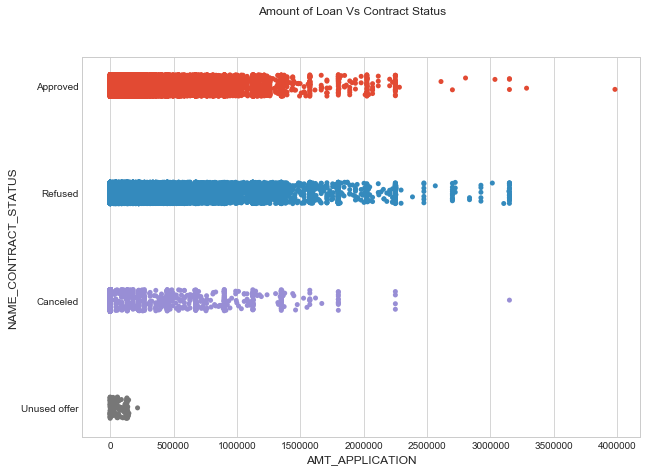

In [297]:
plt.figure(figsize = (10,7))
plt.suptitle("Amount of Loan Vs Contract Status")
sns.stripplot(x='AMT_APPLICATION', y="NAME_CONTRACT_STATUS", data=prev_new_1)
plt.plot()

In [298]:
prev_new_1[list(prev_new_1.select_dtypes(include='object').columns)].nunique().sort_values()

NAME_CONTRACT_TYPE            3
NAME_PRODUCT_TYPE             3
NFLAG_INSURED_ON_APPROVAL     3
NAME_CONTRACT_STATUS          4
NAME_PAYMENT_TYPE             4
NAME_CLIENT_TYPE              4
NAME_PORTFOLIO                5
NAME_YIELD_GROUP              5
NAME_TYPE_SUITE               8
CHANNEL_TYPE                  8
CODE_REJECT_REASON            9
NAME_SELLER_INDUSTRY         11
PRODUCT_COMBINATION          17
NAME_CASH_LOAN_PURPOSE       25
NAME_GOODS_CATEGORY          26
dtype: int64

In [299]:
def prev_barplots (item):
    font2 = 18
    font3 = 16
    plt.style.use('seaborn-whitegrid')
    %matplotlib inline
    plt.figure(figsize = (10,7))
    df = prev_new_1[item].value_counts(normalize = True)*100
    sns.barplot(x=df.index, y=df.values, palette='tab10')
    title_text = 'Sliced Previous Data Target-1' + ' - ' + item
    plt.title(title_text, fontsize=font2)
    plt.xlabel(item, fontsize=font3)
    plt.ylabel('Percentage', fontsize=font3)
    plt.xticks(rotation=90, fontsize=font3)
    plt.yticks(fontsize=font3)
    plt.show()

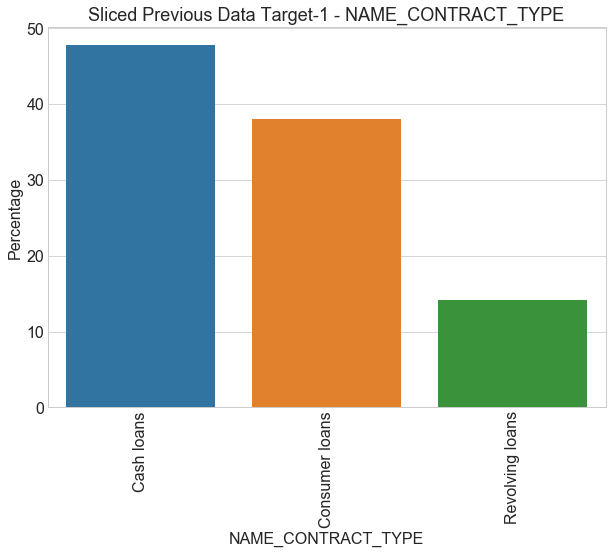

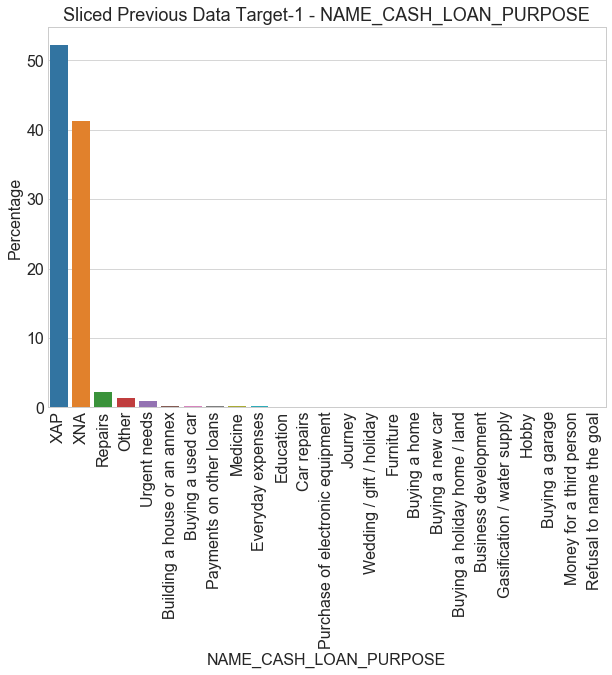

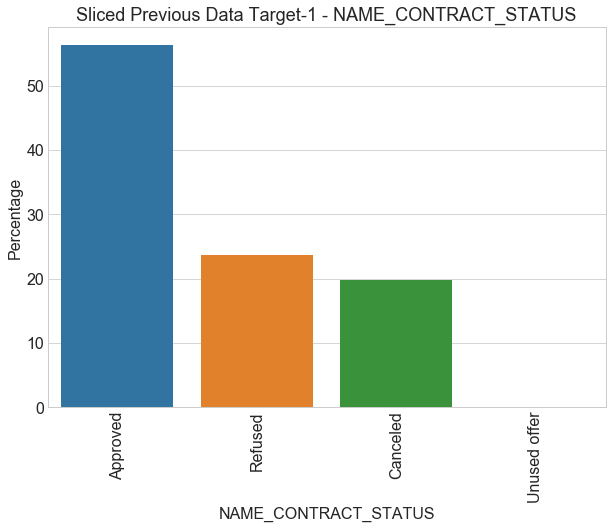

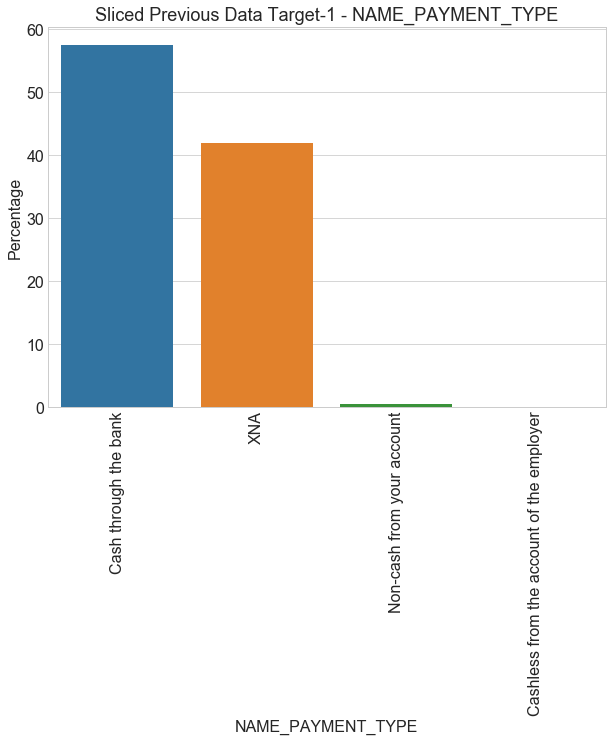

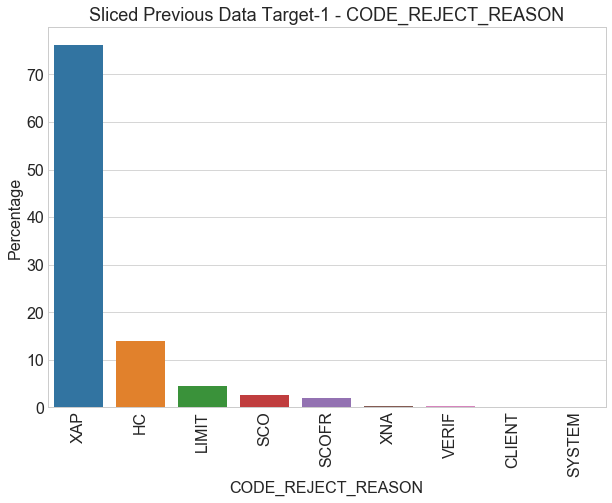

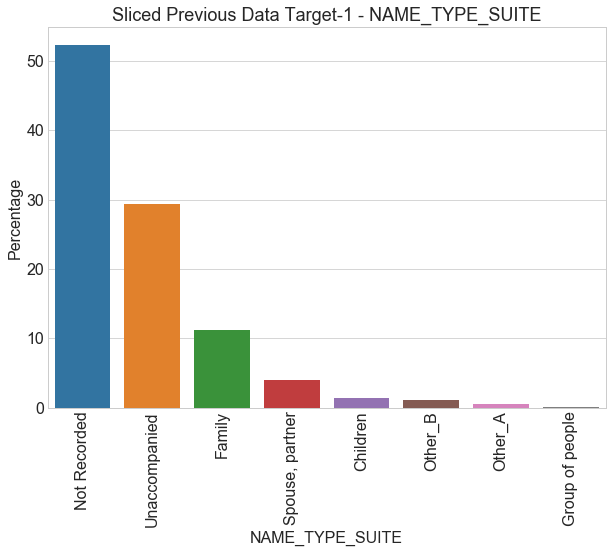

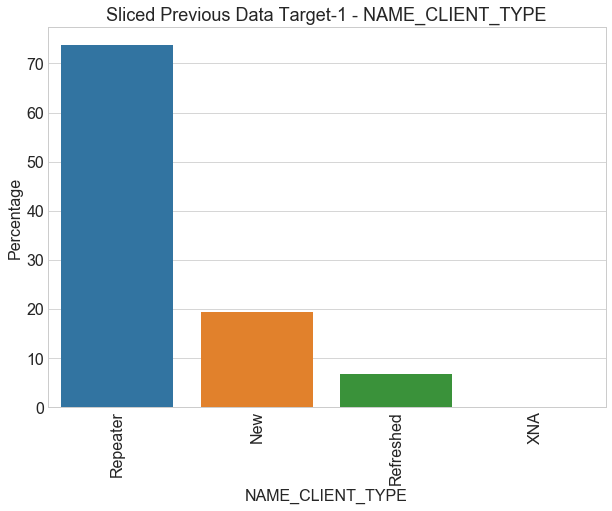

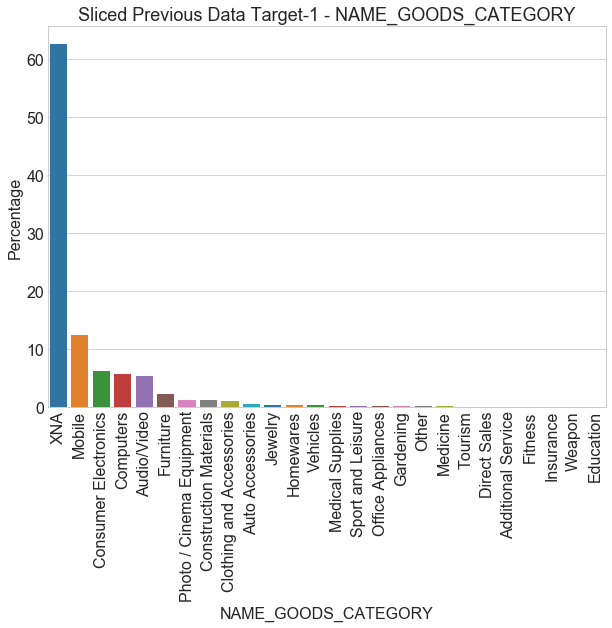

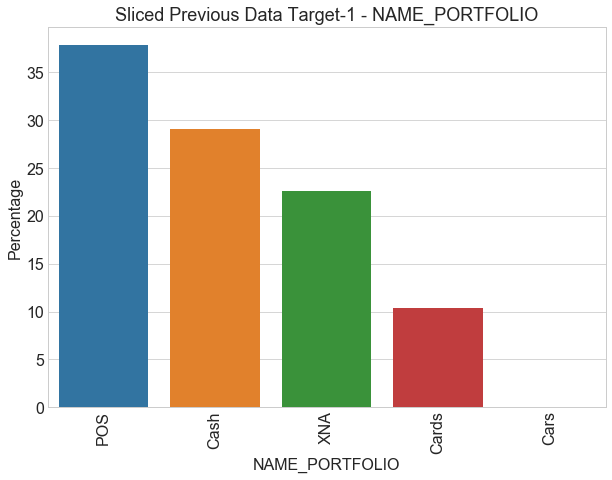

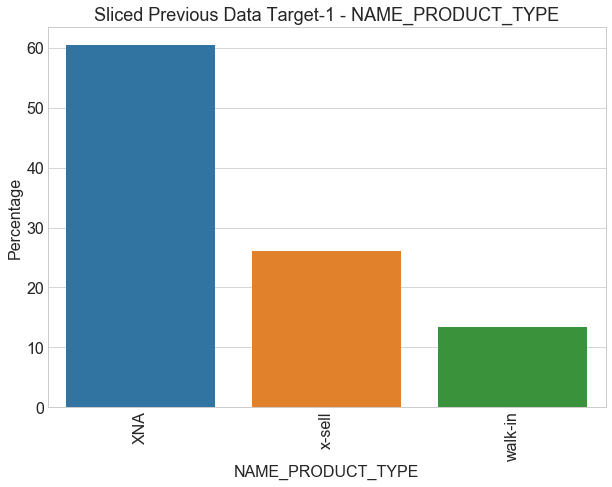

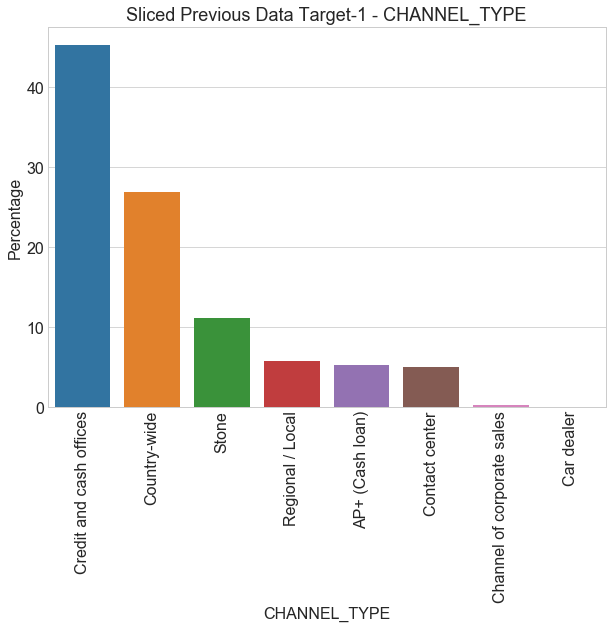

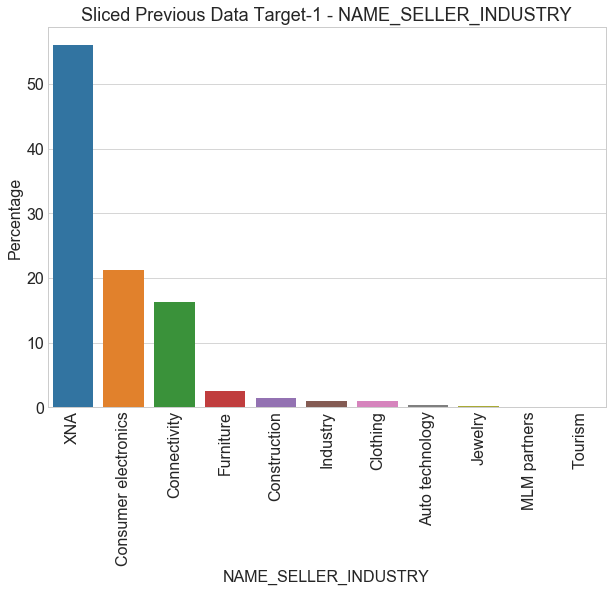

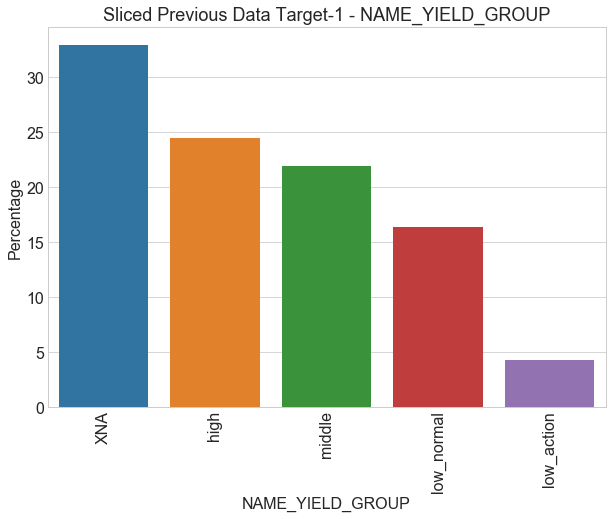

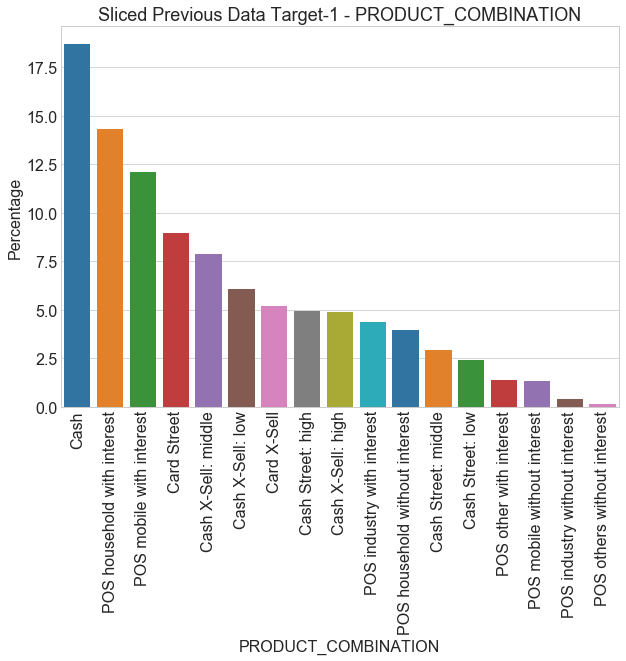

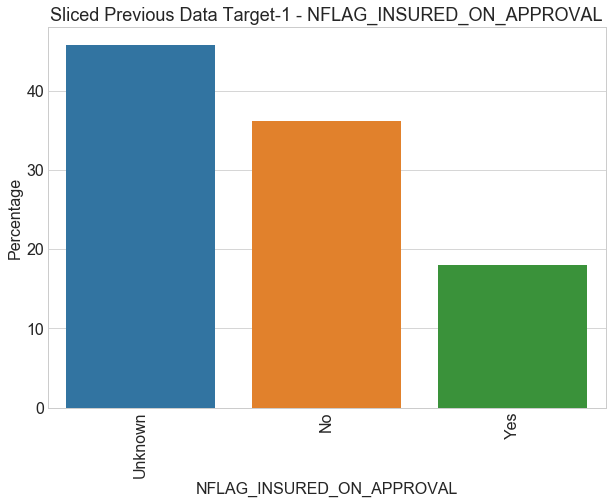

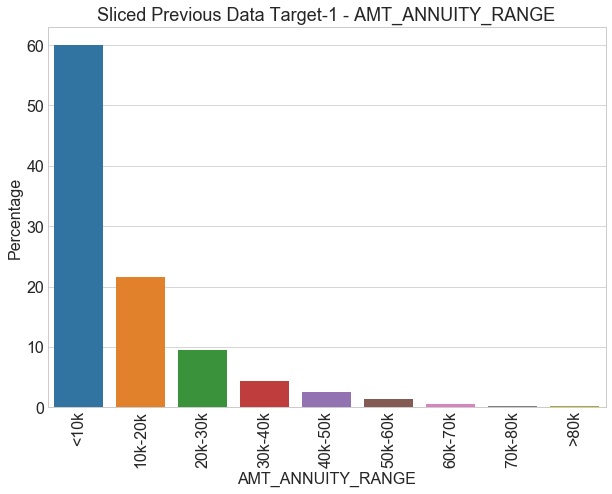

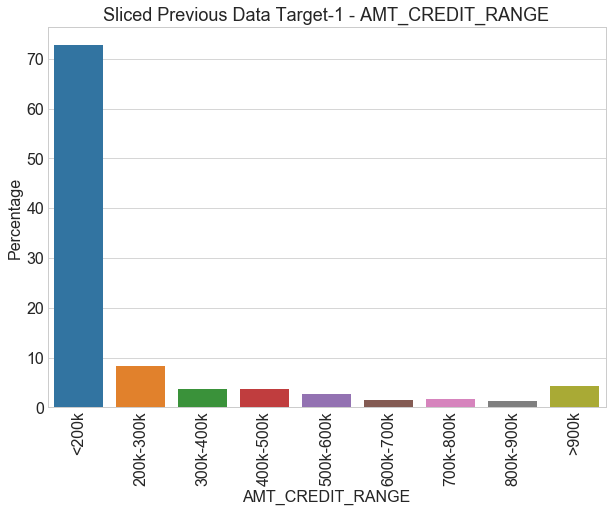

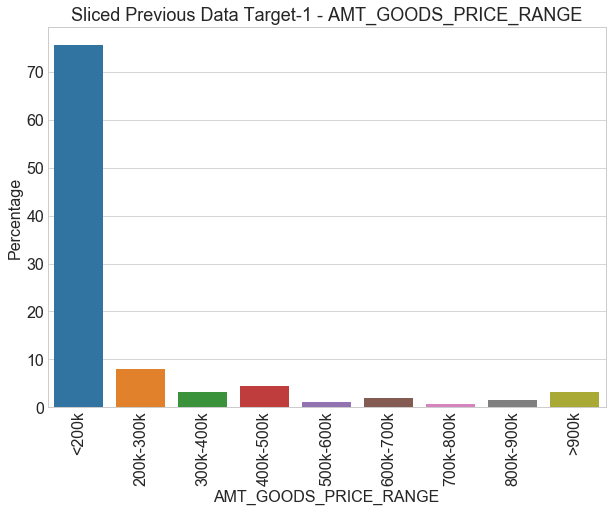

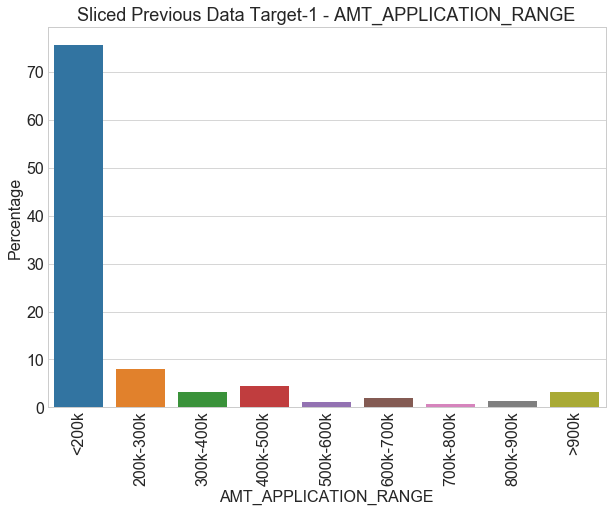

In [300]:
for item in list(prev_new_1.select_dtypes(include=['object','category']).columns):
    prev_barplots(item)

In [301]:
list(prev_new_1.select_dtypes(exclude='object').columns)

['SK_ID_CURR',
 'SK_ID_PREV',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DUE',
 'DAYS_TERMINATION',
 'AMT_ANNUITY_RANGE',
 'AMT_CREDIT_RANGE',
 'AMT_GOODS_PRICE_RANGE',
 'AMT_APPLICATION_RANGE']

## 9.3 Bivariate & Multivariate Analysis

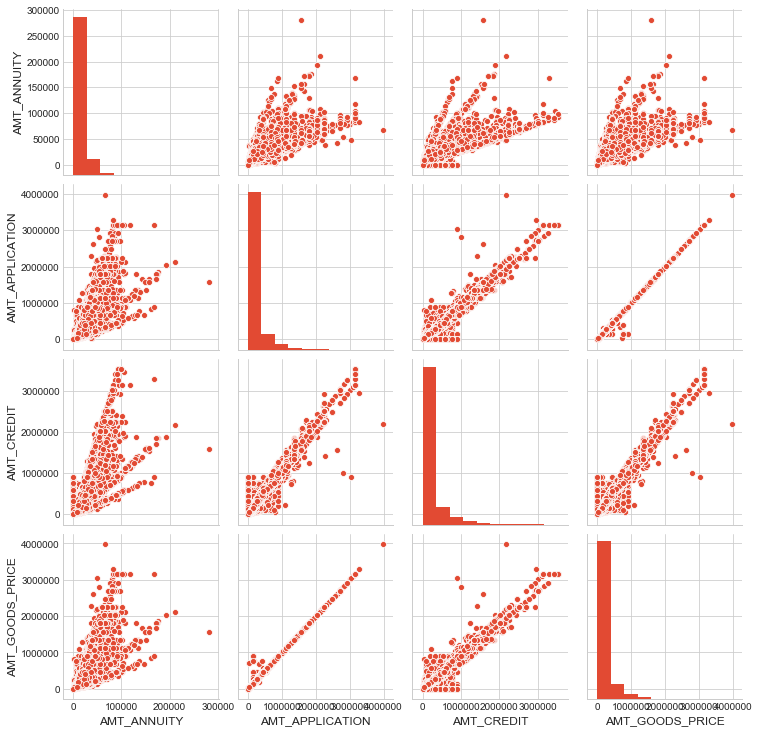

In [302]:
sns.pairplot(data = prev_new_1, vars = [ 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE'])
plt.show()

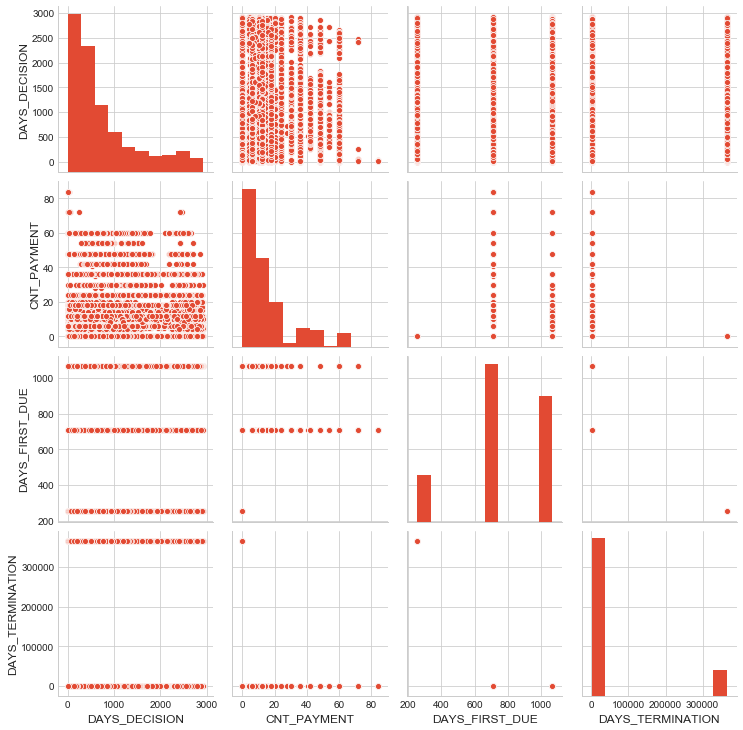

In [303]:
sns.pairplot(data = prev_new_1, vars = ['DAYS_DECISION', 'CNT_PAYMENT','DAYS_FIRST_DUE','DAYS_TERMINATION'])
plt.show()

In [304]:
# List of column names to process in Heatmap for Previous Dataframe (Full dataset sliced for target-1)

num_cols_2 = list(prev_new_1.select_dtypes(exclude=['object','category']).columns)
for elem in ['SK_ID_CURR','SK_ID_PREV']:
    num_cols_2.remove(elem)
print(num_cols_2)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DUE', 'DAYS_TERMINATION']


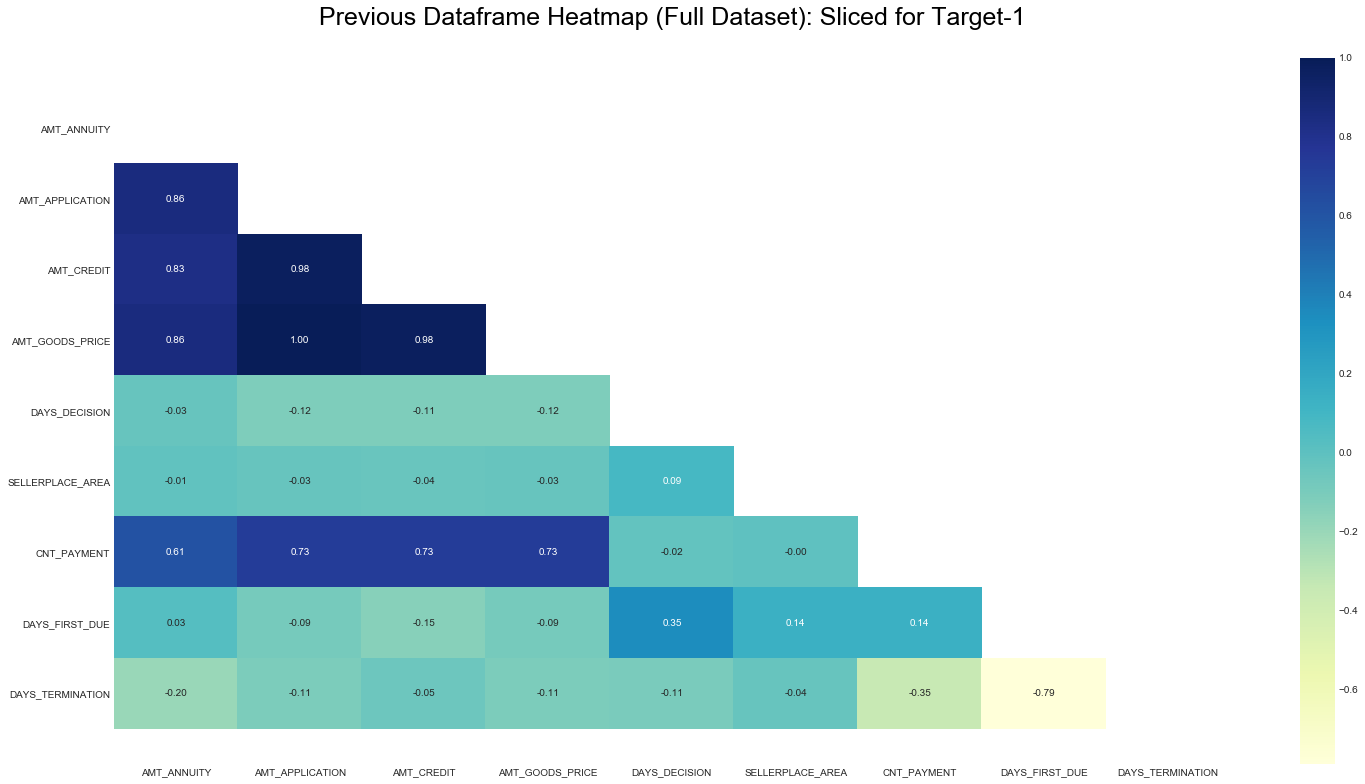

Top 20 Correlations based on ABS(CORRELATION MATRIX)

AMT_GOODS_PRICE   AMT_APPLICATION     0.999713
                  AMT_CREDIT          0.975443
AMT_APPLICATION   AMT_CREDIT          0.975289
AMT_ANNUITY       AMT_GOODS_PRICE     0.857787
                  AMT_APPLICATION     0.857558
AMT_CREDIT        AMT_ANNUITY         0.831855
DAYS_FIRST_DUE    DAYS_TERMINATION    0.791223
AMT_APPLICATION   CNT_PAYMENT         0.733350
CNT_PAYMENT       AMT_GOODS_PRICE     0.732945
AMT_CREDIT        CNT_PAYMENT         0.731559
AMT_ANNUITY       CNT_PAYMENT         0.614534
DAYS_DECISION     DAYS_FIRST_DUE      0.347452
CNT_PAYMENT       DAYS_TERMINATION    0.347401
AMT_ANNUITY       DAYS_TERMINATION    0.197176
AMT_CREDIT        DAYS_FIRST_DUE      0.146877
SELLERPLACE_AREA  DAYS_FIRST_DUE      0.141657
DAYS_FIRST_DUE    CNT_PAYMENT         0.140153
DAYS_DECISION     AMT_GOODS_PRICE     0.115322
AMT_APPLICATION   DAYS_DECISION       0.115243
DAYS_DECISION     AMT_CREDIT          0.114982
dtype:

In [305]:
heatmap_plot_print('Previous Dataframe Heatmap (Full Dataset): Sliced for Target-1', prev_new_1, num_cols_2,20)

<h2 style = color:red> 10. Merging of Application Data with Previous Application Data

Since the previous appplications dataframe is huge, it is not feasible to do a full merge. We so far extracted useful insights from previous dataframe by slicing it based on Target-1 SK_ID_CURR since that was our focus of the study. This was done based on FULL PREVIOUS DATAFRAME sliced based on Target.1 of SK_ID_CURR from Applications dataframe.

Next we will merge previous dataframe with sample taken from applications dataframe. This will help us to be sure that no useful information is lost.

In [306]:
# Sample of Applications Dataframe

app_new_select_train = app_new_select.sample(3000)

## 10.1 Data Imbalance Study

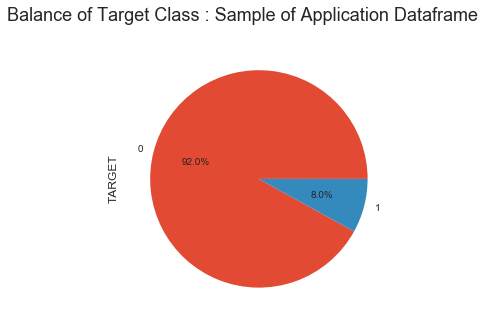

In [307]:
# Cross check on data imbalance if it is equal to what we had with full applications dataframe

fig = plt.figure(figsize = (18,5))
fig.suptitle('Balance of Target Class : Sample of Application Dataframe', fontsize = 18)
app_new_select_train['TARGET'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.show()

We see that the data imbalance from full applications dataframe is carried over into sample applications dataframe as expected

In [308]:
# Merge Sample Applications with Previous Dataframe

prev_new_train = app_new_select_train.merge (prev_new, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how = 'inner')

In [309]:
# Print Shape of the sample dataframes at the start of data analysis for merged previous dataframe

print ('Shape of Appplications Dataframe Sampled: ', app_new_select_train.shape)
print ('Shape of Merged Previous Applications Dataframe: ', prev_new_train.shape)

Shape of Appplications Dataframe Sampled:  (3000, 49)
Shape of Merged Previous Applications Dataframe:  (13481, 78)


In [310]:
prev_new_train.isna().sum().sort_values(ascending=False)

AMT_APPLICATION_RANGE     0
EXT_SOURCE_2              0
FLAG_EMAIL                0
FLAG_CONT_MOBILE          0
OCCUPATION_TYPE           0
                         ..
AMT_APPLICATION           0
AMT_CREDIT_y              0
AMT_GOODS_PRICE_y         0
NAME_CASH_LOAN_PURPOSE    0
SK_ID_CURR                0
Length: 78, dtype: int64

No missing values in merged dataframe for previous data

In [311]:
# Split the dataframe into Target-1 and Target-2
prev_new_train_1 = prev_new_train.loc[prev_new_train['TARGET'] == 1]
prev_new_train_0 = prev_new_train.loc[prev_new_train['TARGET'] == 0]
print ('Shape Target-1 in Merged Previous Dataframe (Clients with payment difficulties): ', prev_new_train_1.shape)
print ('Shape Target-0 in Merged Previous Dataframe (Clients in all other cases):        ', prev_new_train_0.shape)

Shape Target-1 in Merged Previous Dataframe (Clients with payment difficulties):  (1119, 78)
Shape Target-0 in Merged Previous Dataframe (Clients in all other cases):         (12362, 78)


## 10.2 Univariate Analysis

In [312]:
# Since there will be lot of barcharts to create, here is a function to handle this effectively

def prev_barplots_compare (item):
    font1 = 22
    font2 = 18
    font3 = 16
    plot_1 = prev_new_train_1[item].value_counts(normalize = True)*100
    plot_0 = prev_new_train_0[item].value_counts(normalize = True)*100

    plt.style.use('seaborn-whitegrid')
    %matplotlib inline

    fig = plt.figure(figsize = (18,8))
    fig.suptitle('Merged Previous Data', fontsize=font1)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, sharey = ax1)

    plt.subplot(ax1)
    sns.barplot(x=plot_0.index, y=plot_0.values, palette='tab10')
    title_text = 'Target-0' + ' - ' + item
    plt.title(title_text, fontsize=font2)
    plt.xlabel(item, fontsize=font3)
    plt.ylabel('Percentage', fontsize=font3)
    plt.xticks(rotation=90, fontsize=font3)
    plt.yticks(fontsize=font3)

    plt.subplot(ax2)
    sns.barplot(x=plot_1.index, y=plot_1.values, palette='tab10')
    title_text = 'Target-1' + ' - ' + item
    plt.title(title_text, fontsize=font2)
    plt.xlabel(item, fontsize=font3)
    plt.ylabel('Percentage', fontsize=font3)
    plt.xticks(rotation=90, fontsize=font3)
    plt.yticks(fontsize=font3)

    plt.show()
    return

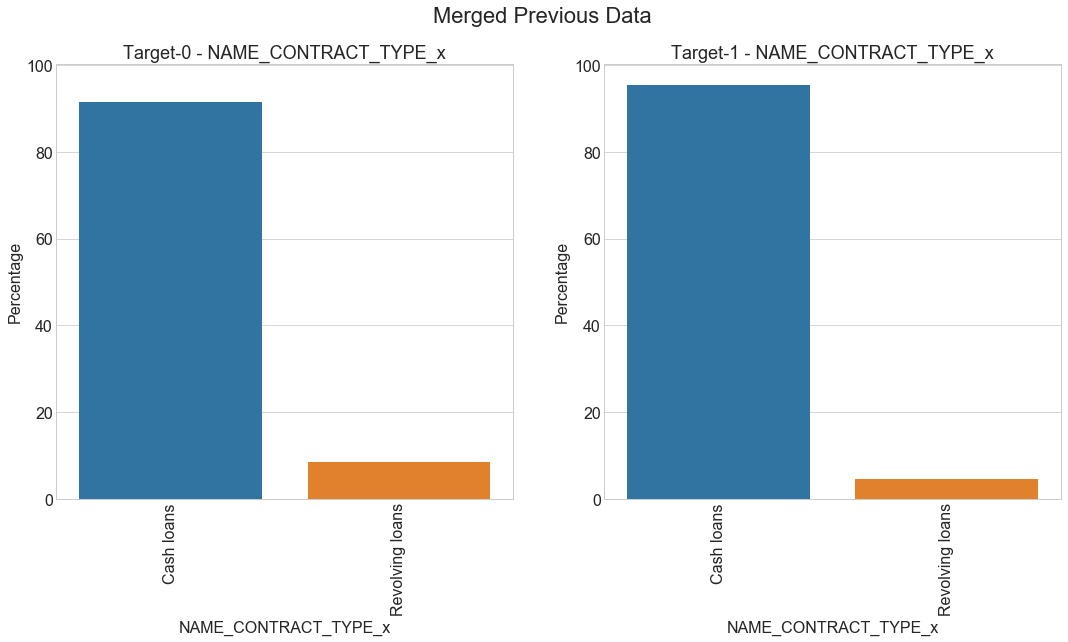

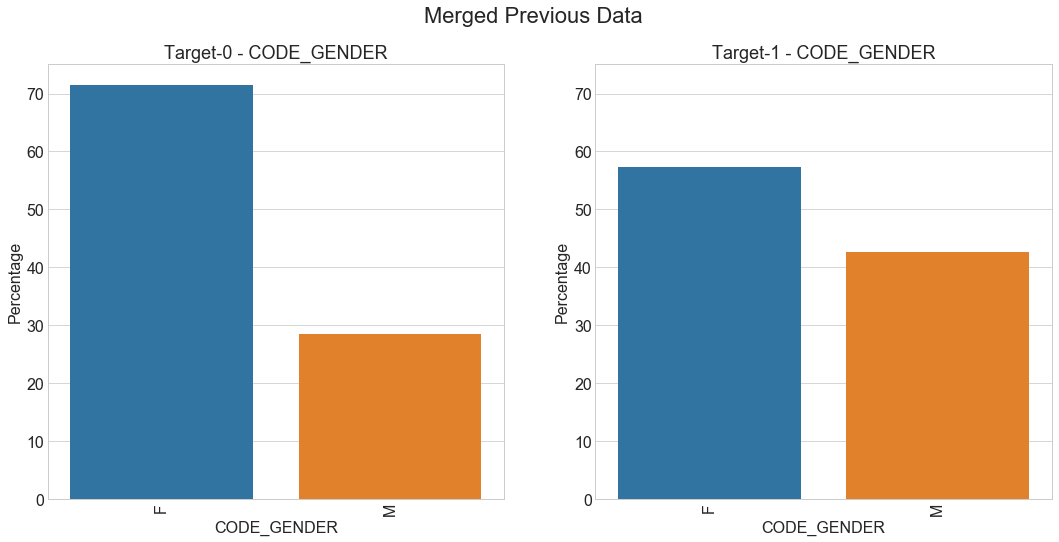

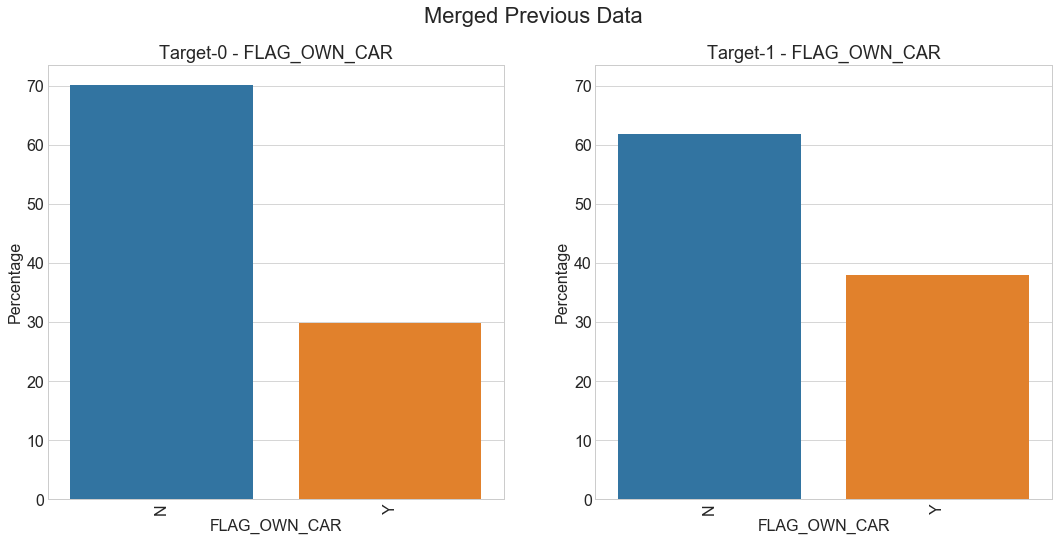

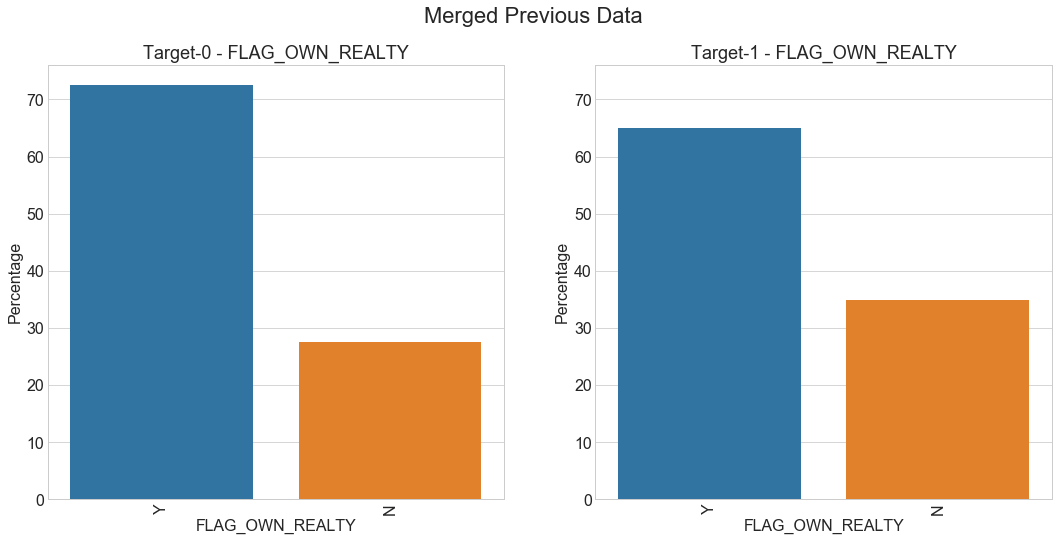

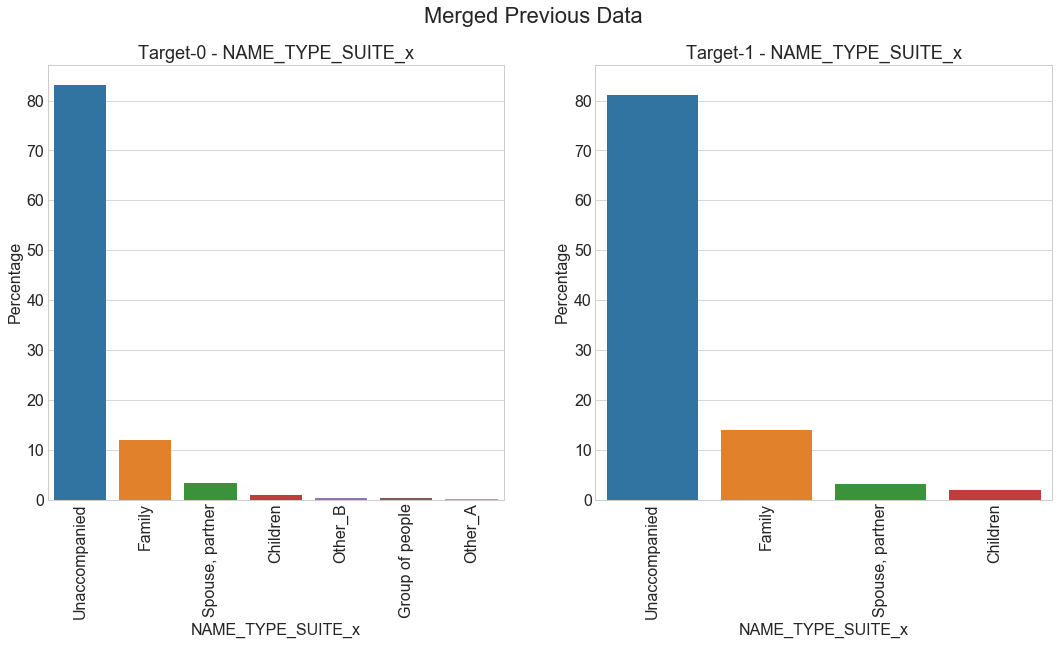

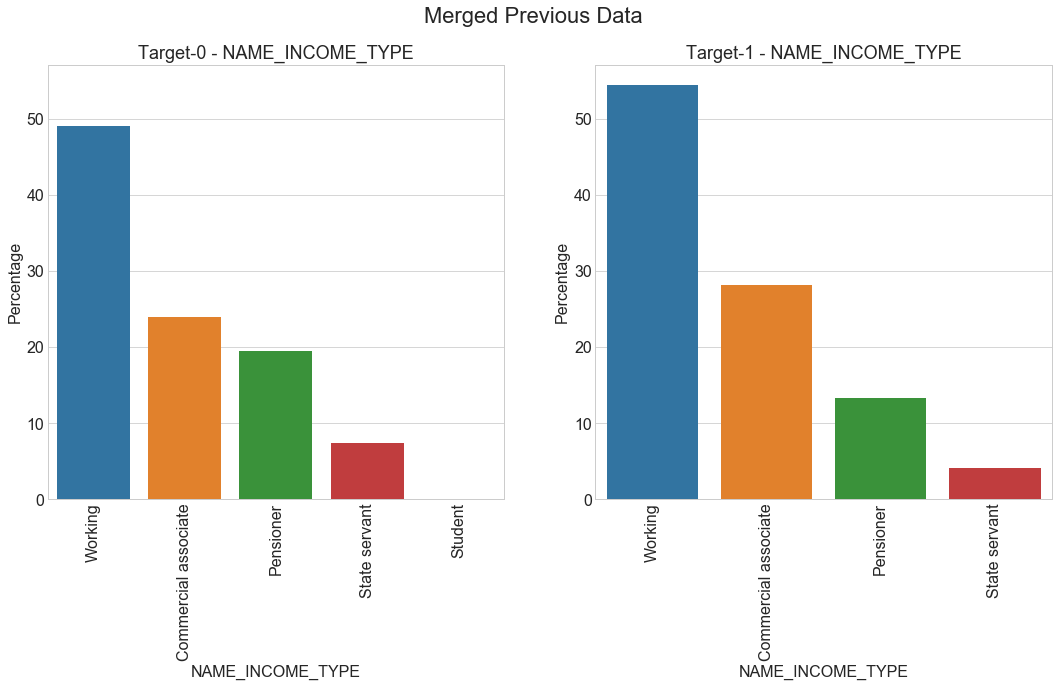

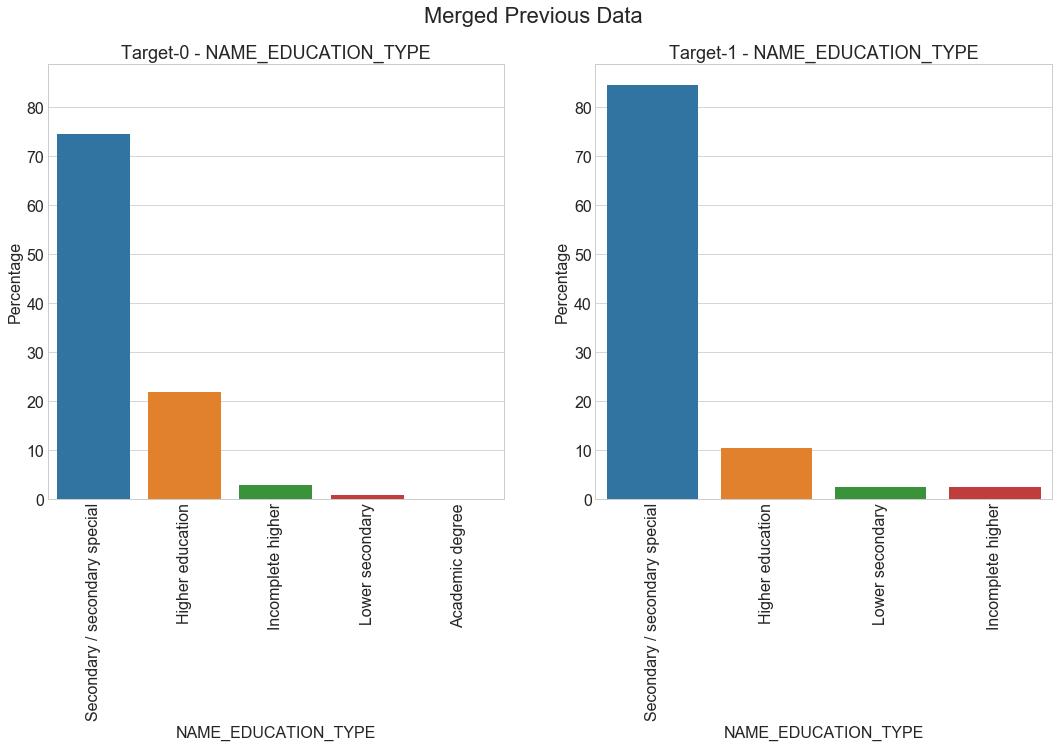

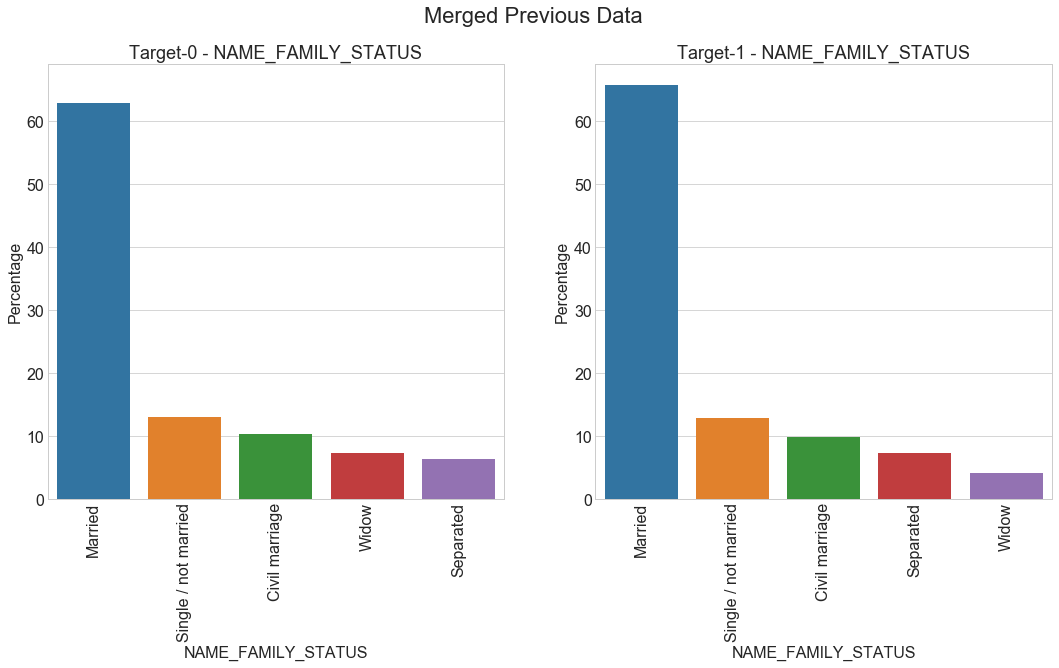

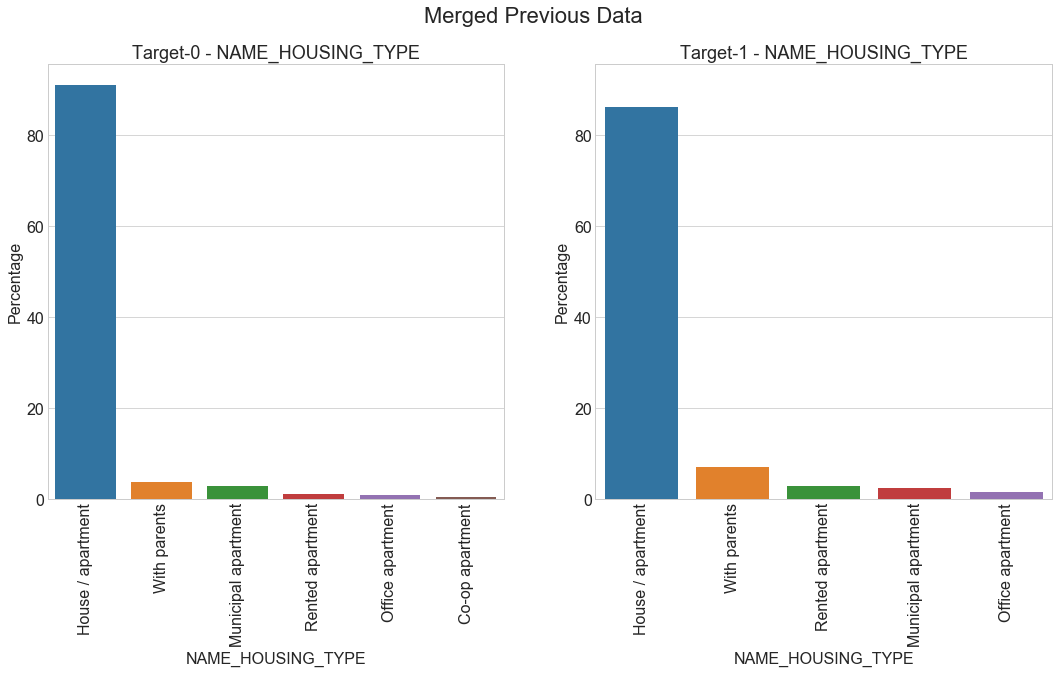

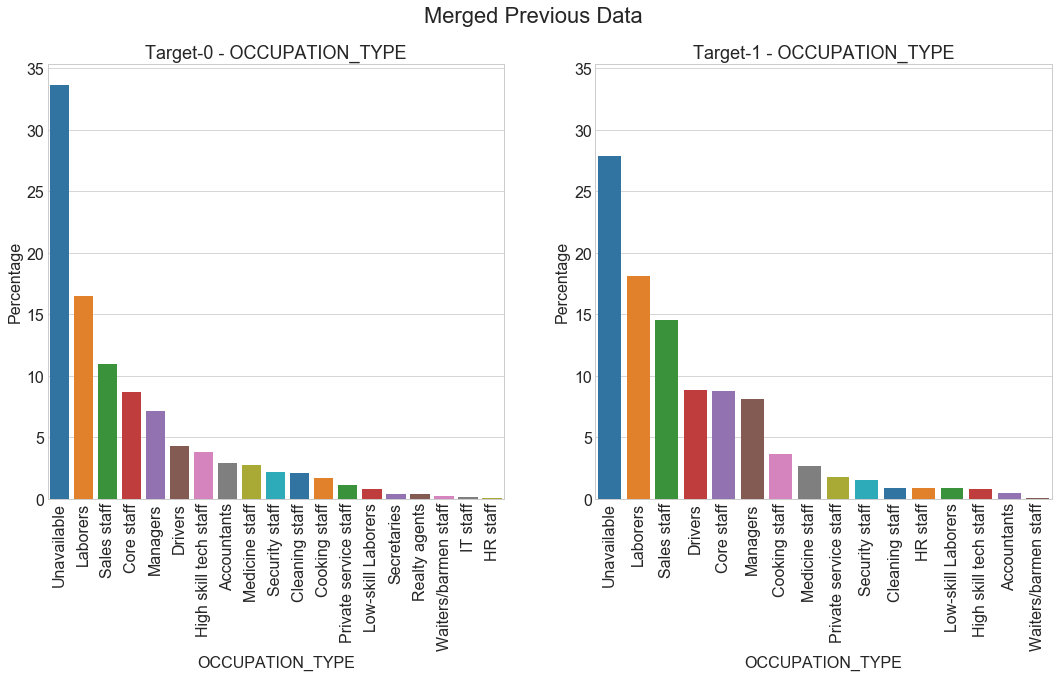

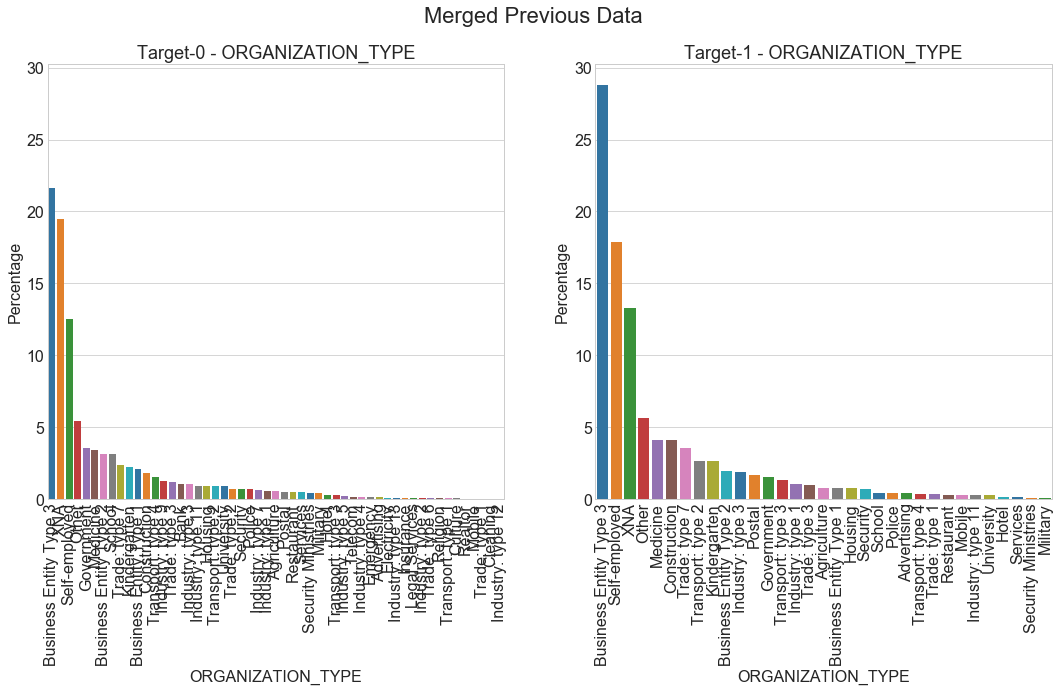

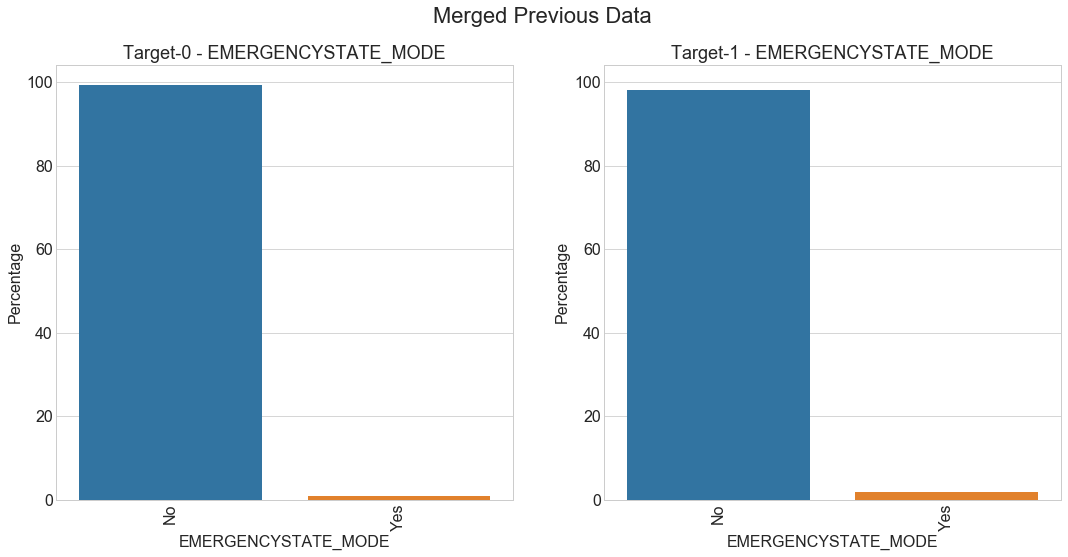

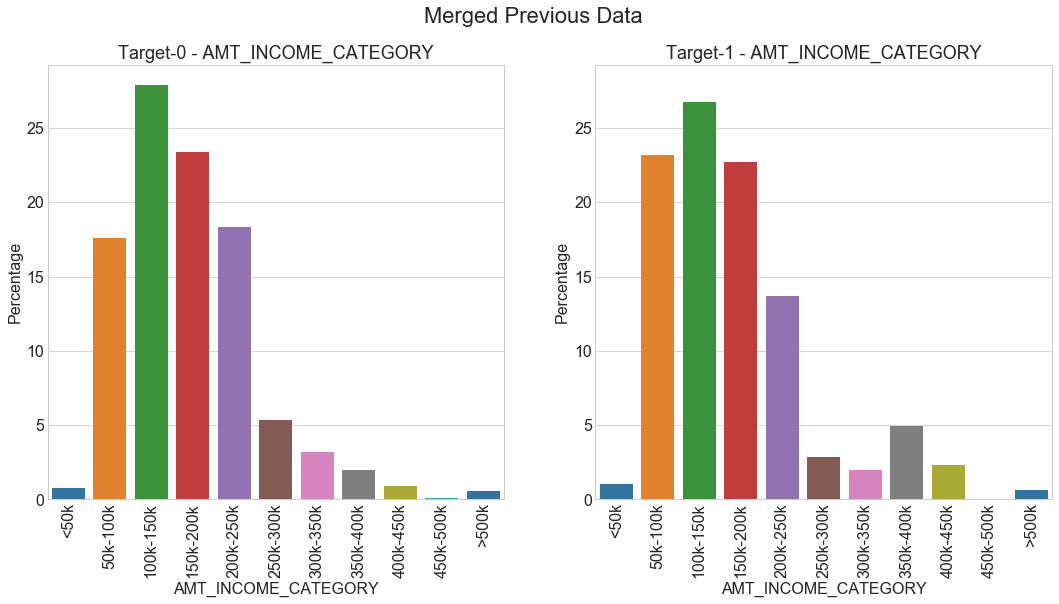

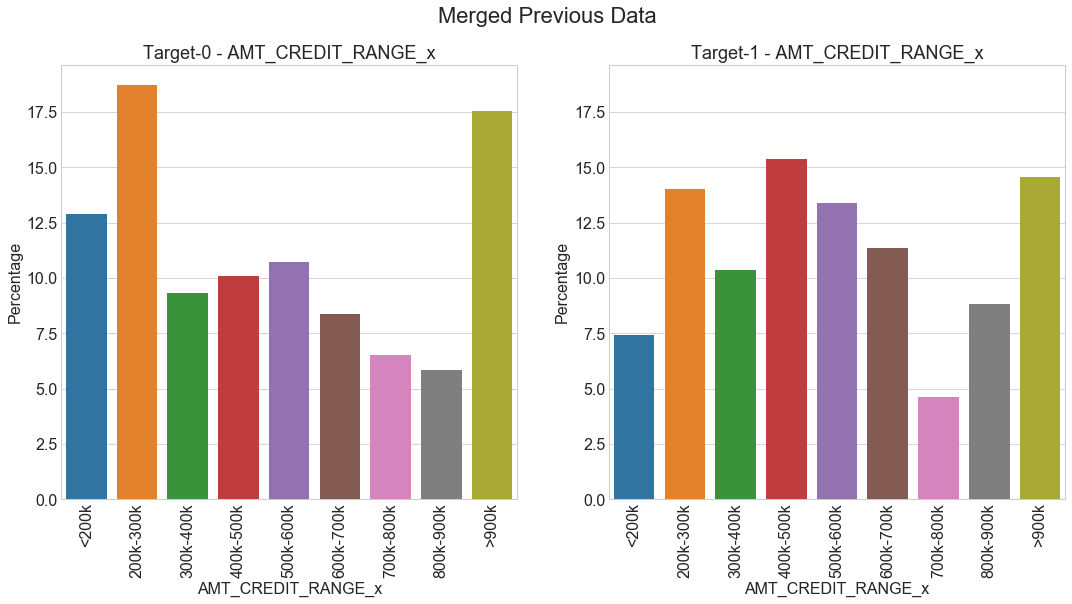

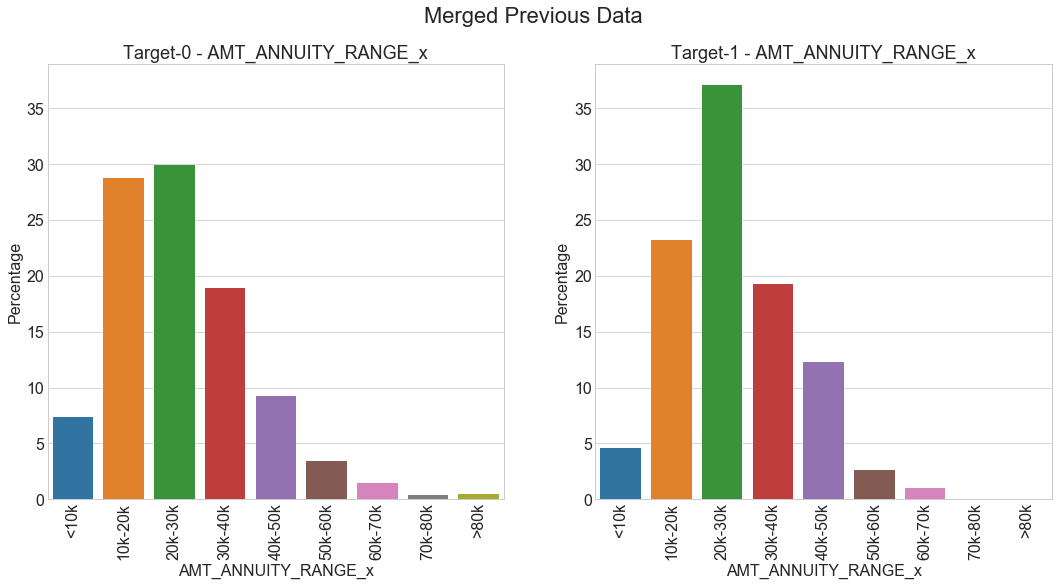

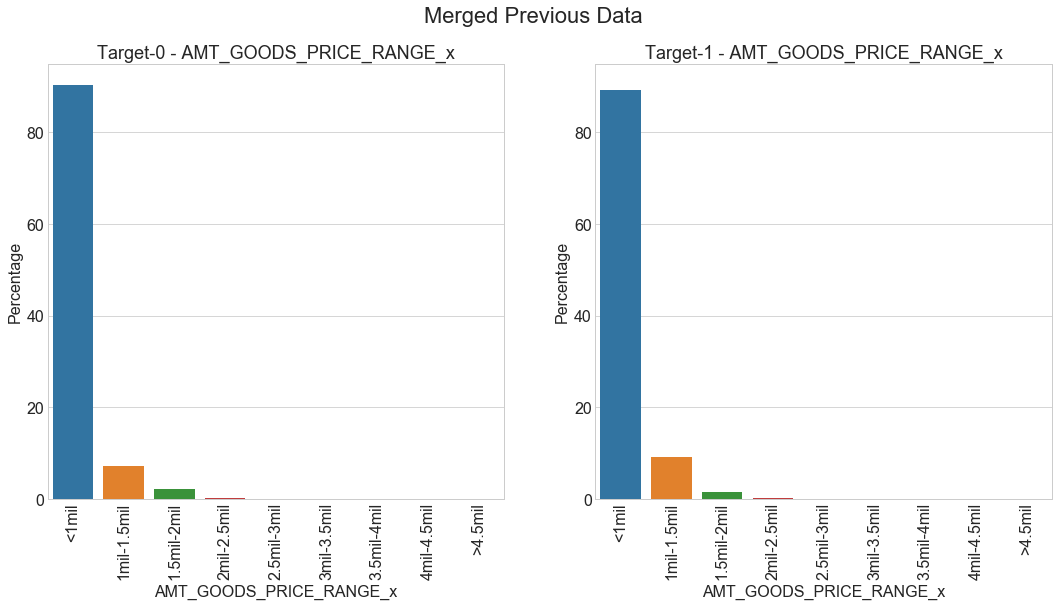

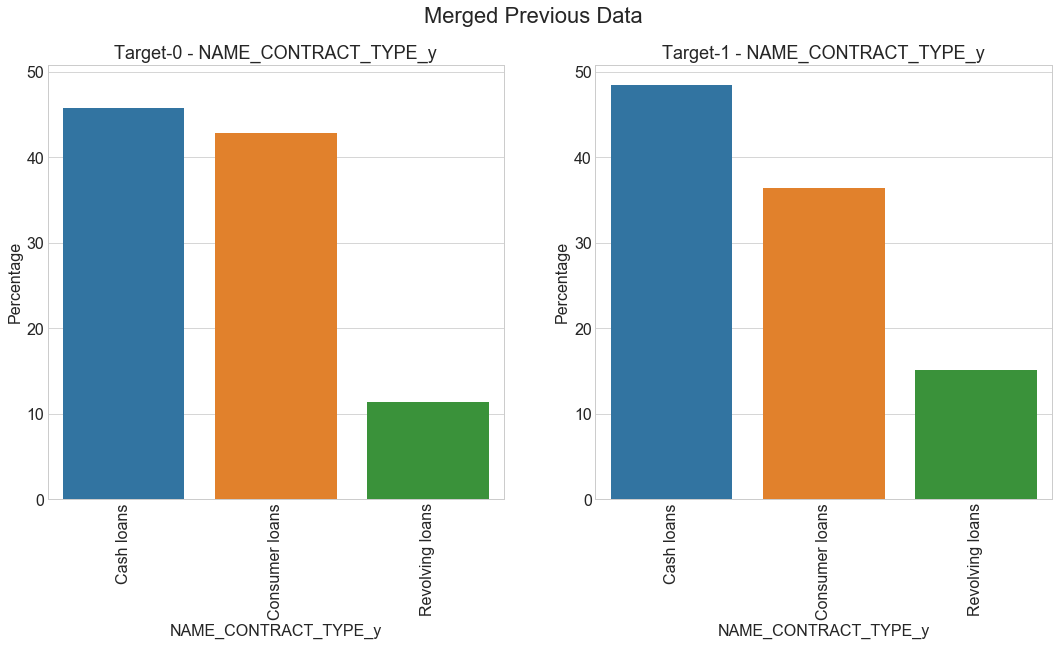

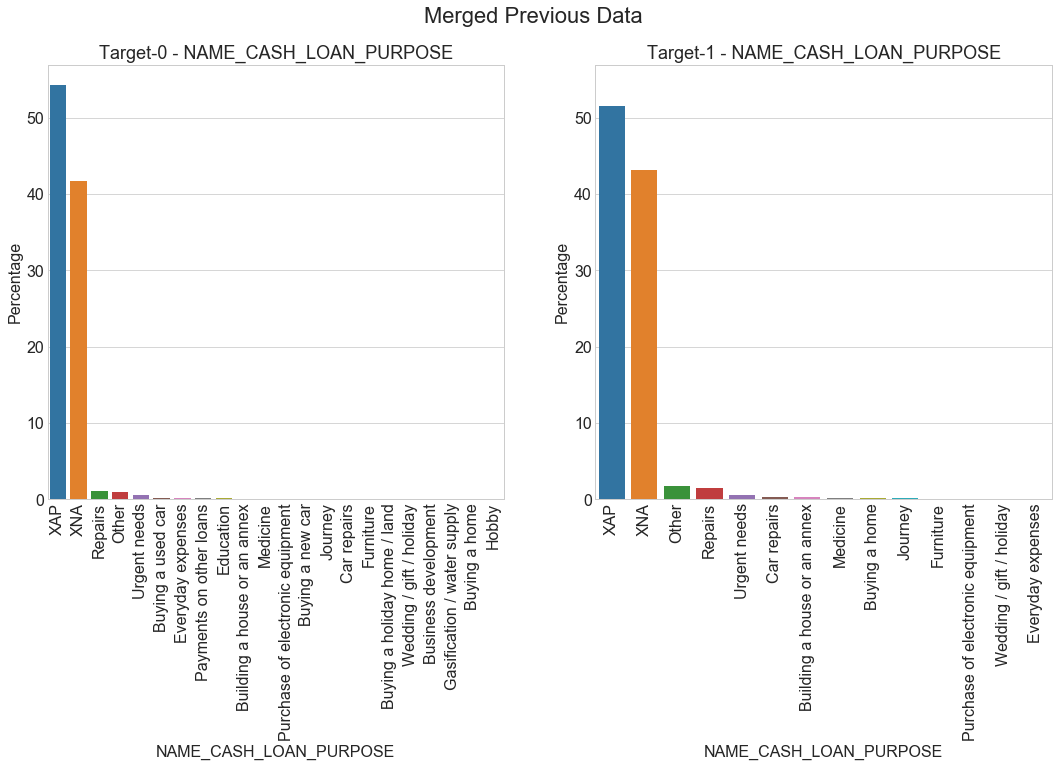

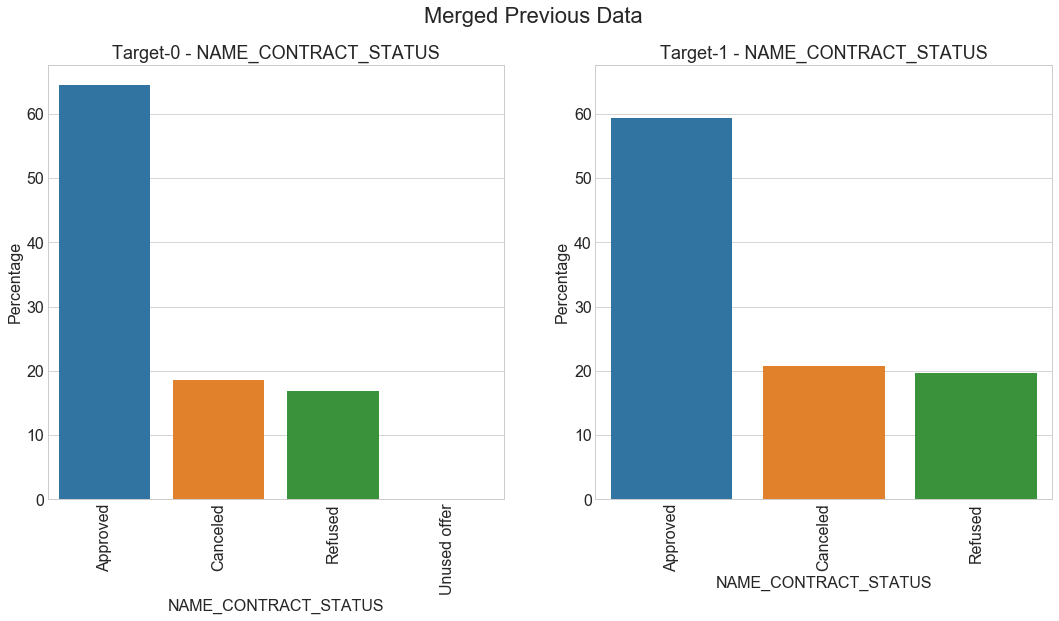

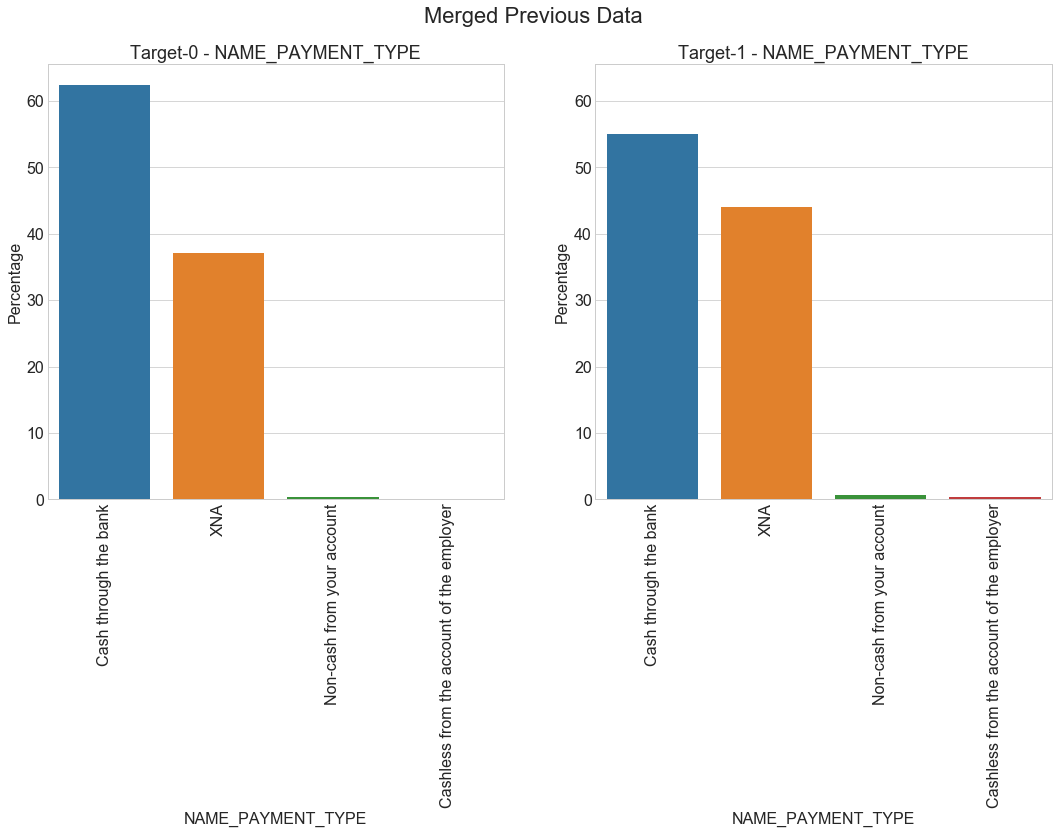

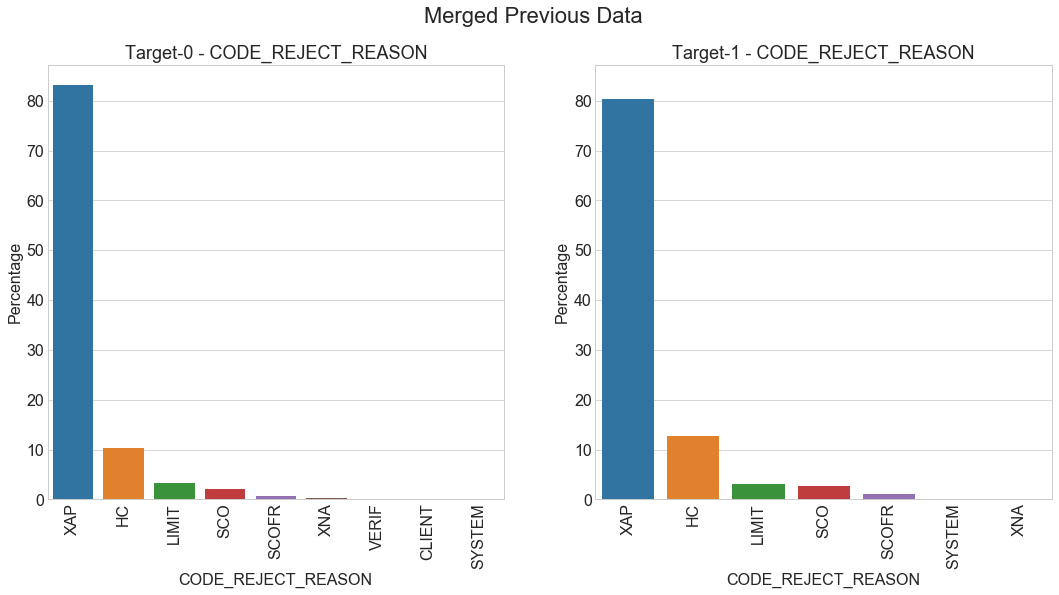

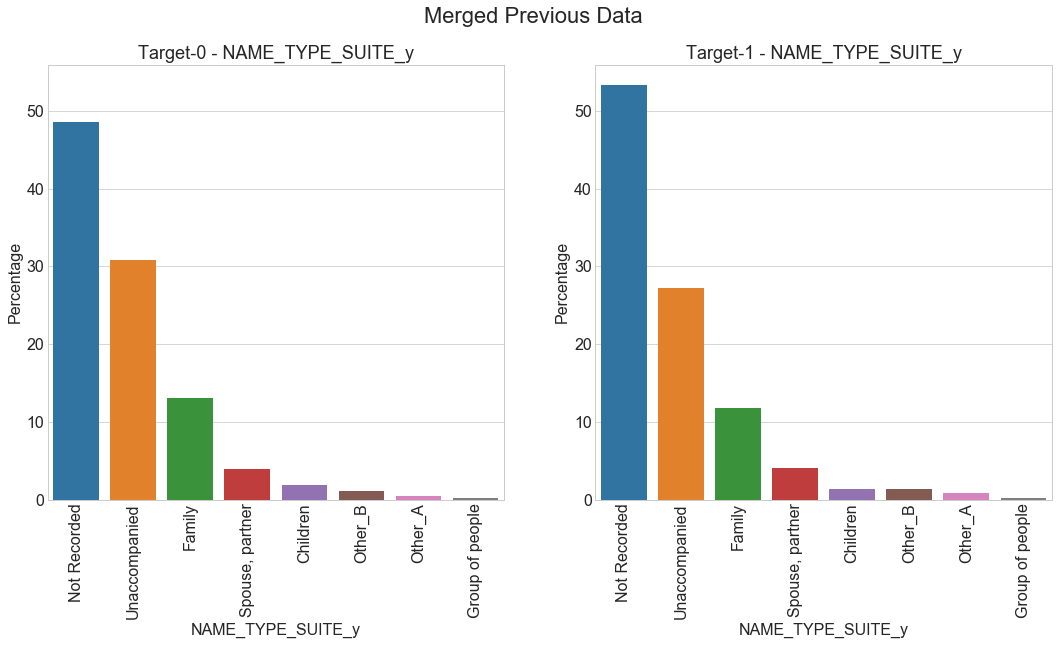

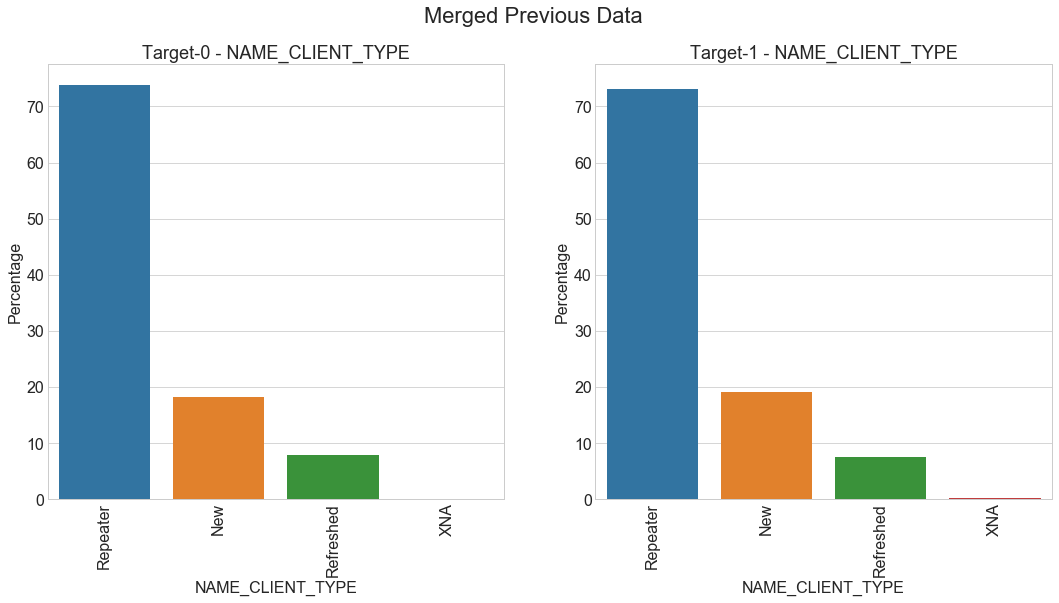

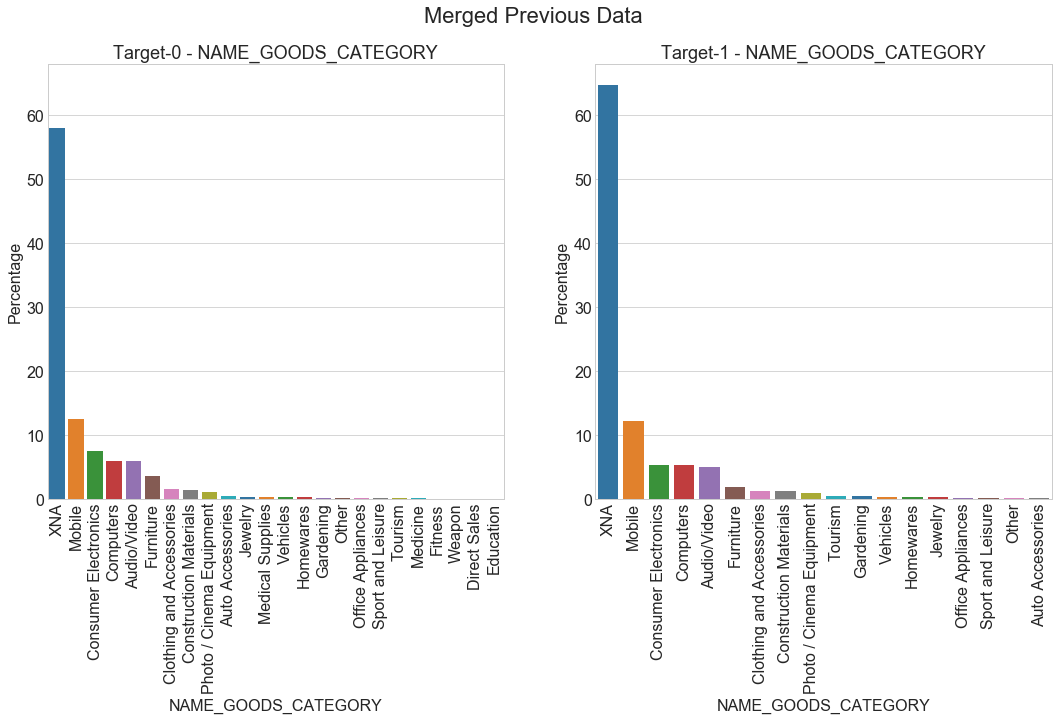

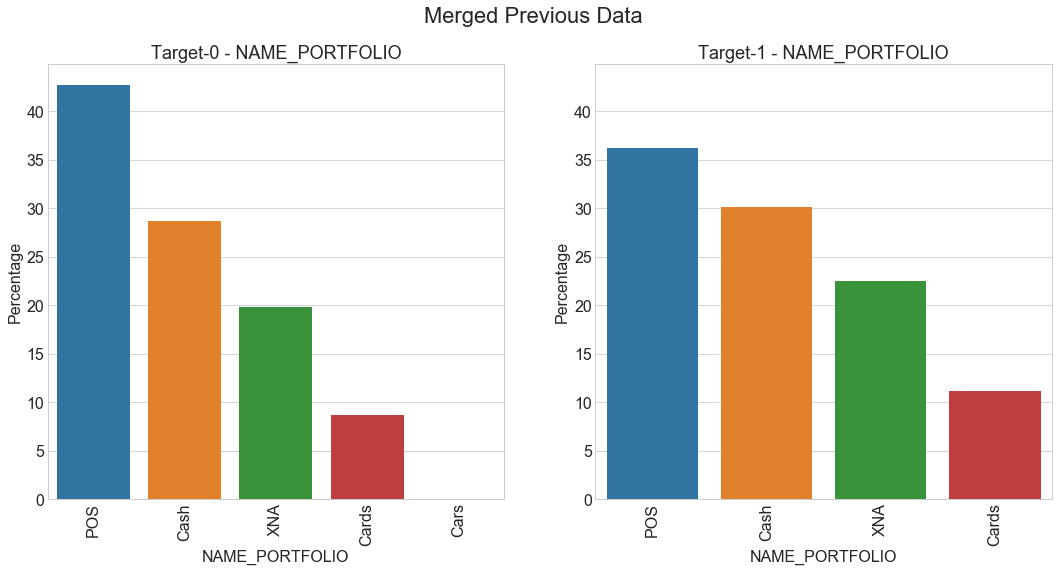

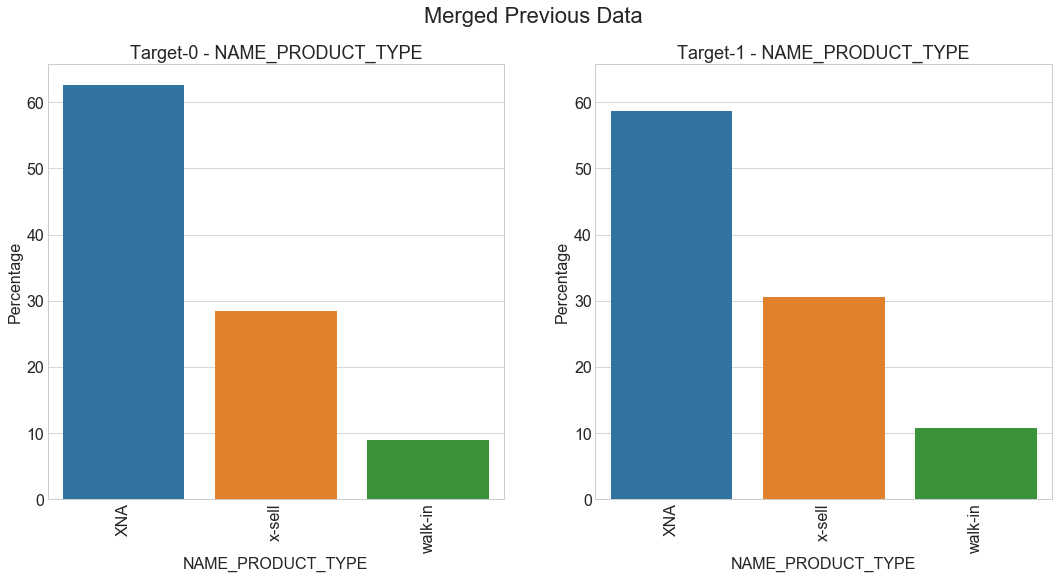

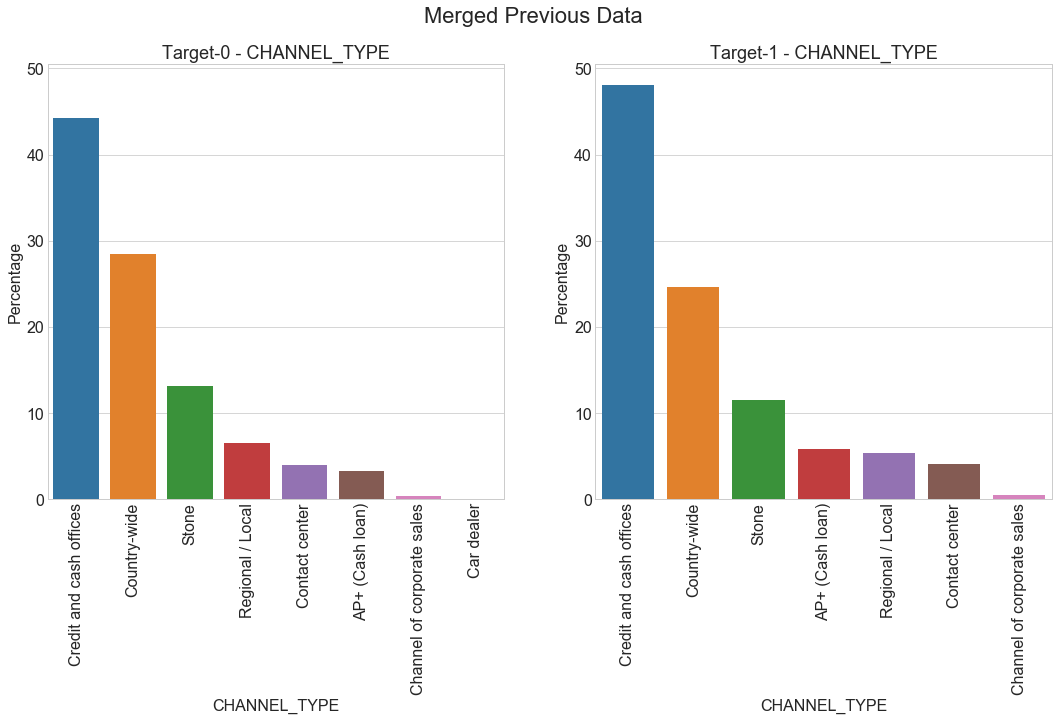

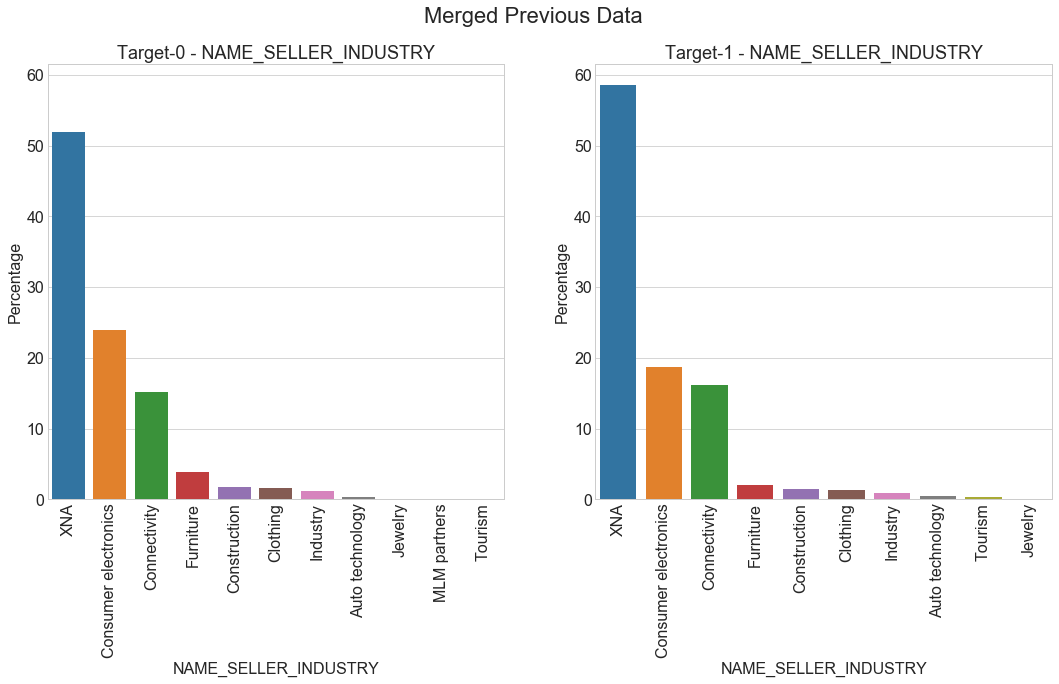

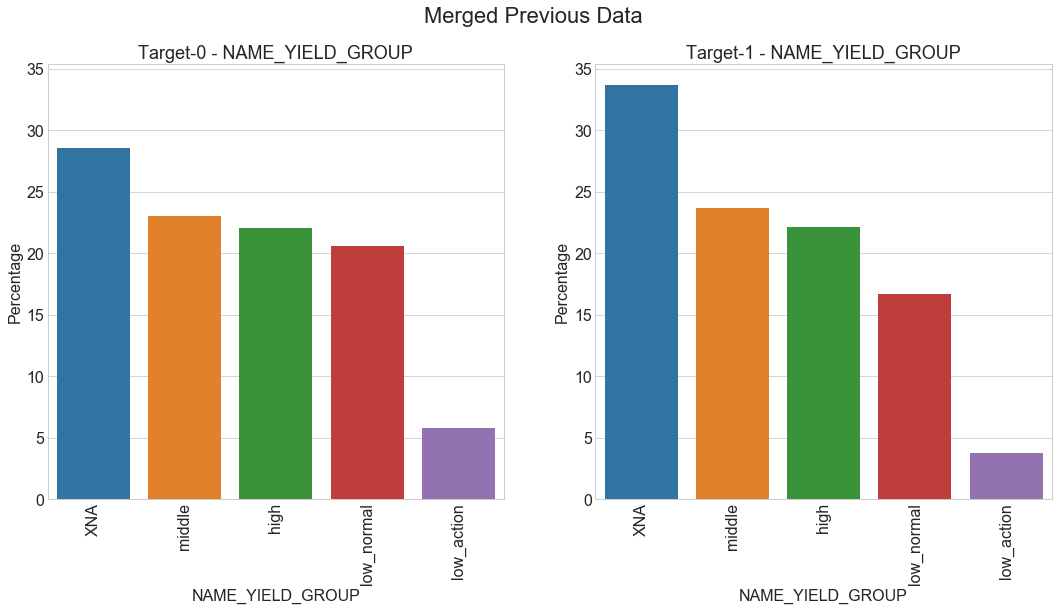

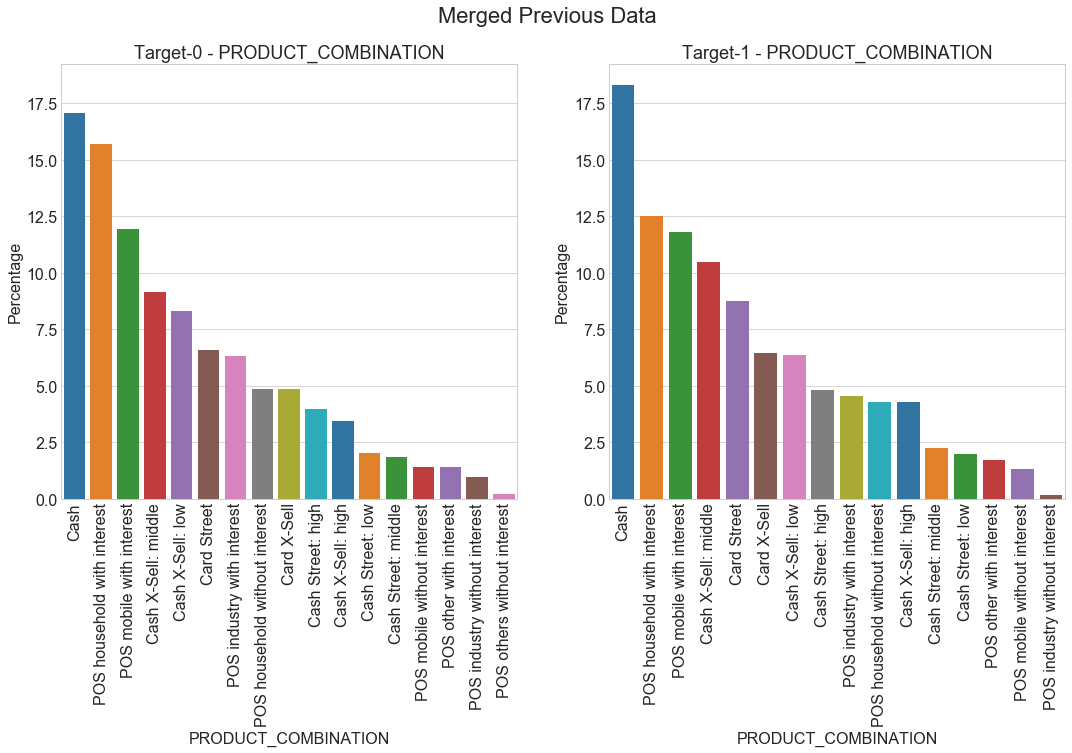

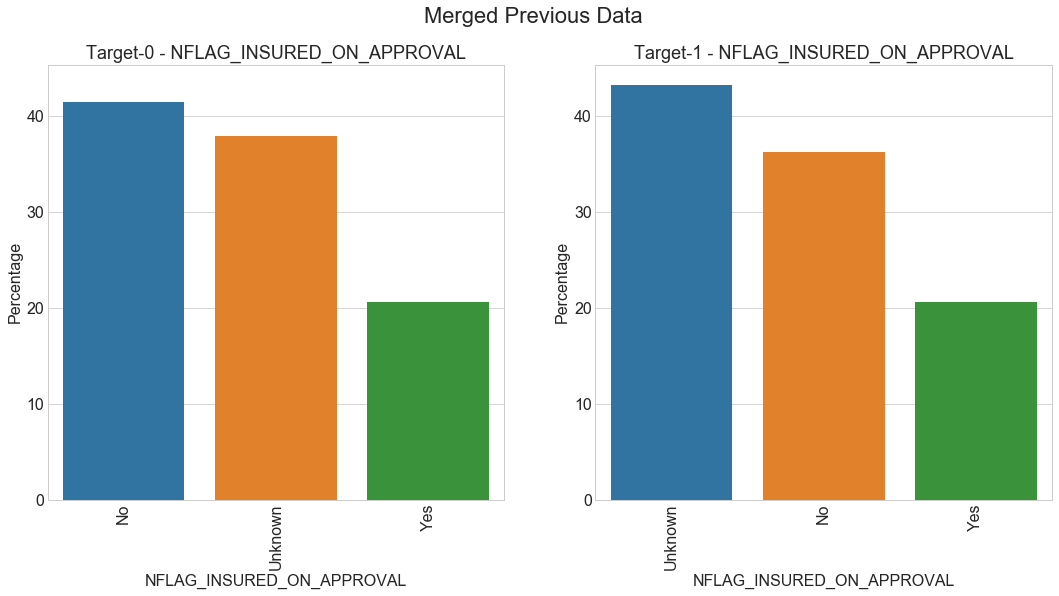

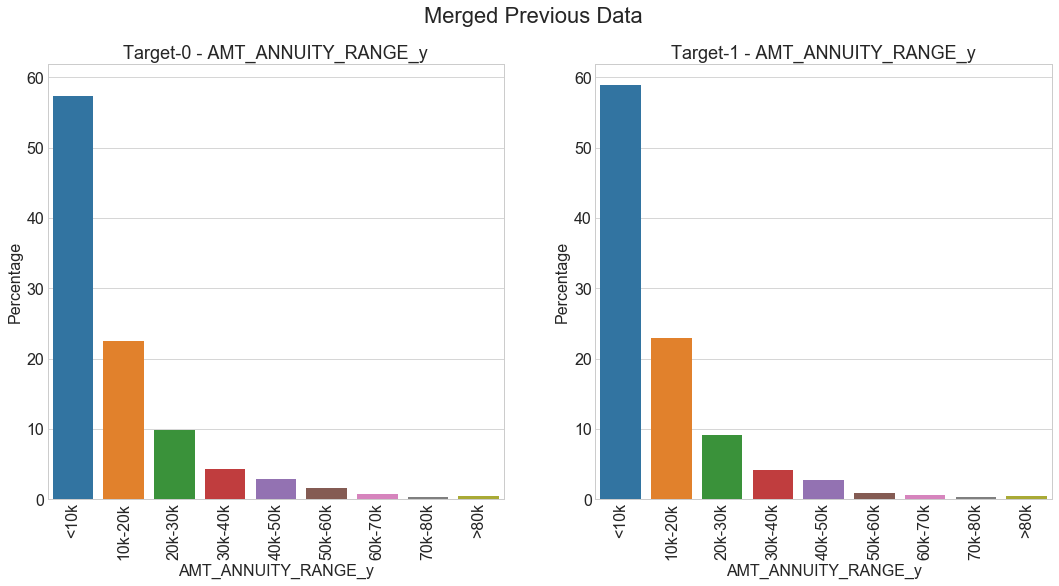

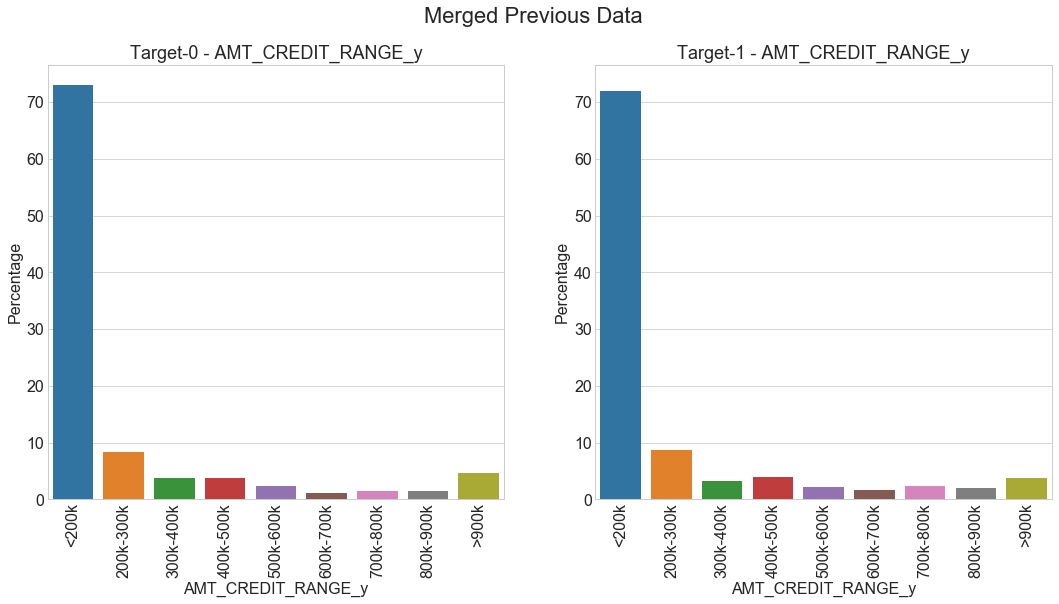

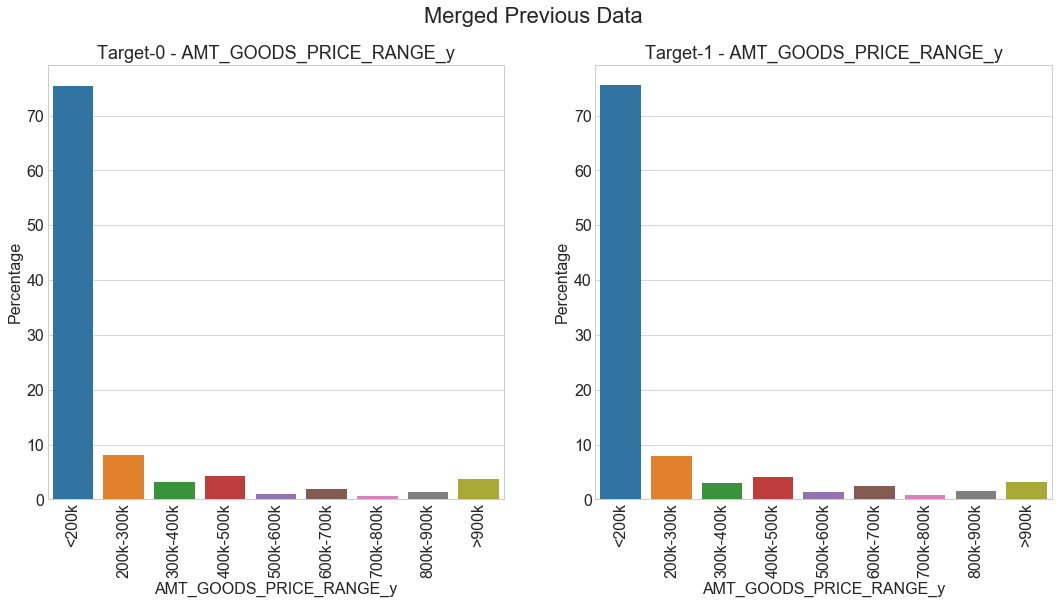

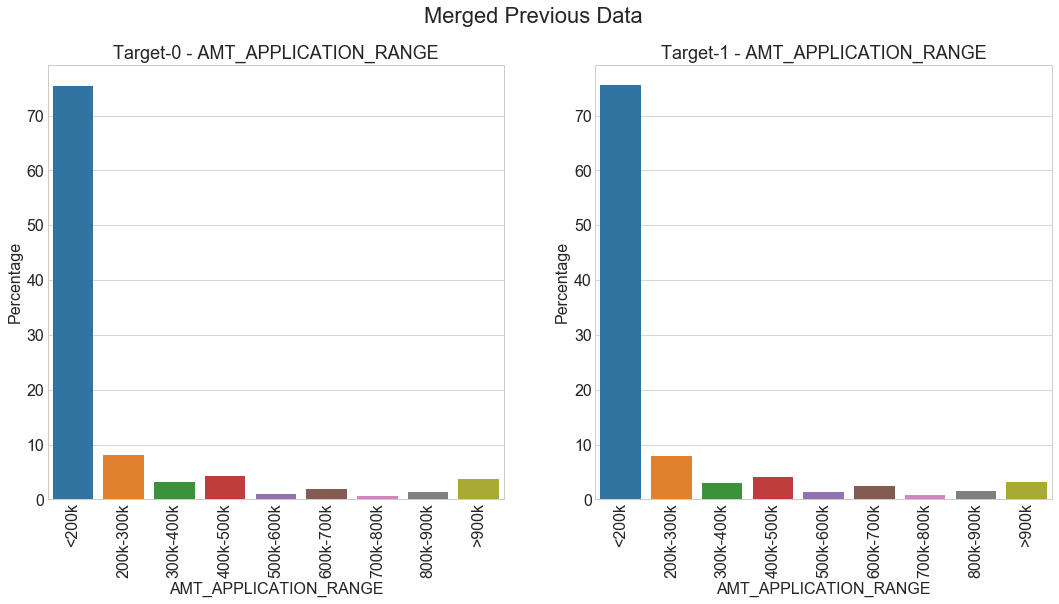

In [313]:
# Univariate Analysis of Merged Previous Dataframe

for item in list(prev_new_train.select_dtypes(include=['object','category']).columns):
    prev_barplots_compare(item)

## 10.3 Multivariate Analysis

In [314]:
num_cols_3 = list(prev_new_train.select_dtypes(exclude=['object','category']).columns)
for elem in ['SK_ID_CURR','TARGET','FLAG_CONT_MOBILE', 'FLAG_EMAIL','SK_ID_PREV','AMT_REQ_CREDIT_BUREAU_DAY']:
    num_cols_3.remove(elem)
print(num_cols_3)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DUE', 'DAYS_TERMINATION']


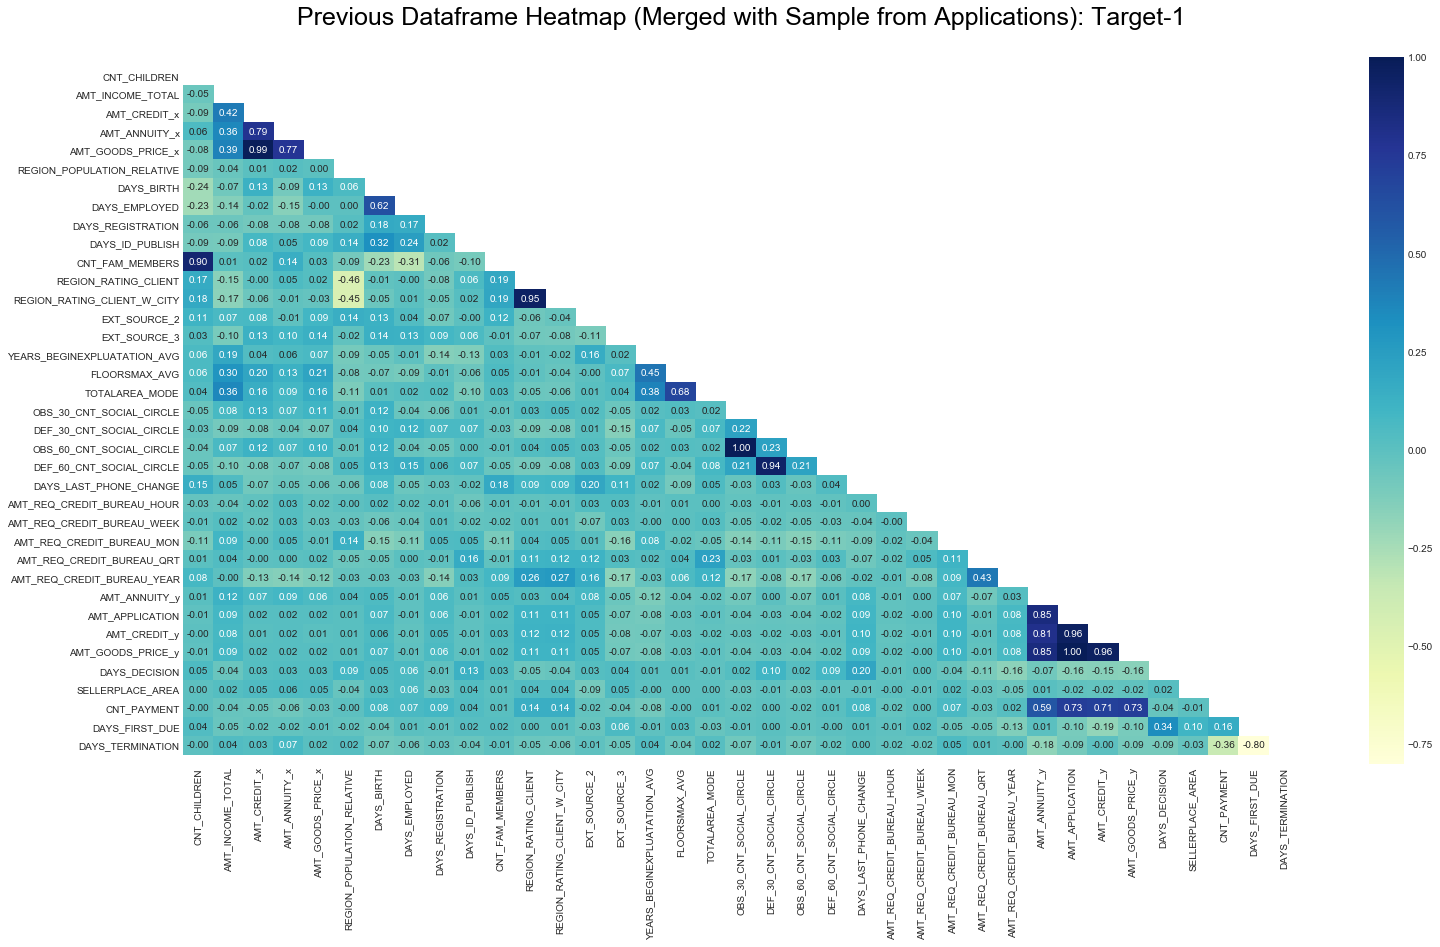

Top 20 Correlations based on ABS(CORRELATION MATRIX)

OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.999101
AMT_CREDIT_x                AMT_GOODS_PRICE_x              0.987344
AMT_GOODS_PRICE_y           AMT_CREDIT_y                   0.962432
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.952182
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.939252
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.903610
AMT_ANNUITY_y               AMT_APPLICATION                0.854435
                            AMT_CREDIT_y                   0.806773
DAYS_TERMINATION            DAYS_FIRST_DUE                 0.800285
AMT_CREDIT_x                AMT_ANNUITY_x                  0.785712
AMT_GOODS_PRICE_x           AMT_ANNUITY_x                  0.768499
AMT_GOODS_PRICE_y           CNT_PAYMENT                    0.725101
CNT_PAYMENT                 AMT_CREDIT_y                   0.708663
TOTALAREA_MODE              FLOORSMAX_AVG                  0.6

In [315]:
heatmap_plot_print('Previous Dataframe Heatmap (Merged with Sample from Applications): Target-1', prev_new_train_1, num_cols_3,20)

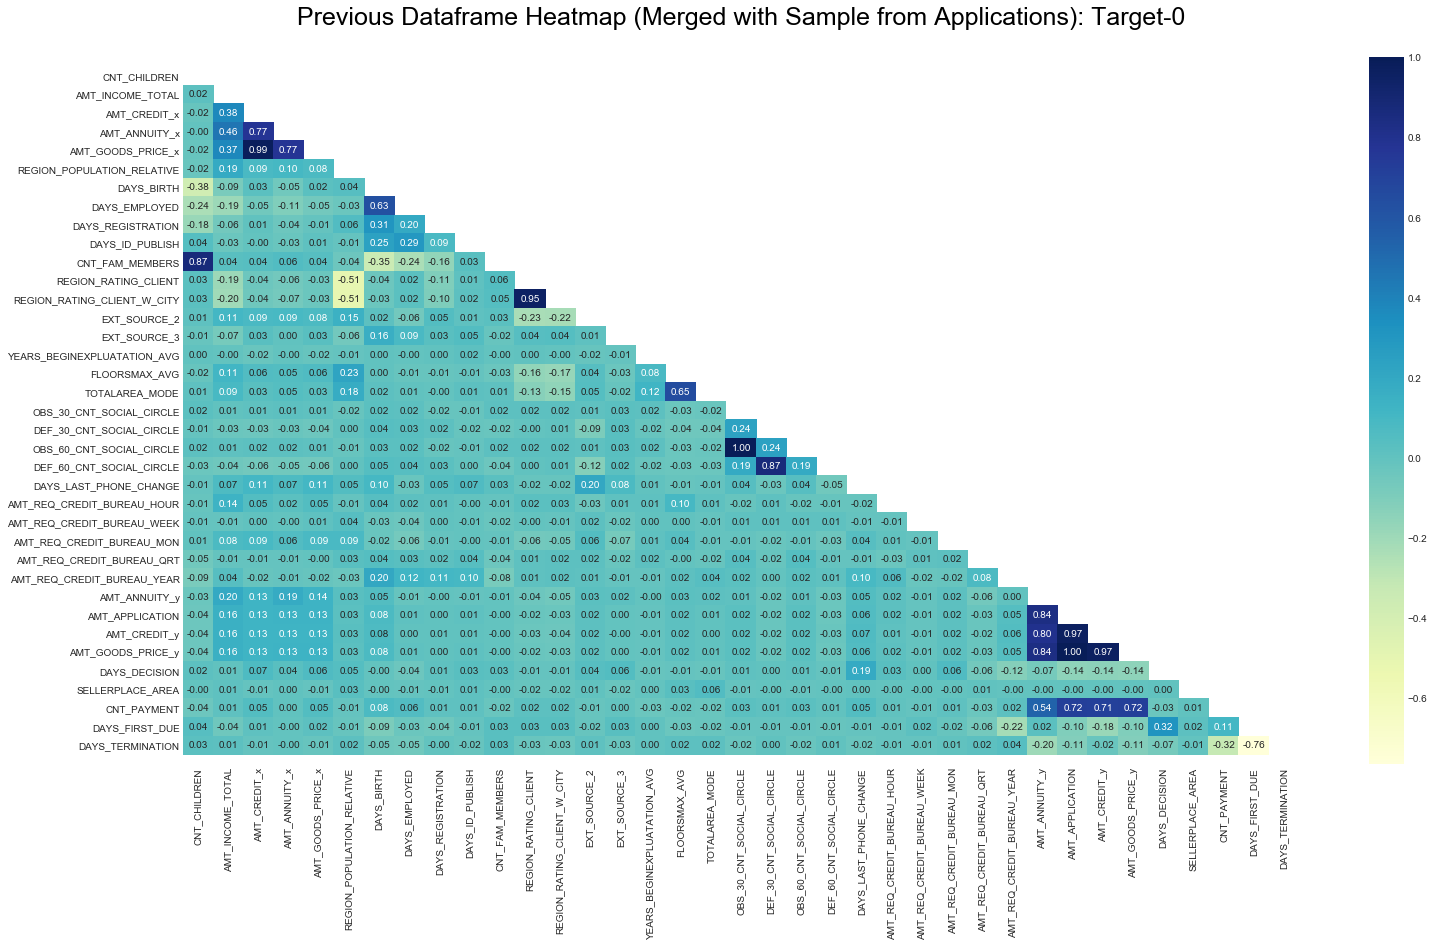

Top 20 Correlations based on ABS(CORRELATION MATRIX)

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998328
AMT_GOODS_PRICE_x            AMT_CREDIT_x                   0.985877
AMT_CREDIT_y                 AMT_GOODS_PRICE_y              0.971802
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.952786
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.874056
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.871011
AMT_ANNUITY_y                AMT_GOODS_PRICE_y              0.839793
                             AMT_CREDIT_y                   0.802568
AMT_GOODS_PRICE_x            AMT_ANNUITY_x                  0.774744
AMT_ANNUITY_x                AMT_CREDIT_x                   0.772757
DAYS_FIRST_DUE               DAYS_TERMINATION               0.763492
AMT_GOODS_PRICE_y            CNT_PAYMENT                    0.722078
AMT_CREDIT_y                 CNT_PAYMENT                    0.711415
TOTALAREA_MODE               FLOORSMAX_AVG       

In [316]:
heatmap_plot_print('Previous Dataframe Heatmap (Merged with Sample from Applications): Target-0', prev_new_train_0, num_cols_3,20)

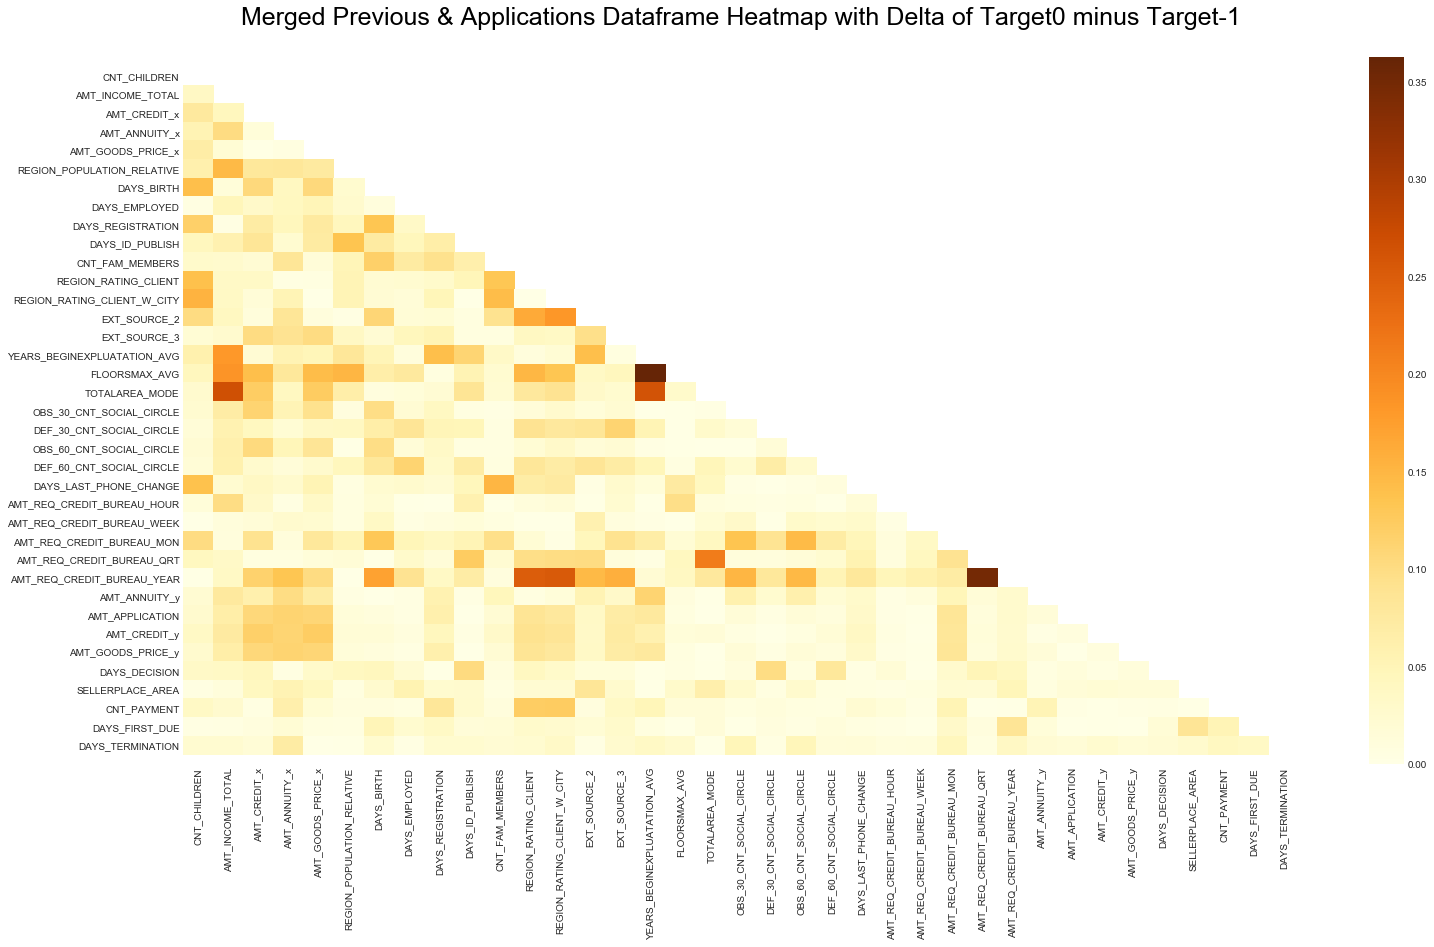

Top 20 Correlations based on DELTA OF CORRELATION MATRIX of TARGET_0 MINUS TARGET_1 (ABS))

FLOORSMAX_AVG                YEARS_BEGINEXPLUATATION_AVG    0.362652
AMT_REQ_CREDIT_BUREAU_QRT    AMT_REQ_CREDIT_BUREAU_YEAR     0.349673
TOTALAREA_MODE               AMT_INCOME_TOTAL               0.267064
YEARS_BEGINEXPLUATATION_AVG  TOTALAREA_MODE                 0.263279
AMT_REQ_CREDIT_BUREAU_YEAR   REGION_RATING_CLIENT_W_CITY    0.253820
REGION_RATING_CLIENT         AMT_REQ_CREDIT_BUREAU_YEAR     0.249380
AMT_REQ_CREDIT_BUREAU_QRT    TOTALAREA_MODE                 0.213742
FLOORSMAX_AVG                AMT_INCOME_TOTAL               0.186770
EXT_SOURCE_2                 REGION_RATING_CLIENT_W_CITY    0.182780
YEARS_BEGINEXPLUATATION_AVG  AMT_INCOME_TOTAL               0.181950
AMT_REQ_CREDIT_BUREAU_YEAR   DAYS_BIRTH                     0.172219
REGION_RATING_CLIENT         EXT_SOURCE_2                   0.163284
AMT_REQ_CREDIT_BUREAU_YEAR   EXT_SOURCE_3                   0.158278
REGION_RATI

In [317]:
delta_heatmap_plot_print('Merged Previous & Applications Dataframe Heatmap with Delta of Target0 minus Target-1', prev_new_train_0, prev_new_train_1, num_cols_3,20)

<h2 style = color:red> 11. Insights from the EDA for Credit Case Study

### **`Observation:` There is data imbalance in favor of TARGET-0 and significantly less data is available for clients having payment difficulty**
*Only 8.1% of the applications data is for client with Target-1, while only 7.3% of previous data is for SK_ID_CURR corresponding to Target-1.*<br>
*Therefore the conclusions on Target-1 should be interpreted carefully* <br>

### **`Insight-1:` The following appear more frequent or popular based on applications data. This is reported in case the bank wants to target clients to increase loan applications:**
*Cash Loans* <br>
*Female applicants* <br>
*People working* <br>
*Married* <br>
*Not living with parents* <br>
*Not owning car* <br>
*Owning real estate* <br>
*People without children* <br>
*Secondary Education level* <br>
*People with income below 200k* <br>
*People with annuity below 30k* <br>
*Employment duration less than 5 years* <br>

### **`Insight-2:` Univariate analysis of application data suggests that Target-1 has increasing trend when compared to Target-0 in terms of % (not favorable to bank, but doesnt mean these category will default !).**
*Male applicant (despite median income of male applicants being slightly higher compared to female applicants)* <br>
*Working people* <br>
*Laborers* <br>
*People who are single* <br>
*People who live with parents* <br>
*People with secondary education level* <br>
*Credit amount in the range of 500k-600k range* <br>
*Goods Price in the range 500k* <br>
*People in the age group 28 to 40 years (about 30 years)* <br>

### **`Insight-3:` Univariate analysis of application data suggests that Target-1 has decreasing trend when compared to Target-0 in terms of % (favorable to bank, but doesnt mean this category will not default !).**
*Female applicant* <br>
*People who are pensioners or state servants* <br>
*Widowers* <br>
*People with higher education* <br>

### **`Insight-4:` DAYS_LAST_PHONE_CHANGE has a trend with Target-1. This is the parameter that says how many days before application did client change phone ?**
*Median value reduces from 3300 days (target-0) to 2800 days (target-1)*<br>

### **`Insight-5:` DAYS_ID_PUBLISH has a trend with Target-1. This is the parameter that says how many days before the application did client change the identity document with which he applied for the loan ?**
*Median value reduces from 780 days (target-0) to less than 600 days (target-1)*<br>

### **`Insight-6:` Good Price, Annuity Amount and Credit Amount have following trend to income range:**
*Median value of all these variables are increasing with income range, no mattter for target0 or target1*<br>
*Interesting trend is: for target1 the median value of goods price, annuity and credit amount is lower than target0 across all the income ranges*<br>
*Insight is: people taking lower credit amount are at higher chance to default compared to those taking higher amounts of loan*<br>

### **`Insight-7:` Previous applications data can be an useful resource for the bank. Therefore univariate analysis was performed for the previous application data sliced based on  SK_ID_CURR belonging only to target-1 from applications data. This gives sort of a previous history of target-1 clients with payment difficulty.** <br>
### **Target-1 clients in the past have:**<br>
*a) more often applied for cash loans or consumer loans.*<br>
*b) more often not mentioned loan application purpose and if recorded it was for repairs.*<br>
*c) a loan approval rate of 55% and refusal rate less than 25% (rejection reason XAP).*<br>
*d) been repeat applicant (strong indicator with greater than 70% instances !).*<br>
*e) often purchased mobile or consumer electronics with loan amount.*<br>
*f) 45% of times approached via the credit and cash offices.*<br>
*g) been in high or middle yield group.*<br>
*h) often opted for top-3 product combination: Cash, POS Household, Pos Mobile.*<br>
*i) less than 10k of annuity.*<br>
*j) applied for less than 200k of credit amount.*<br>

### **`Insight-8:` Univariate analysis of merged previous data suggests that Target-1 has increasing trend when compared to Target-0 in terms of % (not favorable to bank, but doesnt mean these category will default !).**
*Working people*<br>
Live with parents*<br>
Laborers*<br>
Less often the clients have been accompanied by family while applying for loan* <br>

### **`Insight-9:` Bivariate and Multi-variate variable analysis shows the following top-20 combinations for Target-0 (all other cases) based on applications data**
    OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998390
    AMT_CREDIT                   AMT_GOODS_PRICE                0.986882
    REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950148
    CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878570
    DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.856848
    AMT_GOODS_PRICE              AMT_ANNUITY                    0.776252
    AMT_ANNUITY                  AMT_CREDIT                     0.771296
    DAYS_BIRTH                   DAYS_EMPLOYED                  0.626116
    FLOORSMAX_AVG                TOTALAREA_MODE                 0.623806
    REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT           0.539015
    REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.537312
    AMT_INCOME_TOTAL             AMT_ANNUITY                    0.418954
    AMT_GOODS_PRICE              AMT_INCOME_TOTAL               0.349367
    AMT_CREDIT                   AMT_INCOME_TOTAL               0.342805
    DAYS_BIRTH                   CNT_CHILDREN                   0.336980
                                 DAYS_REGISTRATION              0.333145
    DEF_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.307201
                                 OBS_30_CNT_SOCIAL_CIRCLE       0.304915
    CNT_FAM_MEMBERS              DAYS_BIRTH                     0.285832
    DAYS_EMPLOYED                DAYS_ID_PUBLISH                0.276667

### **`Insight-10:` Bivariate and Multi-variate variable analysis shows the following top-20 combinations for Target-1 (clients with payment difficulty) based on applications data**
    OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998270
    AMT_GOODS_PRICE              AMT_CREDIT                     0.982566
    REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
    CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
    DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.869016
    AMT_CREDIT                   AMT_ANNUITY                    0.752195
    AMT_GOODS_PRICE              AMT_ANNUITY                    0.752022
    TOTALAREA_MODE               FLOORSMAX_AVG                  0.634193
    DAYS_BIRTH                   DAYS_EMPLOYED                  0.582185
    REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.446977
    REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE     0.443236
    OBS_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.337389
    OBS_30_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.334035
    DAYS_REGISTRATION            DAYS_BIRTH                     0.289114
    OBS_60_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.264357
    DEF_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.261209
    DAYS_BIRTH                   CNT_CHILDREN                   0.259109
                                 DAYS_ID_PUBLISH                0.252863
    AMT_REQ_CREDIT_BUREAU_DAY    AMT_REQ_CREDIT_BUREAU_HOUR     0.247511
    DAYS_EMPLOYED                DAYS_ID_PUBLISH                0.229090

### **`Insight-11:` Bivariate and Multi-variate variable analysis shows the following important changes in combinations from Target-0 to Target-1*
*1) AGE and GENDER has a combination trend in target-1: Female applicants in age group 32 to 52*<br>
*2) AGE and GENDER has a combination trend in taget-1: Male applicants in age group 31 to 48*<br>
*3) AMT_INCOME and AMT_ANNUITY: correlation factor reduces from 0.42 (target-0) to 0.04 (target1)*<br>
*4) AMT_INCOME and AMT_CREDIT: correlation factor reduces from 0.34 (target-0) to 0.04 (target1)*<br>
*5) AMT_CREDIT and YEARS_BIRTH: correlation factor increases from 0.05 (target-0) to 0.14 (target1)*<br>
*6) REGION_POPULATION and REGION_RATING_CLIENT_W_CITY: correlation factor reduces from -0.54 (target-0) to -0.45(target-1)*<br>

### **`Insight-12:` Bivariate and Multi-variate variable analysis shows the following top-20 combinations for Target-0 (all other cases) based on previous data merged with applications data**
    AMT_GOODS_PRICE_y            AMT_APPLICATION             0.999965
    OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE    0.998563
    AMT_GOODS_PRICE_x            AMT_CREDIT_x                0.986822
    AMT_GOODS_PRICE_y            AMT_CREDIT_y                0.979060
    AMT_APPLICATION              AMT_CREDIT_y                0.979031
    REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT        0.951888
    DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE    0.882017
    CNT_FAM_MEMBERS              CNT_CHILDREN                0.871812
    AMT_ANNUITY_y                AMT_GOODS_PRICE_y           0.837933
    AMT_APPLICATION              AMT_ANNUITY_y               0.837903
    AMT_CREDIT_y                 AMT_ANNUITY_y               0.811519
    AMT_CREDIT_x                 AMT_ANNUITY_x               0.776600
    AMT_ANNUITY_x                AMT_GOODS_PRICE_x           0.776409
    DAYS_FIRST_DUE               DAYS_TERMINATION            0.760585
    AMT_APPLICATION              CNT_PAYMENT                 0.729937
    AMT_GOODS_PRICE_y            CNT_PAYMENT                 0.729901
    CNT_PAYMENT                  AMT_CREDIT_y                0.726568
    DAYS_BIRTH                   DAYS_EMPLOYED               0.629707
    FLOORSMAX_AVG                TOTALAREA_MODE              0.593900
    AMT_ANNUITY_y                CNT_PAYMENT                 0.549479

### **`Insight-13:` Bivariate and Multi-variate variable analysis shows the following top-20 combinations for Target-1 (clients with payment difficulty) based on previous data merged with applications data**
    OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.999772
    AMT_CREDIT_x                 AMT_GOODS_PRICE_x              0.984900
    AMT_CREDIT_y                 AMT_GOODS_PRICE_y              0.984023
    REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.983879
    AMT_GOODS_PRICE_y            AMT_ANNUITY_y                  0.870186
    DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.869990
    CNT_CHILDREN                 CNT_FAM_MEMBERS                0.857446
    AMT_ANNUITY_y                AMT_CREDIT_y                   0.851710
    DAYS_TERMINATION             DAYS_FIRST_DUE                 0.809233
    AMT_ANNUITY_x                AMT_GOODS_PRICE_x              0.751639
                                 AMT_CREDIT_x                   0.744040
    AMT_GOODS_PRICE_y            CNT_PAYMENT                    0.725236
    CNT_PAYMENT                  AMT_CREDIT_y                   0.720835
                                 AMT_ANNUITY_y                  0.628009
    TOTALAREA_MODE               FLOORSMAX_AVG                  0.618866
    DAYS_BIRTH                   DAYS_EMPLOYED                  0.605234
    AMT_INCOME_TOTAL             AMT_ANNUITY_x                  0.520424
                                 AMT_CREDIT_x                   0.514330
    AMT_GOODS_PRICE_x            AMT_INCOME_TOTAL               0.506174
    REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.372728

### **`Insight-14:` Bivariate and Multi-variate variable analysis of previous data shows the following important combinations:**
*1) AMT_ANNUITY and AMT_APPLICATION have a strong correlation factor of 0.86*<br>
*2) CNT_PAYMENT and AMT_APPLICATION also have a high correlation factor 0.73*<br>

### **`Insight-15:` Bivariate analysis of Scores from External Sources shows following trend :**
*Clients with higher negative scores from external sources are more likely to default.*